In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart_2022_with_nans.csv')

In [3]:
df.head()

State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Alabama  Female     Very good                 0.0               0.0   
1  Alabama  Female     Excellent                 0.0               0.0   
2  Alabama  Female     Very good                 2.0               3.0   
3  Alabama  Female     Excellent                 0.0               0.0   
4  Alabama  Female          Fair                 2.0               0.0   

                                     LastCheckupTime PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                 No   
1                                                NaN                 No   
2  Within past year (anytime less than 12 months ...                Yes   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   

   SleepHours RemovedTeeth HadHeartAttack  ... HeightInMeters  \
0         8.0          NaN             No  ...            NaN   
1         6.0          NaN             No  ...           1.60   
2         5.0          NaN             No  ...           1.57   
3         7.0          NaN             No  ...           1.65   
4         9.0          NaN             No  ...           1.57   

  WeightInKilograms    BMI AlcoholDrinkers HIVTesting FluVaxLast12  \
0               NaN    NaN              No         No          Yes   
1             68.04  26.57              No         No           No   
2             63.50  25.61              No         No           No   
3             63.50  23.30              No         No          Yes   
4             53.98  21.77             Yes         No           No   

  PneumoVaxEver                                  TetanusLast10Tdap  \
0            No  Yes, received tetanus shot but not sure what type   
1            No  No, did not receive any tetanus shot in the pa...   
2            No                                                NaN   
3           Yes  No, did not receive any tetanus shot in the pa...   
4           Yes  No, did not receive any tetanus shot in the pa...   

  HighRiskLastYear CovidPos  
0               No       No  
1               No       No  
2               No      Yes  
3               No       No  
4               No       No  

[5 rows x 40 columns]

In [4]:
df.shape

(445132, 40)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [6]:
df.apply(pd.isnull).sum()

State                            0
Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

In [7]:
df.duplicated().sum()

157

In [8]:
df.drop_duplicates(inplace = True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

PhysicalHealthDays  MentalHealthDays     SleepHours  HeightInMeters  \
count       434053.000000     435913.000000  439527.000000   416470.000000   
mean             4.349372          4.384164       7.022909        1.702690   
std              8.689968          8.388541       1.502618        0.107178   
min              0.000000          0.000000       1.000000        0.910000   
25%              0.000000          0.000000       6.000000        1.630000   
50%              0.000000          0.000000       7.000000        1.700000   
75%              3.000000          5.000000       8.000000        1.780000   
max             30.000000         30.000000      24.000000        2.410000   

       WeightInKilograms            BMI  
count      403044.000000  396316.000000  
mean           83.074632      28.529907  
std            21.448241       6.554917  
min            22.680000      12.020000  
25%            68.040000      24.130000  
50%            80.740000      27.440000  
75%            95.250000      31.750000  
max           292.570000      99.640000

In [11]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [12]:
for column in df.columns:
    print(f'{column} : {df[column].nunique()}')
    print('----------------------------------------------')

State : 54
----------------------------------------------
Sex : 2
----------------------------------------------
GeneralHealth : 5
----------------------------------------------
PhysicalHealthDays : 31
----------------------------------------------
MentalHealthDays : 31
----------------------------------------------
LastCheckupTime : 4
----------------------------------------------
PhysicalActivities : 2
----------------------------------------------
SleepHours : 24
----------------------------------------------
RemovedTeeth : 4
----------------------------------------------
HadHeartAttack : 2
----------------------------------------------
HadAngina : 2
----------------------------------------------
HadStroke : 2
----------------------------------------------
HadAsthma : 2
----------------------------------------------
HadSkinCancer : 2
----------------------------------------------
HadCOPD : 2
----------------------------------------------
HadDepressiveDisorder : 2
-------------------

In [13]:
for column in df.columns:
    print(f'{column} : {df[column].value_counts()}')
    print('------------------------------------------------')

State : State
Washington              26142
New York                17784
Minnesota               16816
Ohio                    16482
Maryland                16410
Texas                   14237
Florida                 13385
Wisconsin               11273
Kansas                  11243
Massachusetts           11027
California              10948
Maine                   10646
Indiana                 10459
Virginia                10414
Arizona                 10184
Michigan                10054
South Carolina          10034
Utah                     9823
Connecticut              9771
Colorado                 9361
Georgia                  9234
Iowa                     8948
Vermont                  8801
New Jersey               8196
Hawaii                   7747
Nebraska                 7472
Missouri                 7438
South Dakota             7423
Montana                  7047
New Hampshire            6754
Idaho                    6280
Rhode Island             5891
Alaska                   5

HeightInMeters : HeightInMeters
1.68    36782
1.63    35620
1.70    34038
1.65    32783
1.78    32038
        ...  
1.33        1
0.99        1
2.02        1
1.94        1
0.95        1
Name: count, Length: 109, dtype: int64
------------------------------------------------
WeightInKilograms : WeightInKilograms
90.72     21310
81.65     19709
68.04     17594
72.57     17177
77.11     15978
          ...  
281.00        1
164.00        1
232.69        1
176.00        1
189.00        1
Name: count, Length: 599, dtype: int64
------------------------------------------------
BMI : BMI
26.63    4262
27.46    3277
24.41    3188
27.44    3127
27.12    3123
         ... 
80.63       1
60.90       1
46.75       1
62.69       1
48.63       1
Name: count, Length: 3985, dtype: int64
------------------------------------------------
AlcoholDrinkers : AlcoholDrinkers
Yes    210881
No     187666
Name: count, dtype: int64
------------------------------------------------
HIVTesting : HIVTesting
No     249

In [14]:
categorical_columns, numerical_columns = [], []
for column in df.columns:
    if df[column].dtype == 'object':
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)

In [15]:
categorical_columns

['State',
 'Sex',
 'GeneralHealth',
 'LastCheckupTime',
 'PhysicalActivities',
 'RemovedTeeth',
 'HadHeartAttack',
 'HadAngina',
 'HadStroke',
 'HadAsthma',
 'HadSkinCancer',
 'HadCOPD',
 'HadDepressiveDisorder',
 'HadKidneyDisease',
 'HadArthritis',
 'HadDiabetes',
 'DeafOrHardOfHearing',
 'BlindOrVisionDifficulty',
 'DifficultyConcentrating',
 'DifficultyWalking',
 'DifficultyDressingBathing',
 'DifficultyErrands',
 'SmokerStatus',
 'ECigaretteUsage',
 'ChestScan',
 'RaceEthnicityCategory',
 'AgeCategory',
 'AlcoholDrinkers',
 'HIVTesting',
 'FluVaxLast12',
 'PneumoVaxEver',
 'TetanusLast10Tdap',
 'HighRiskLastYear',
 'CovidPos']

In [16]:
numerical_columns

['PhysicalHealthDays',
 'MentalHealthDays',
 'SleepHours',
 'HeightInMeters',
 'WeightInKilograms',
 'BMI']

In [17]:
for column in categorical_columns:
    print(df.groupby(column).mean(numeric_only = True))
    print('-----------------------------------------------------------')

                      PhysicalHealthDays  MentalHealthDays  SleepHours  \
State                                                                    
Alabama                         5.065967          4.828118    7.008136   
Alaska                          4.516507          4.142981    7.047438   
Arizona                         4.983605          4.568962    7.096137   
Arkansas                        5.783282          4.996733    7.043636   
California                      4.269212          4.767667    6.987396   
Colorado                        3.882635          4.691773    7.064290   
Connecticut                     4.011832          4.263383    6.951997   
Delaware                        4.027118          3.978877    7.007862   
District of Columbia            3.108236          4.094084    7.046992   
Florida                         4.821013          4.426514    7.056428   
Georgia                         4.697812          4.287617    7.017569   
Guam                            3.5958

                        PhysicalHealthDays  MentalHealthDays  SleepHours  \
RemovedTeeth                                                               
1 to 5                            4.509677          4.144358    7.010130   
6 or more, but not all            7.654639          5.702680    6.991511   
All                               8.786310          5.692183    7.060332   
None of them                      3.096885          4.140842    7.027852   

                        HeightInMeters  WeightInKilograms        BMI  
RemovedTeeth                                                          
1 to 5                        1.699692          84.457930  29.107998  
6 or more, but not all        1.691941          84.656834  29.480739  
All                           1.684333          82.006431  28.827887  
None of them                  1.709461          82.190242  27.983162  
-----------------------------------------------------------
                PhysicalHealthDays  MentalHealthDays  Sle

                   PhysicalHealthDays  MentalHealthDays  SleepHours  \
DifficultyWalking                                                     
No                           2.710784          3.814915    7.034893   
Yes                         13.179903          7.462464    6.959915   

                   HeightInMeters  WeightInKilograms        BMI  
DifficultyWalking                                                
No                       1.706990          82.048531  28.016729  
Yes                      1.680648          88.525202  31.228235  
-----------------------------------------------------------
                           PhysicalHealthDays  MentalHealthDays  SleepHours  \
DifficultyDressingBathing                                                     
No                                   3.785619          4.112946    7.032461   
Yes                                 18.744601         11.369184    6.794287   

                           HeightInMeters  WeightInKilograms        BMI  


            PhysicalHealthDays  MentalHealthDays  SleepHours  HeightInMeters  \
HIVTesting                                                                     
No                    3.988196          3.634756    7.100334        1.701160   
Yes                   5.032874          5.897550    6.858435        1.706525   

            WeightInKilograms        BMI  
HIVTesting                                
No                  82.483899  28.362251  
Yes                 84.598298  28.969209  
-----------------------------------------------------------
              PhysicalHealthDays  MentalHealthDays  SleepHours  \
FluVaxLast12                                                     
No                      4.225909          4.948224    6.919854   
Yes                     4.502959          3.911398    7.114868   

              HeightInMeters  WeightInKilograms        BMI  
FluVaxLast12                                                
No                  1.709572          83.819164  28.577901  

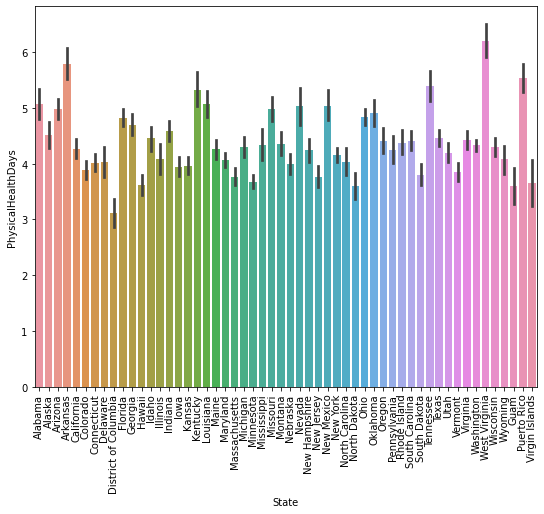

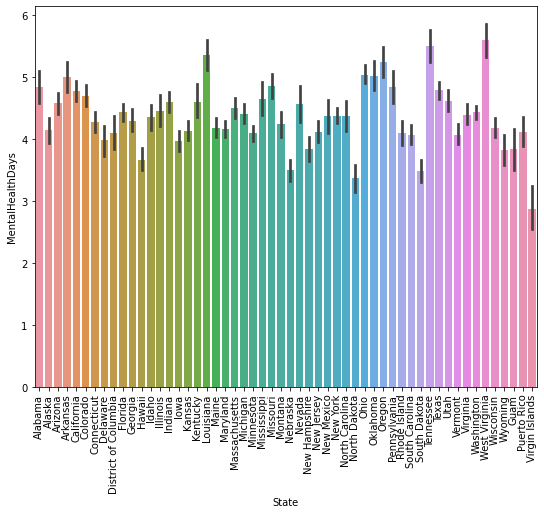

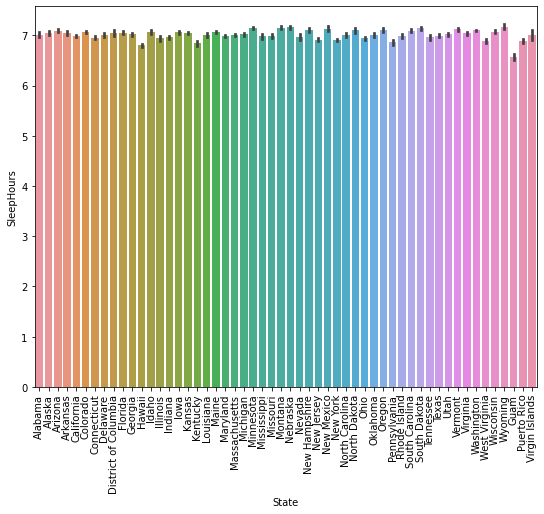

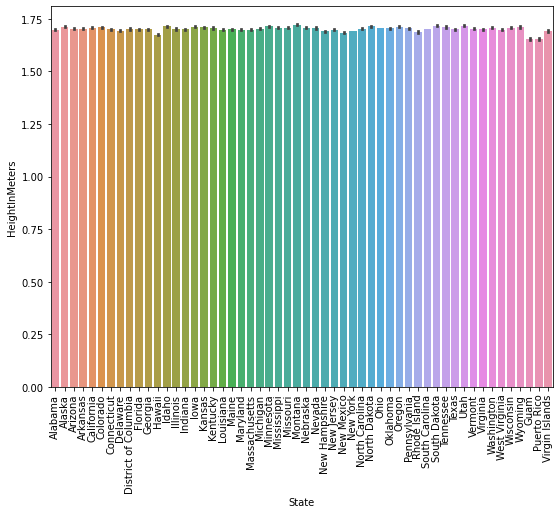

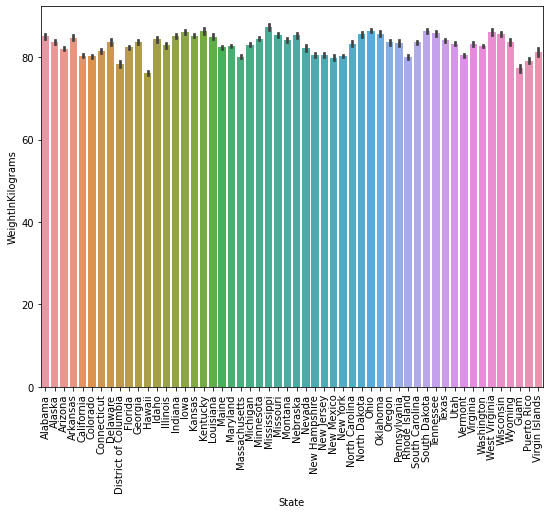

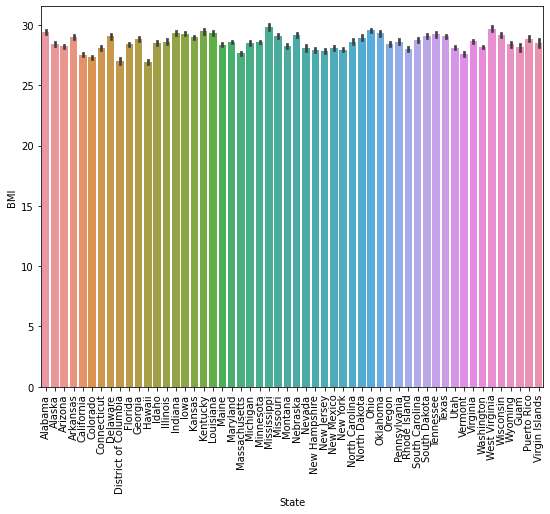

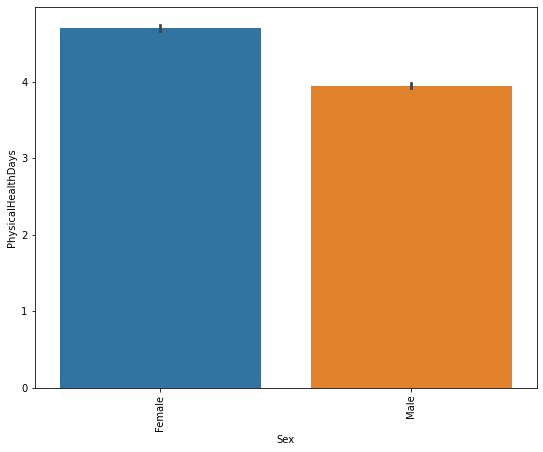

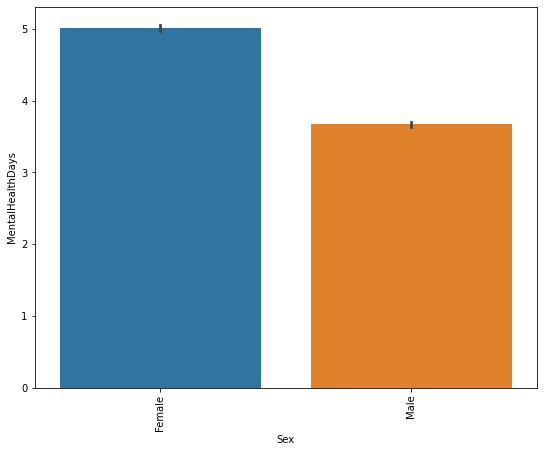

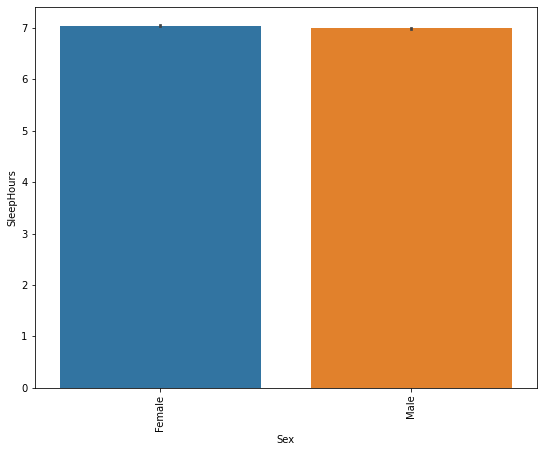

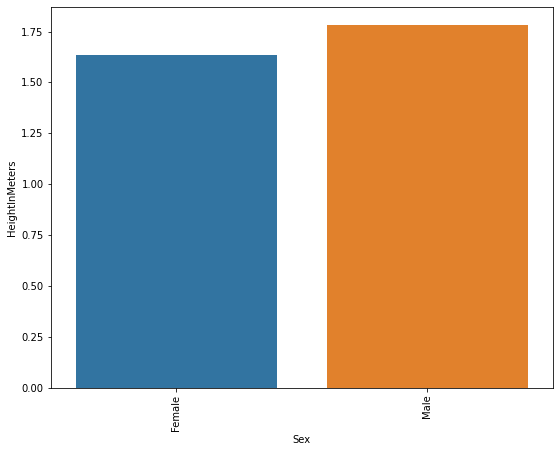

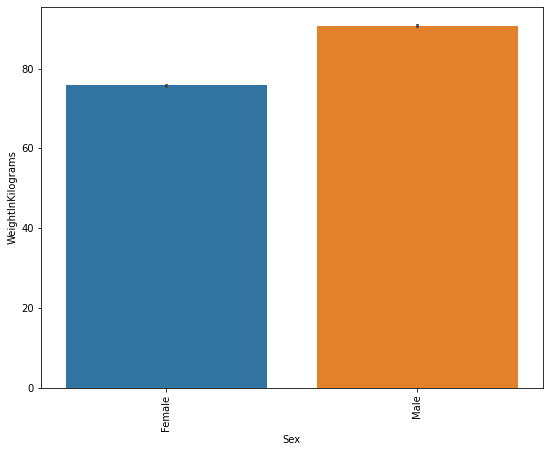

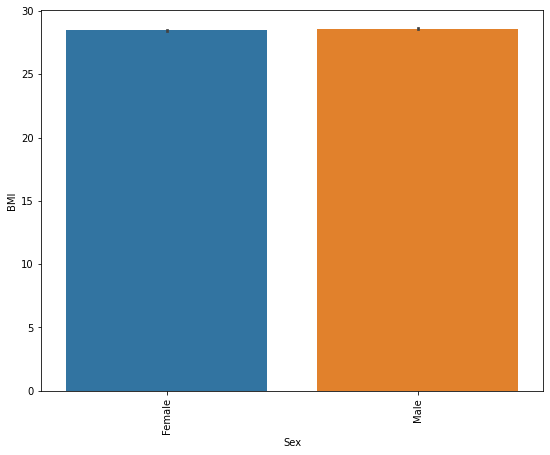

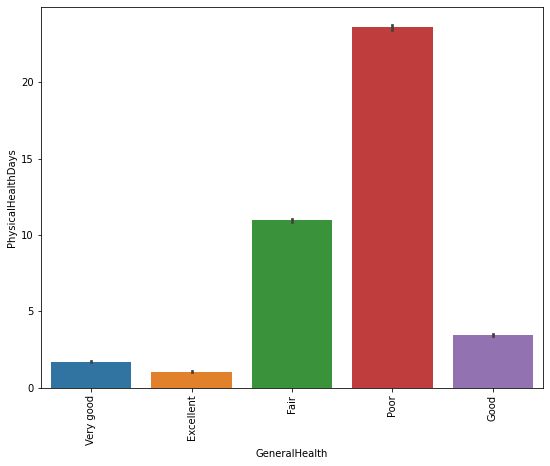

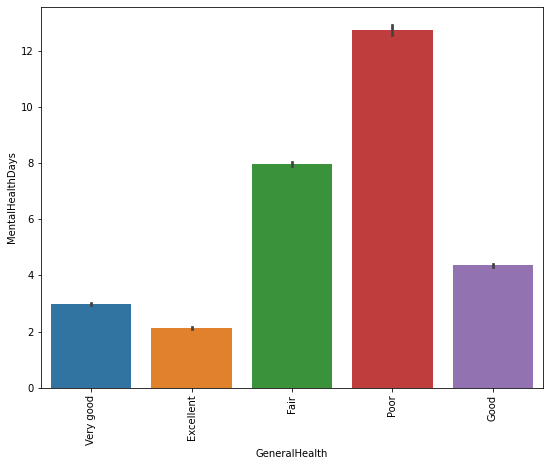

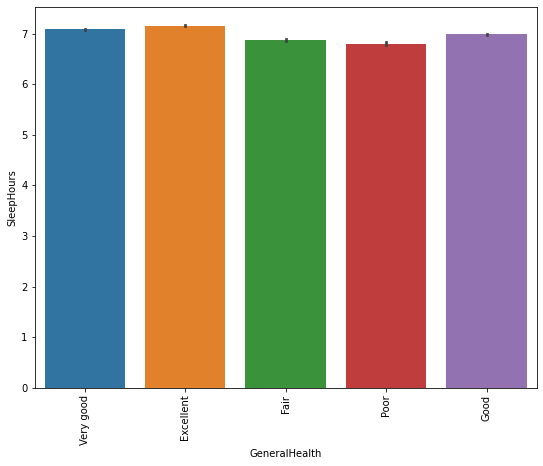

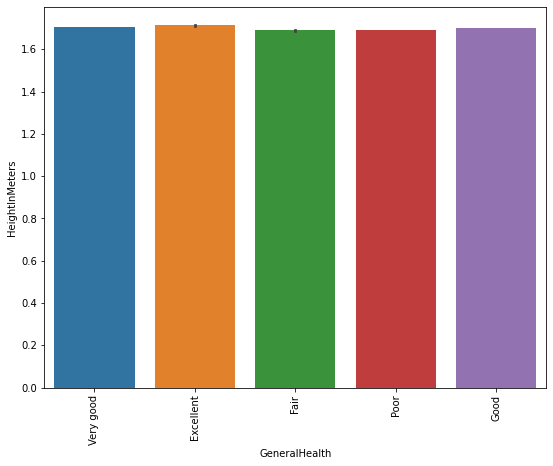

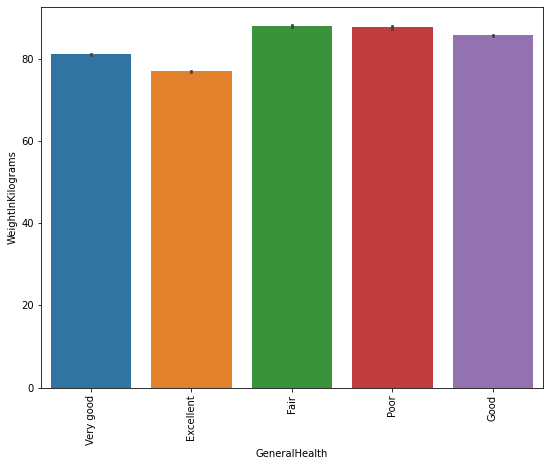

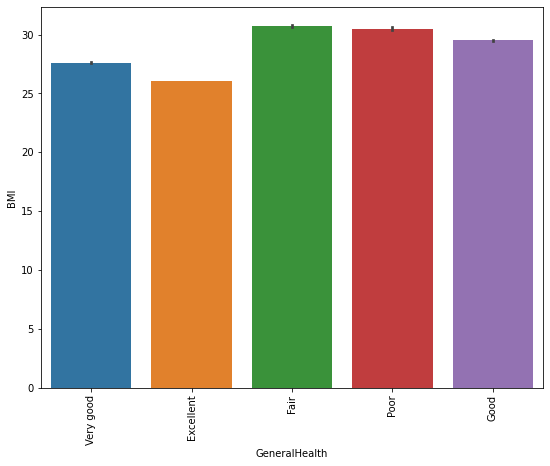

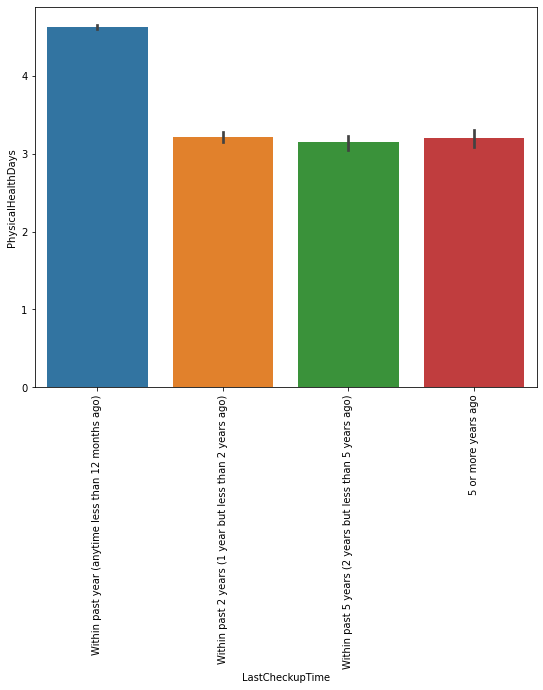

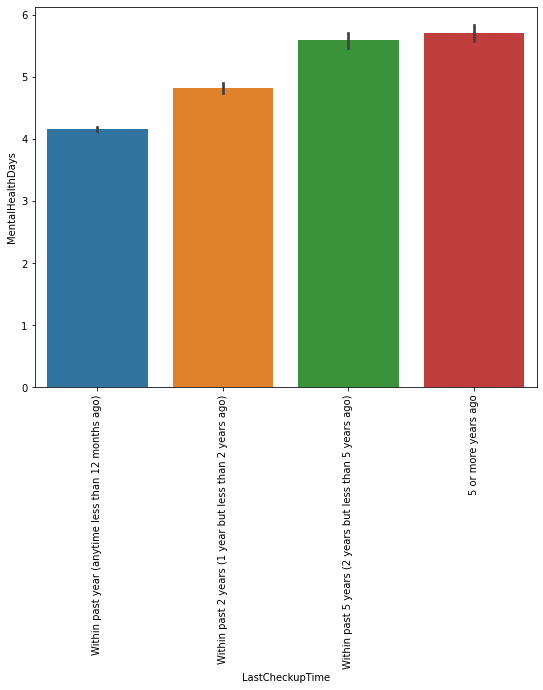

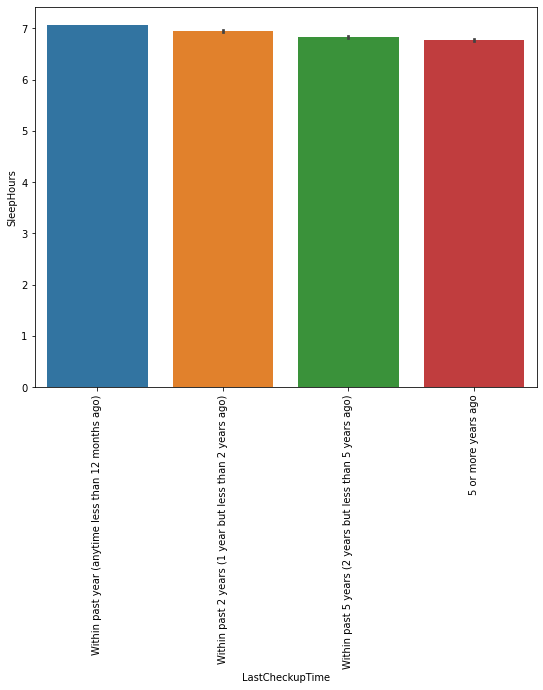

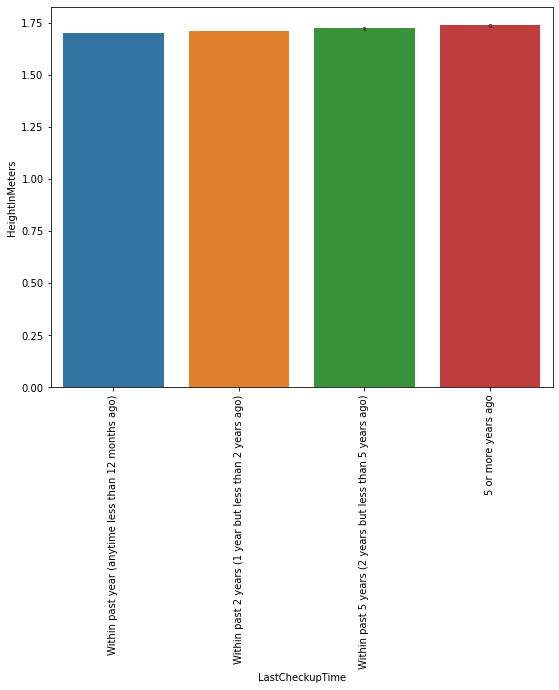

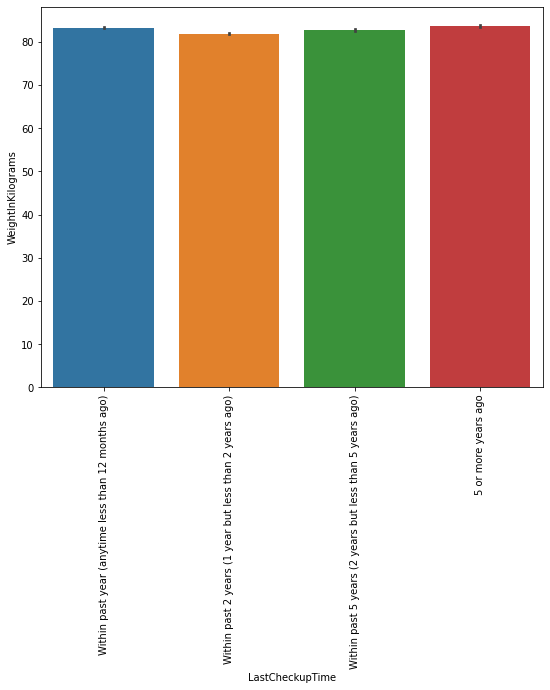

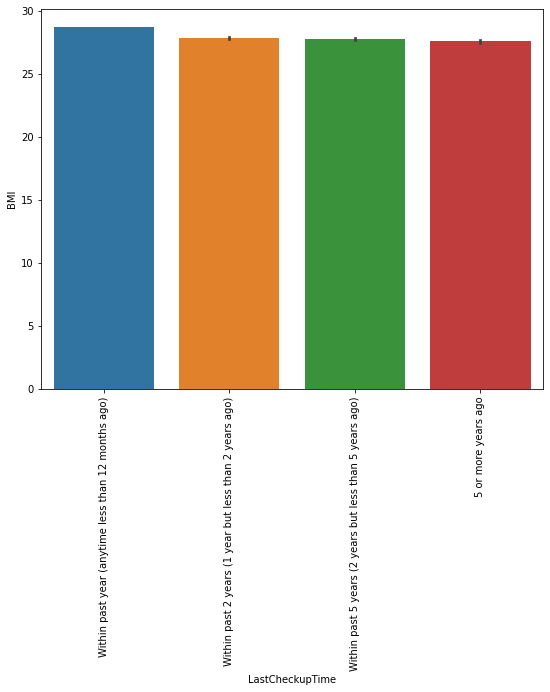

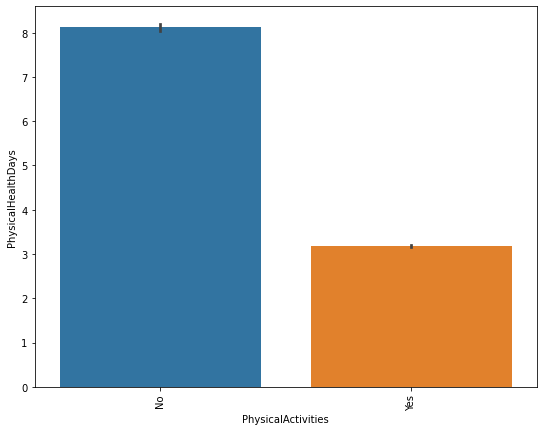

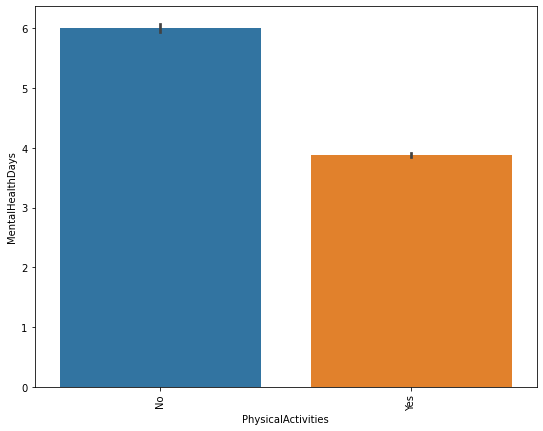

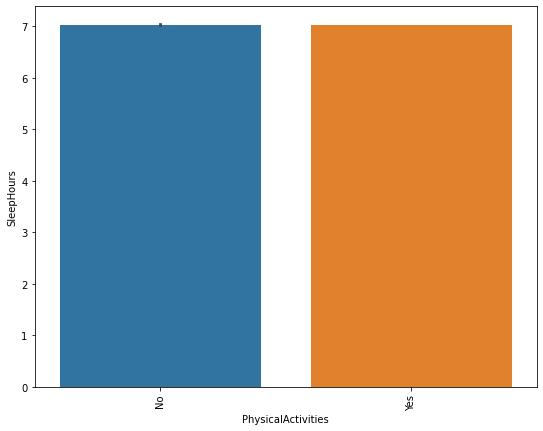

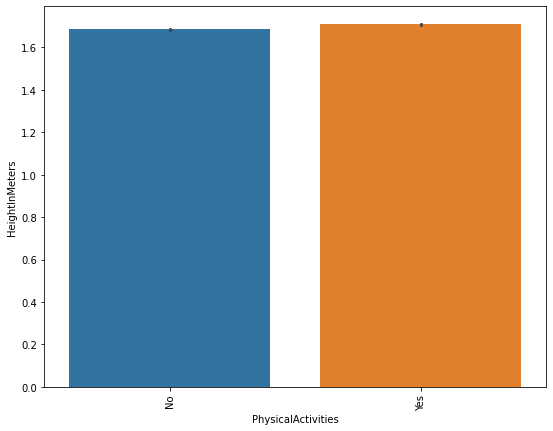

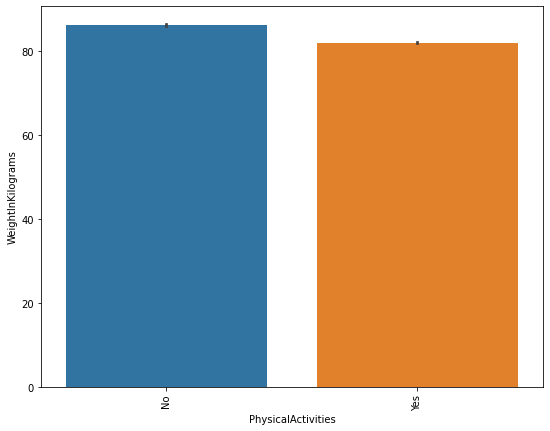

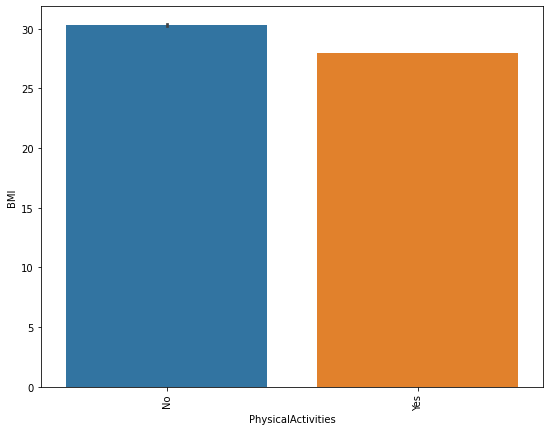

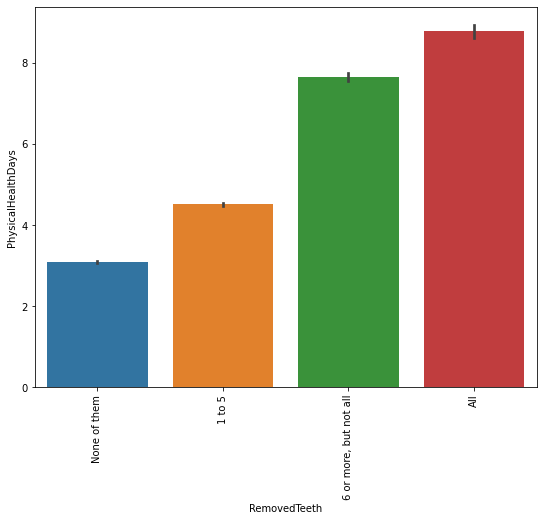

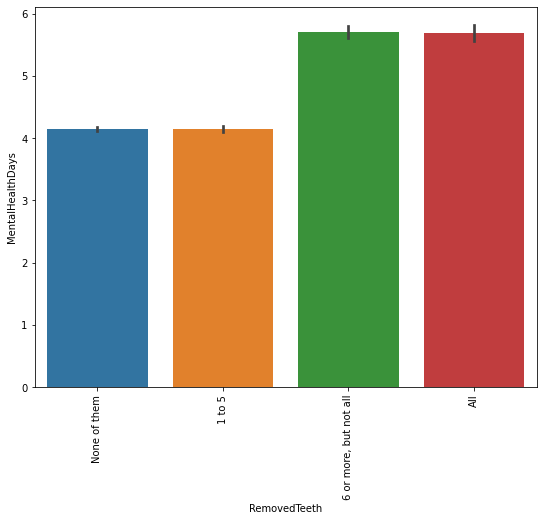

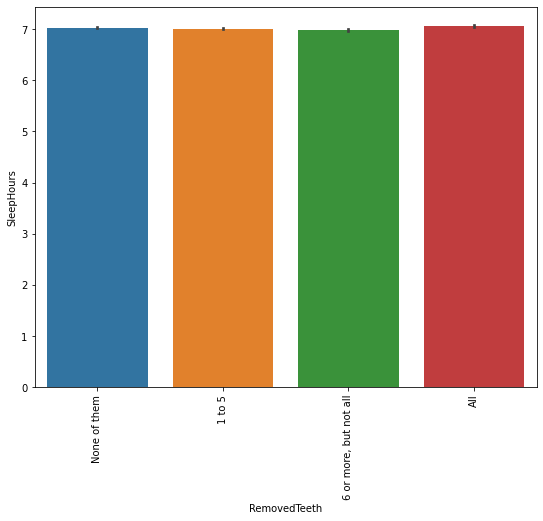

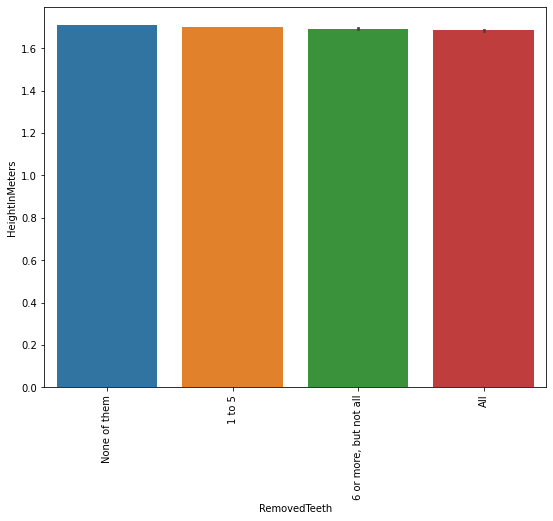

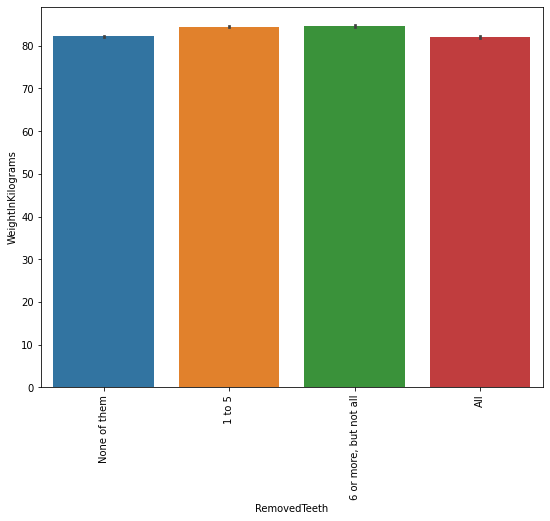

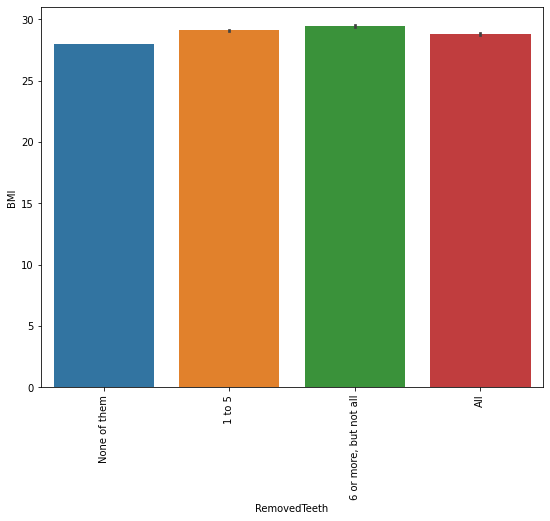

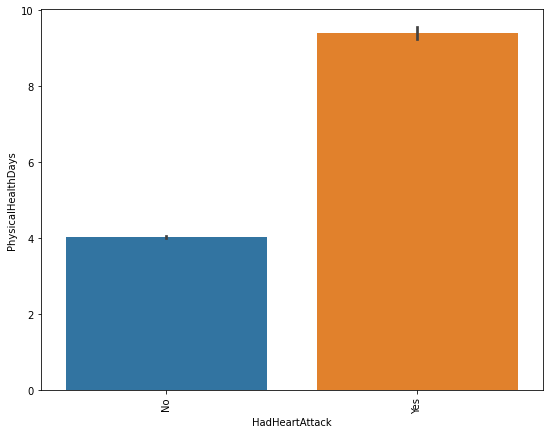

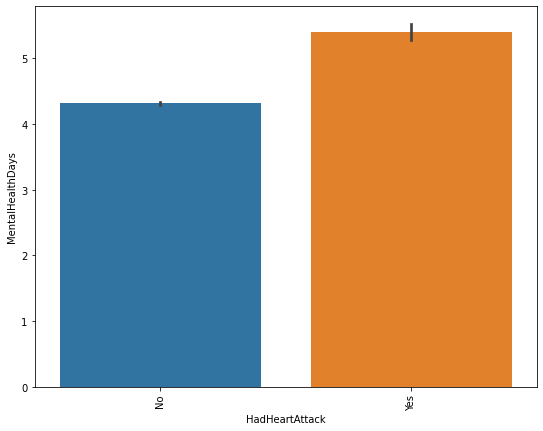

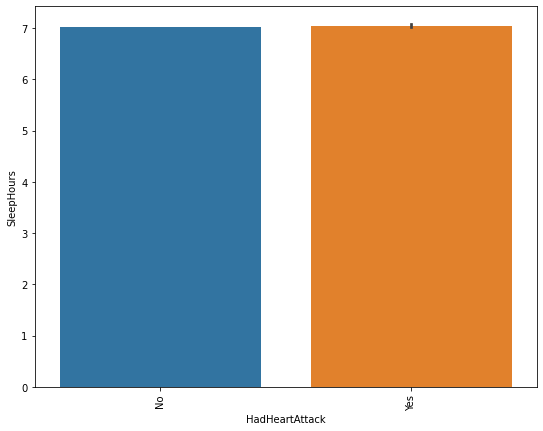

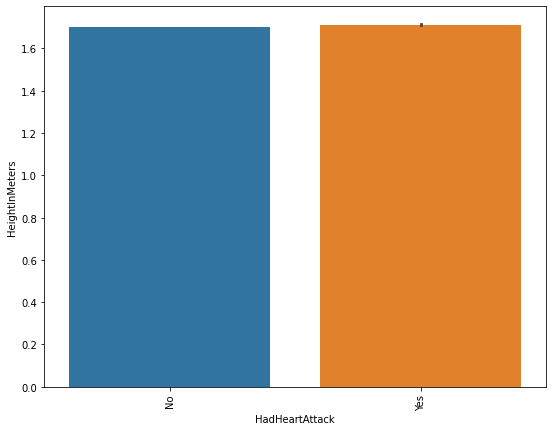

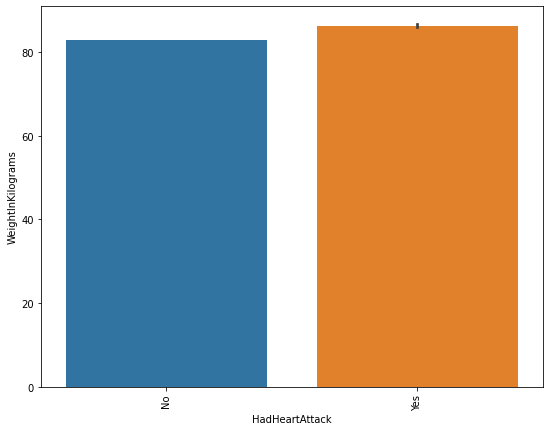

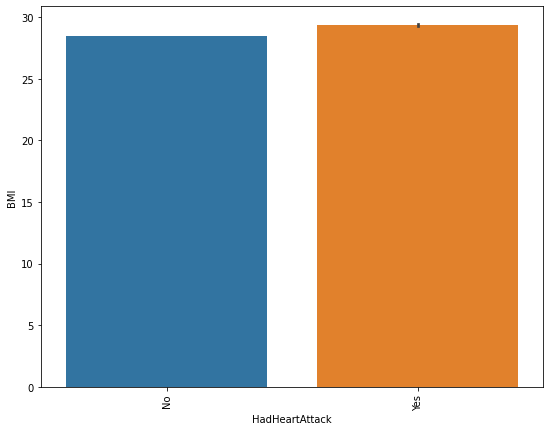

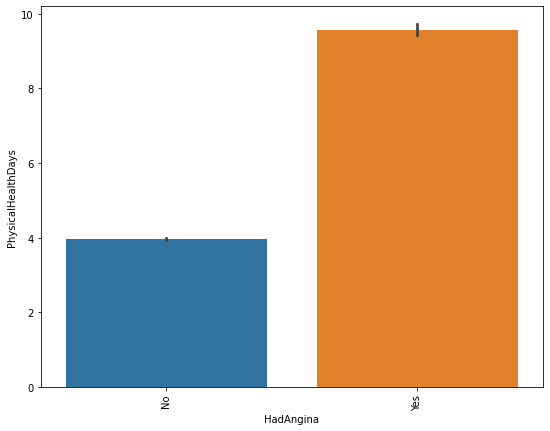

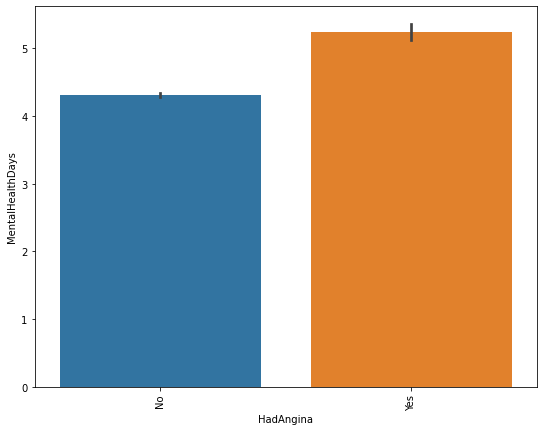

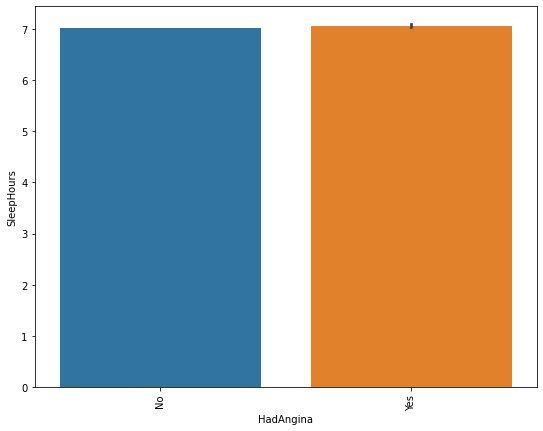

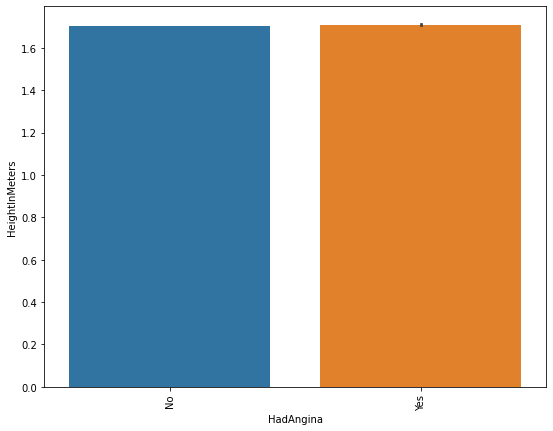

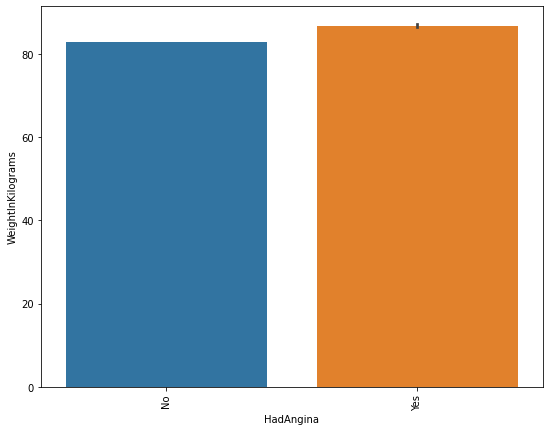

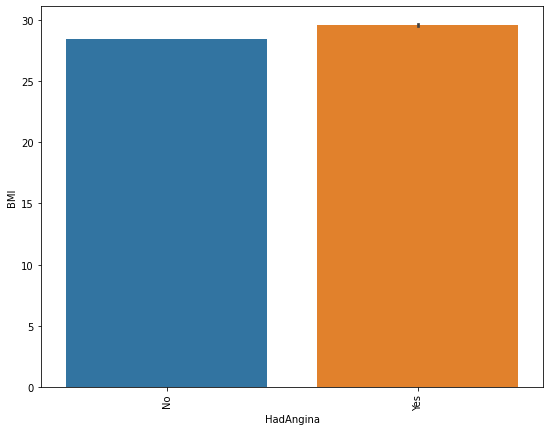

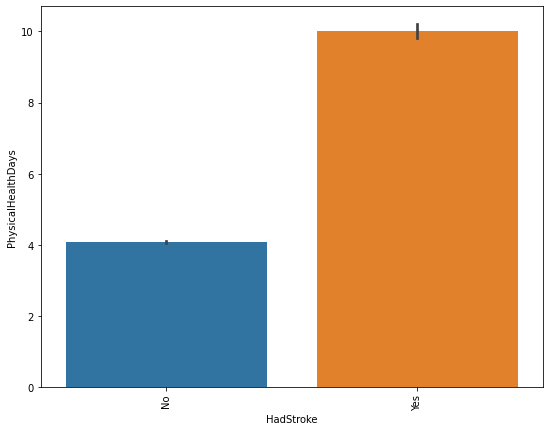

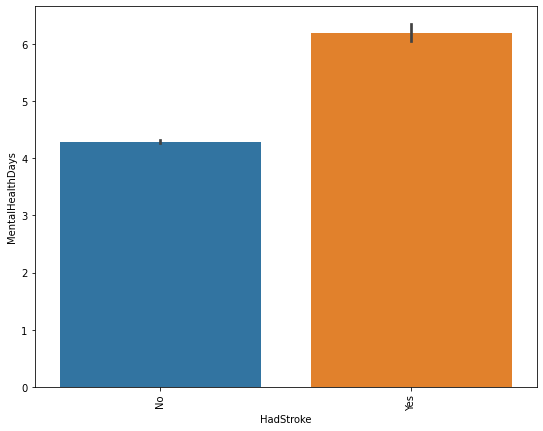

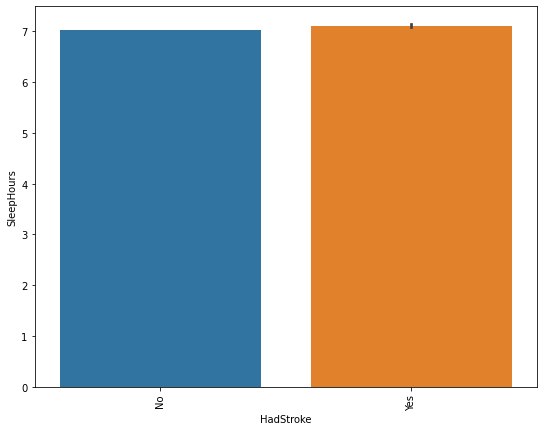

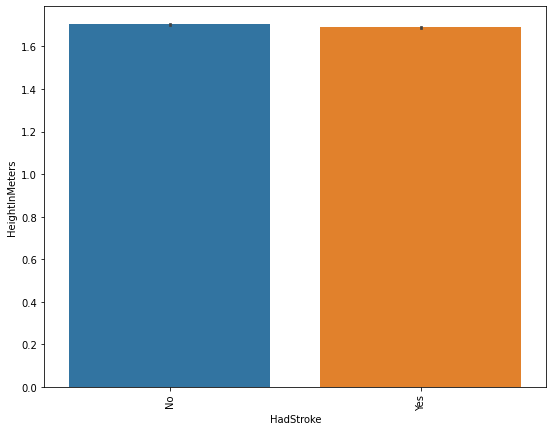

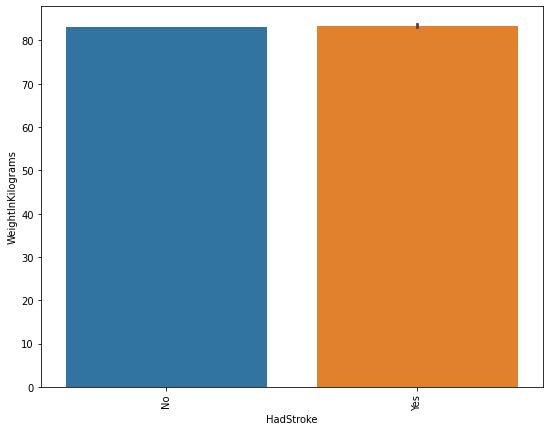

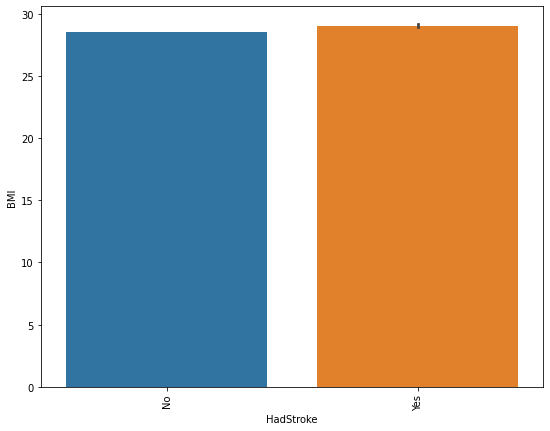

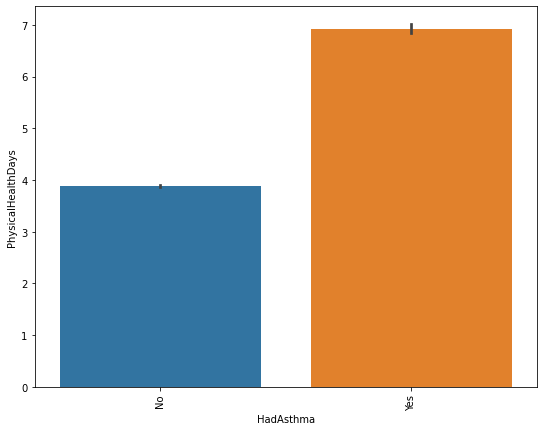

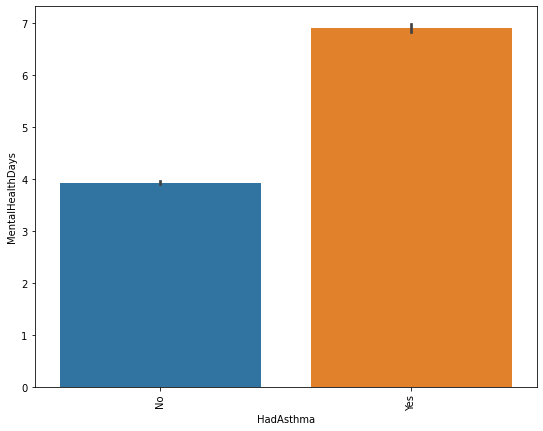

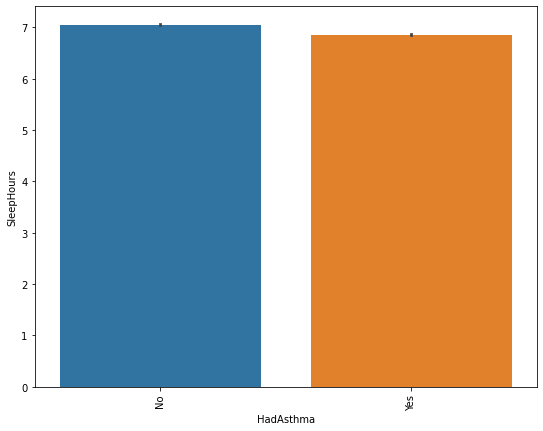

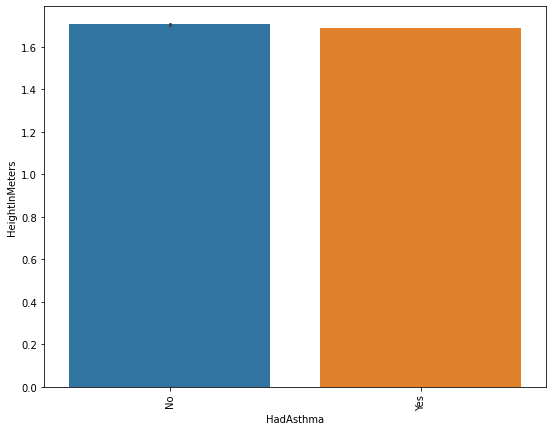

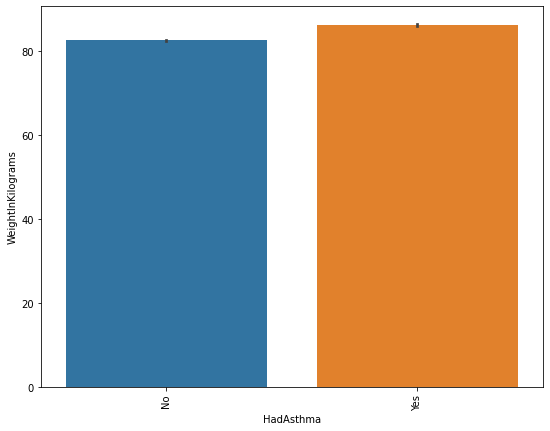

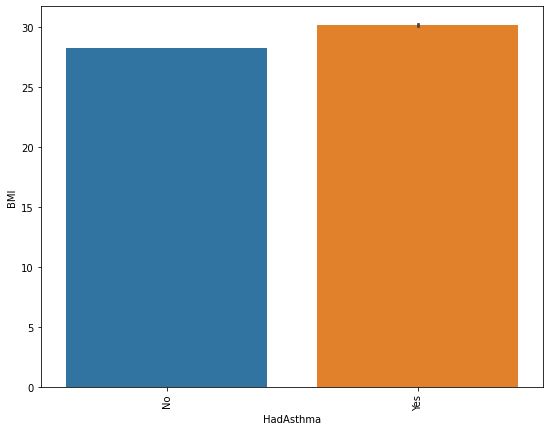

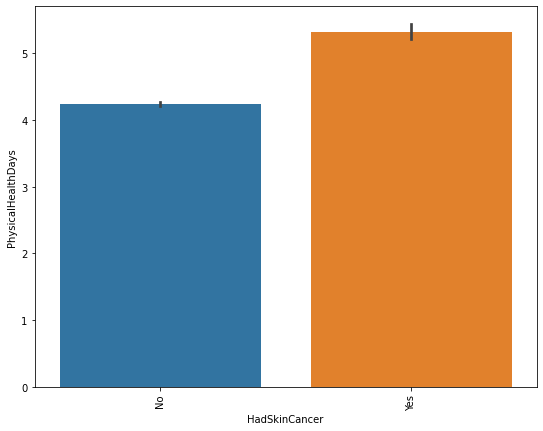

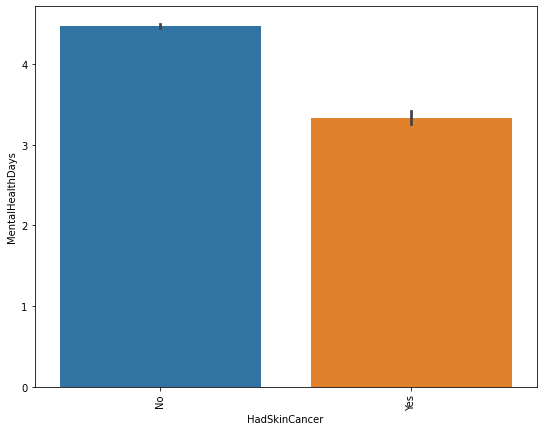

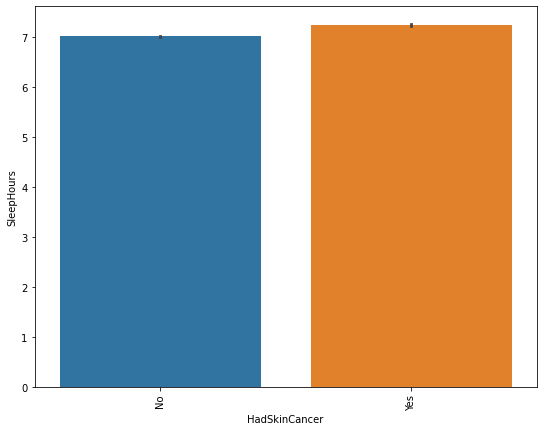

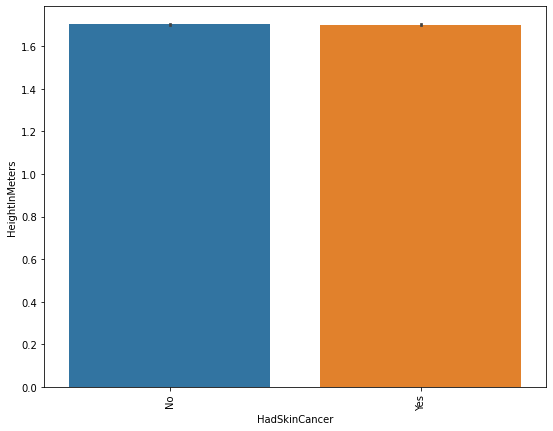

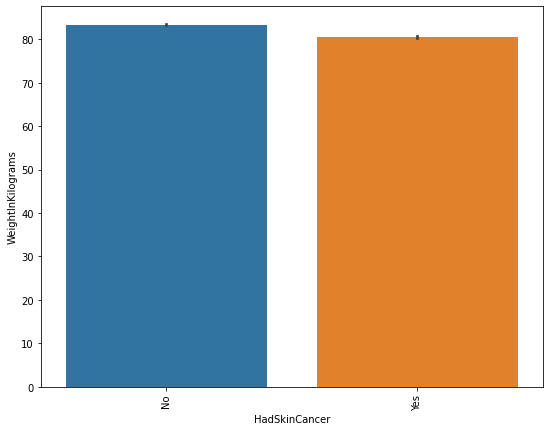

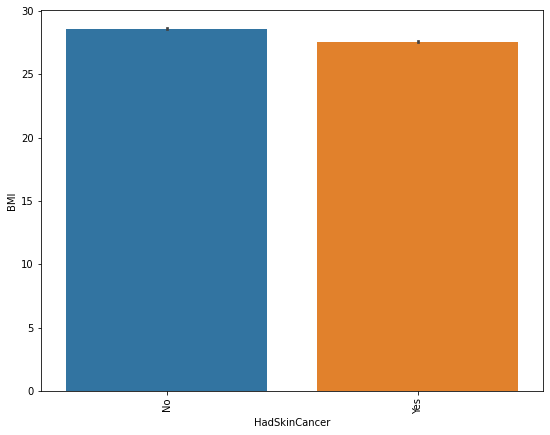

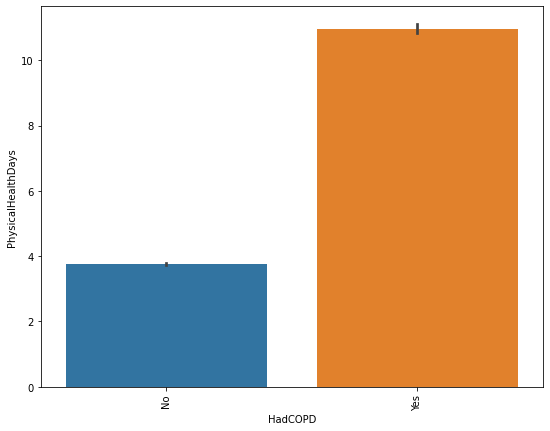

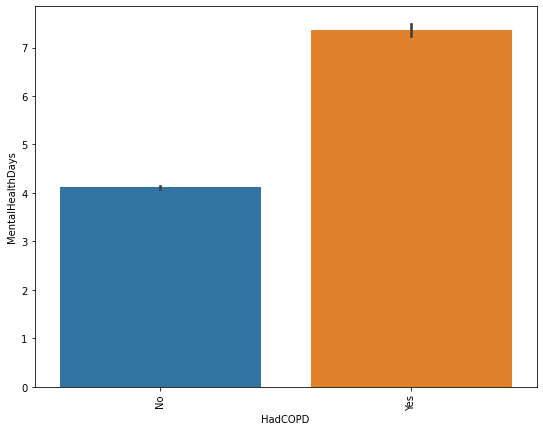

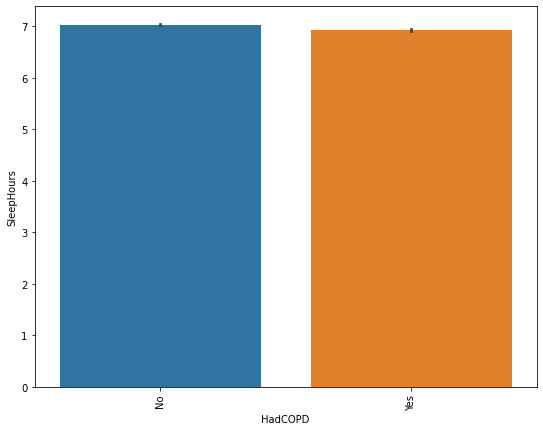

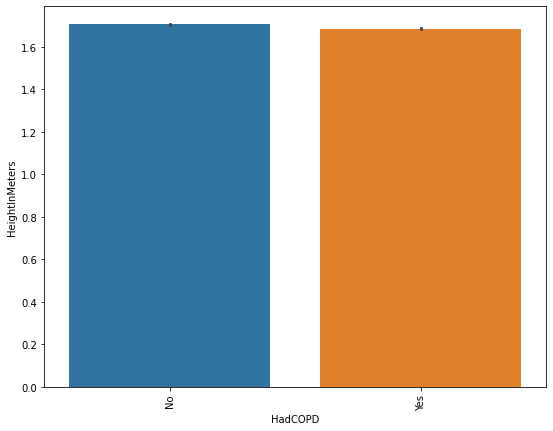

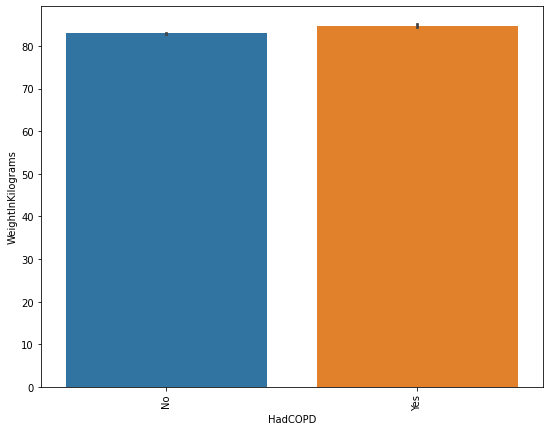

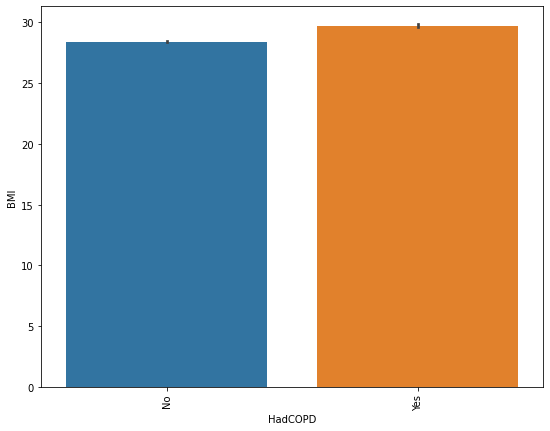

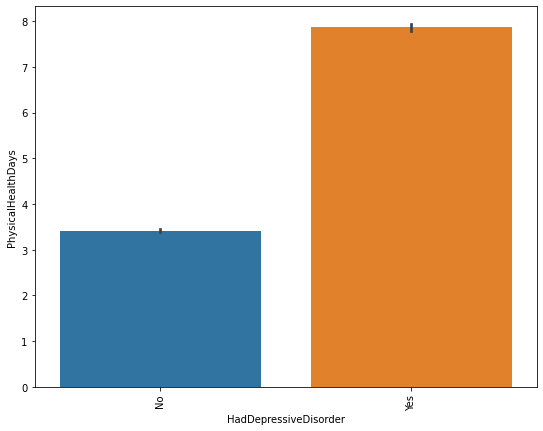

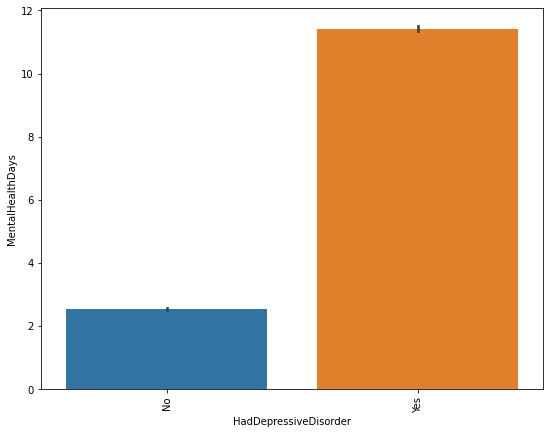

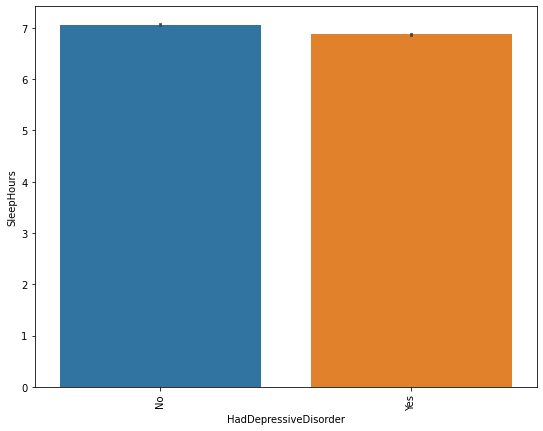

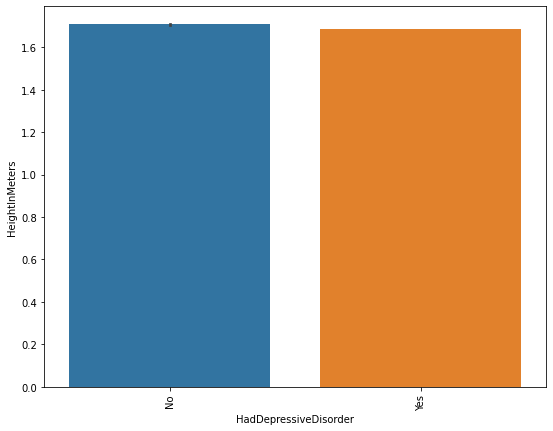

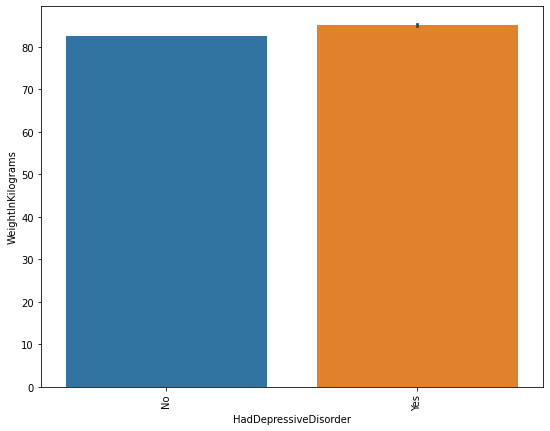

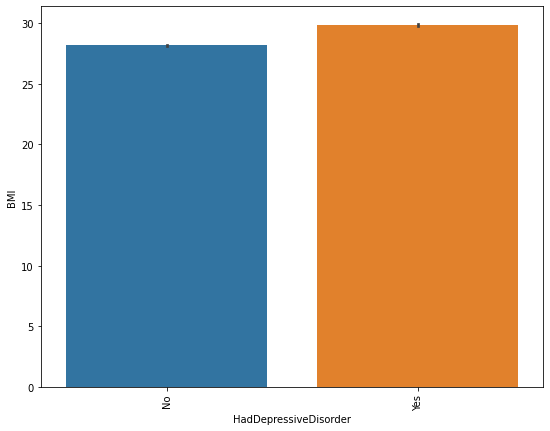

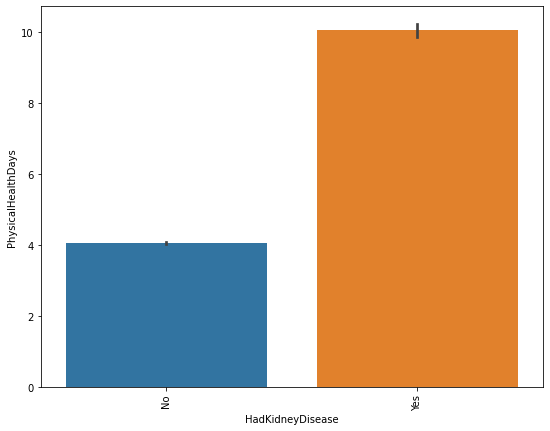

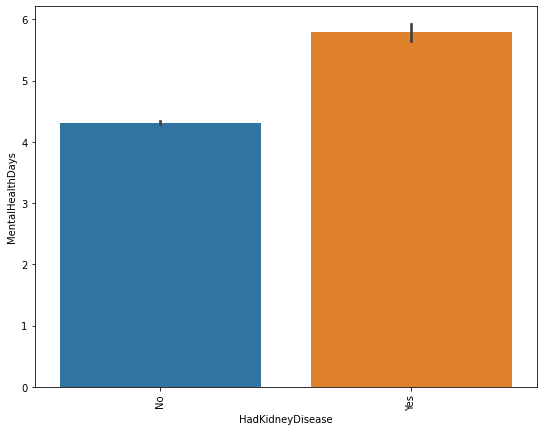

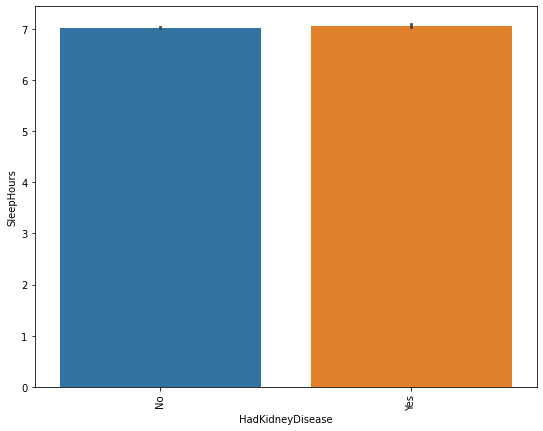

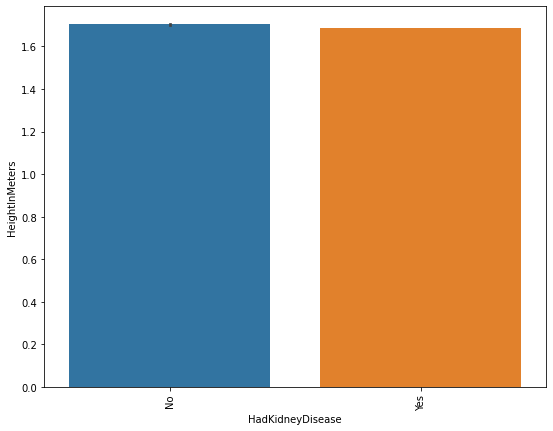

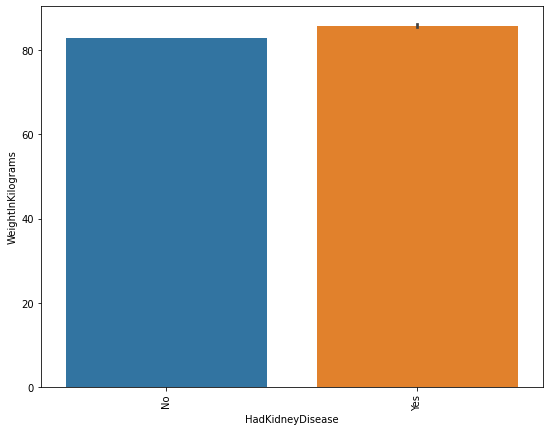

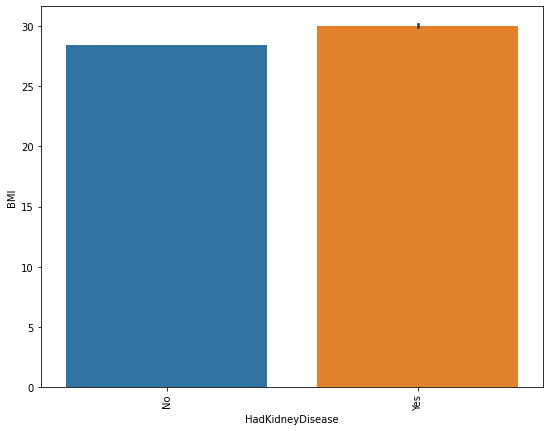

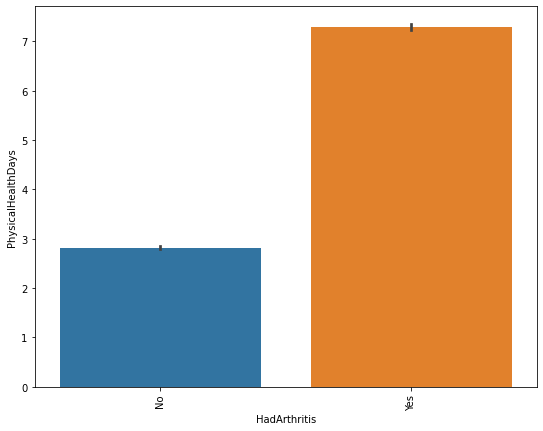

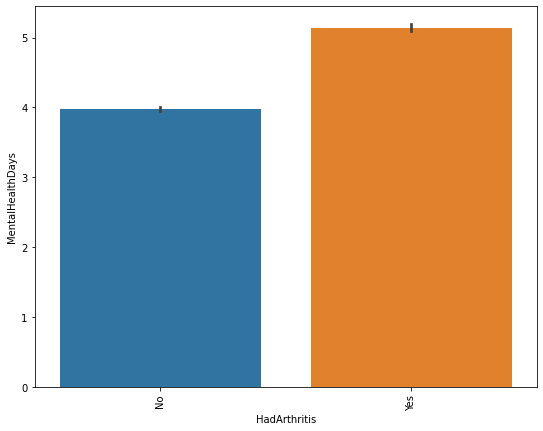

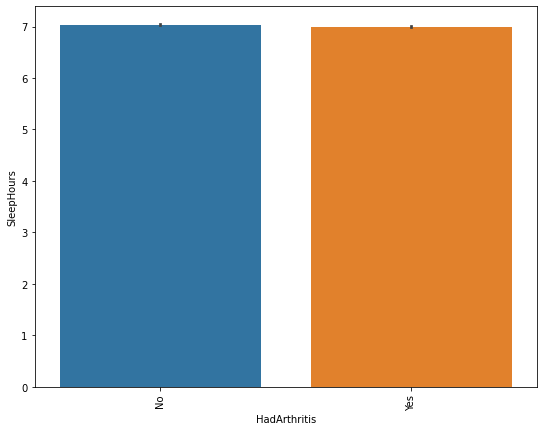

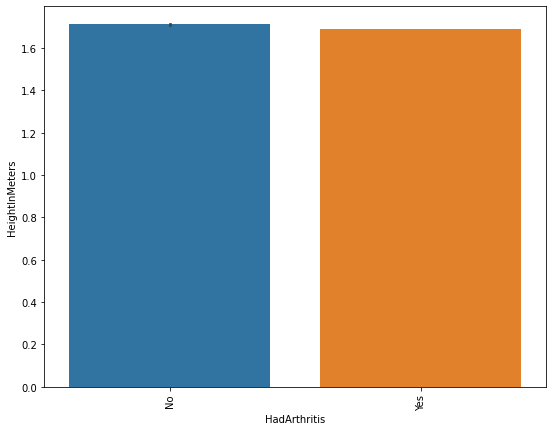

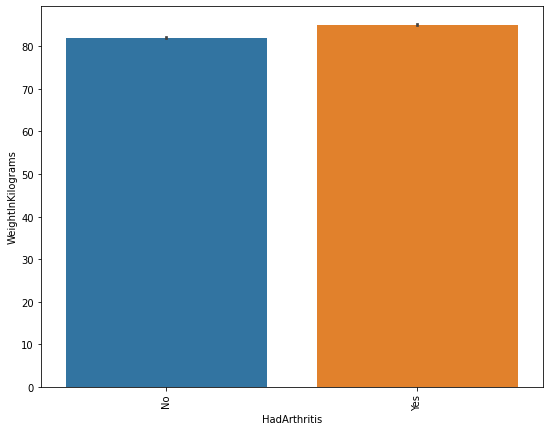

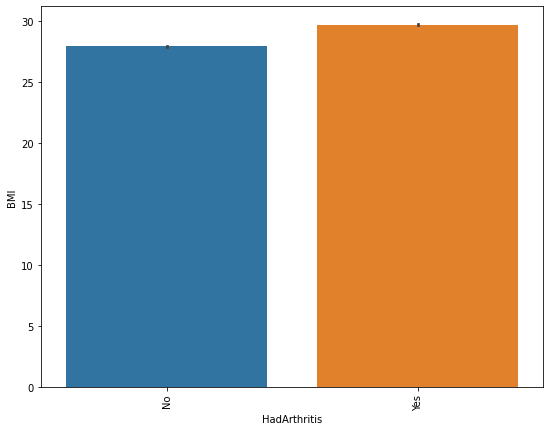

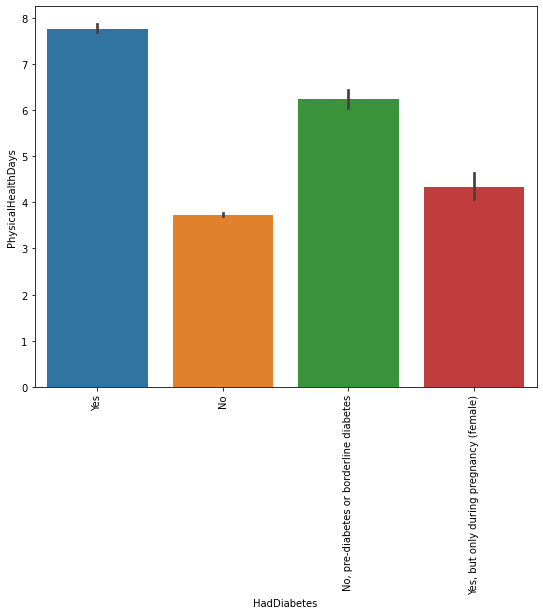

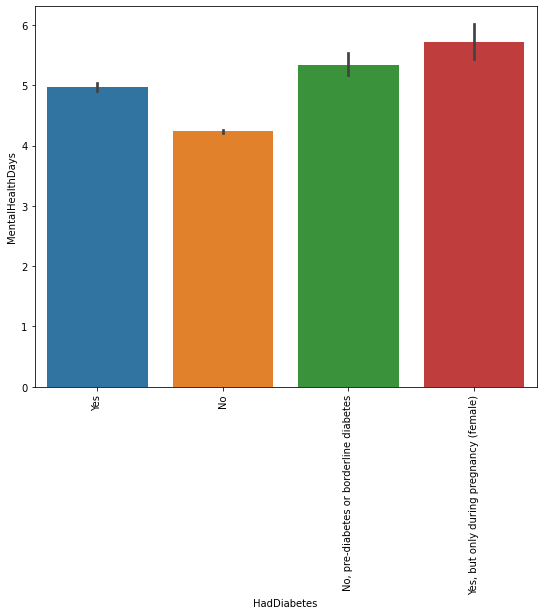

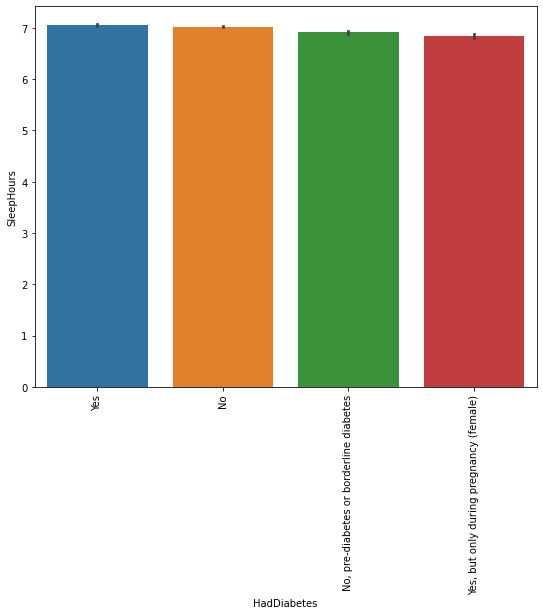

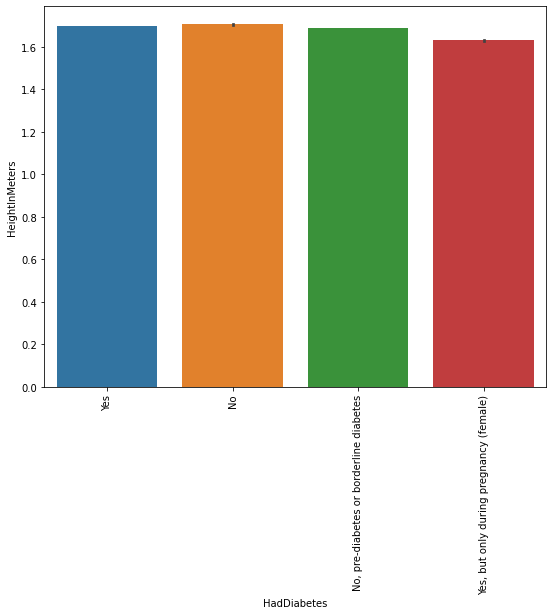

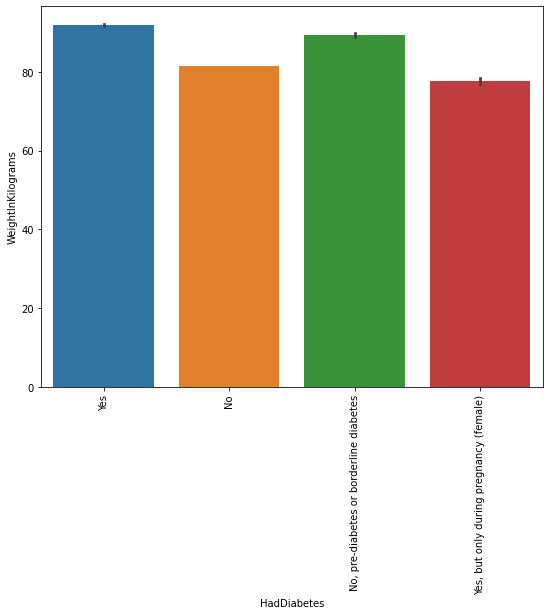

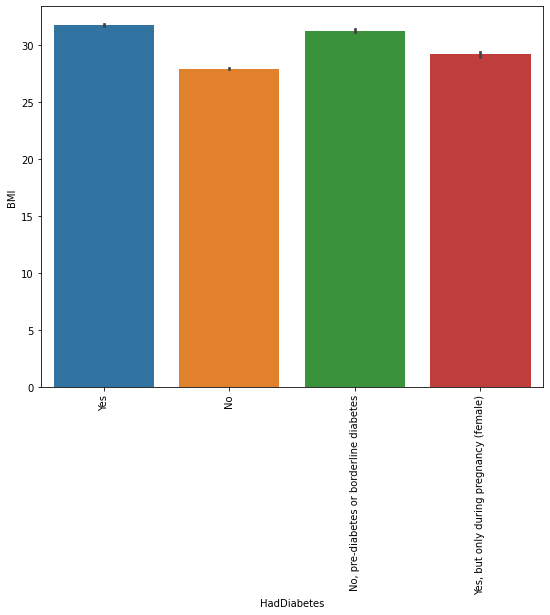

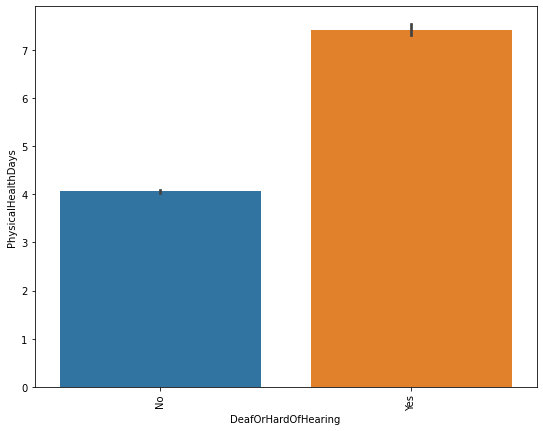

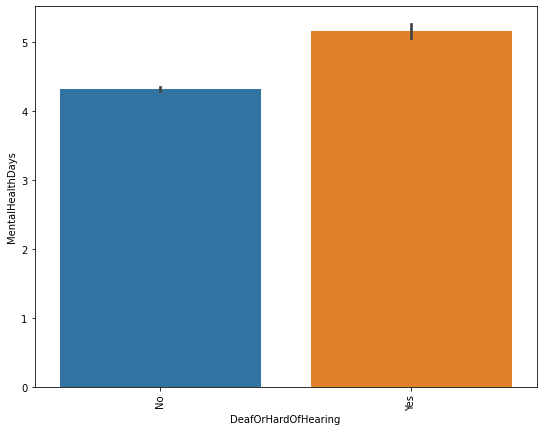

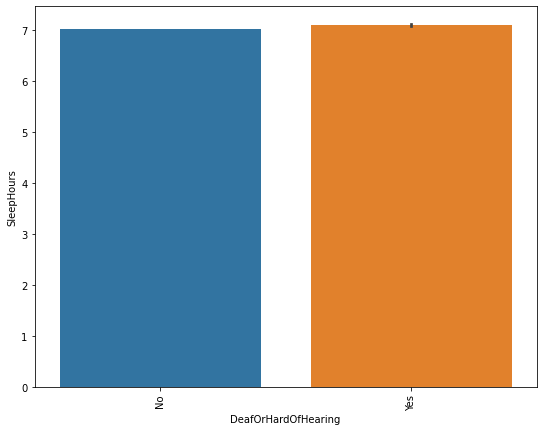

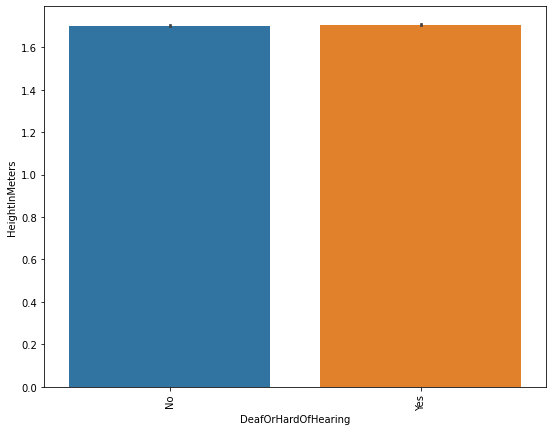

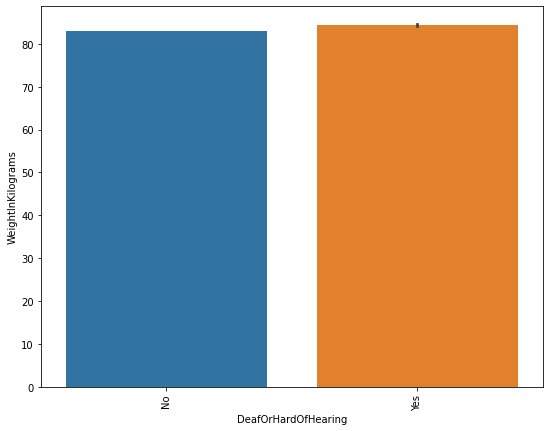

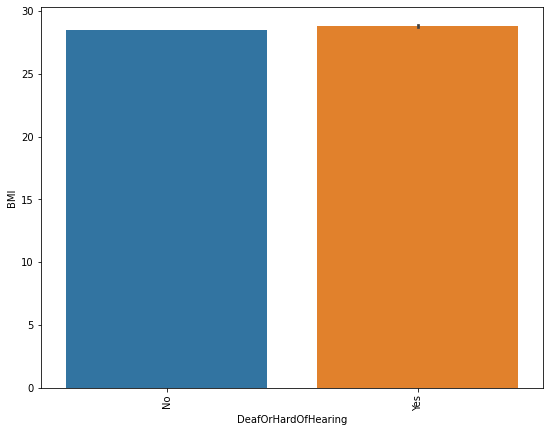

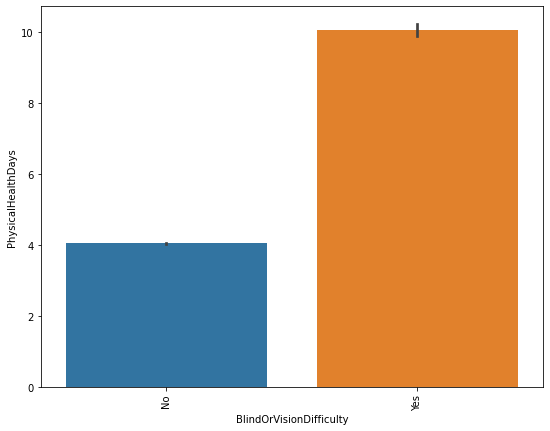

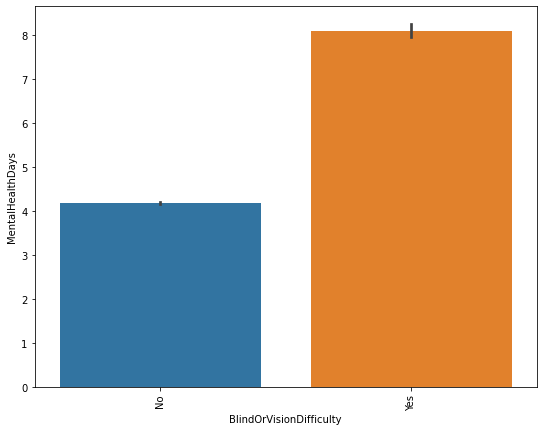

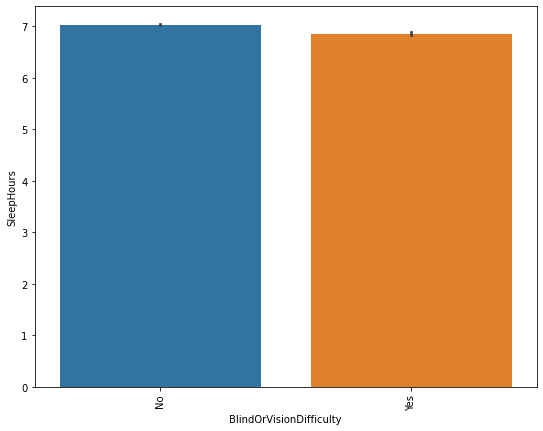

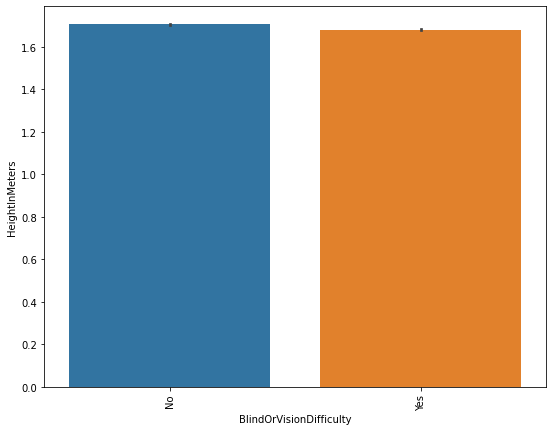

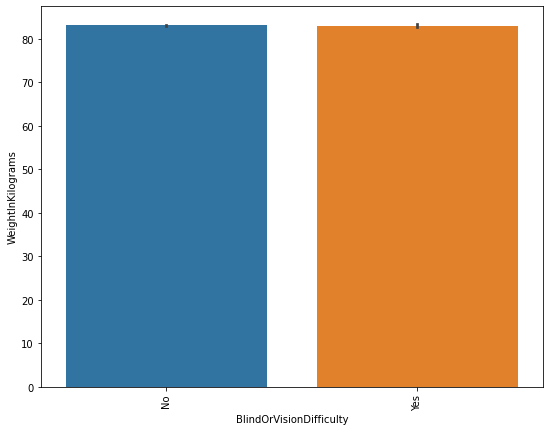

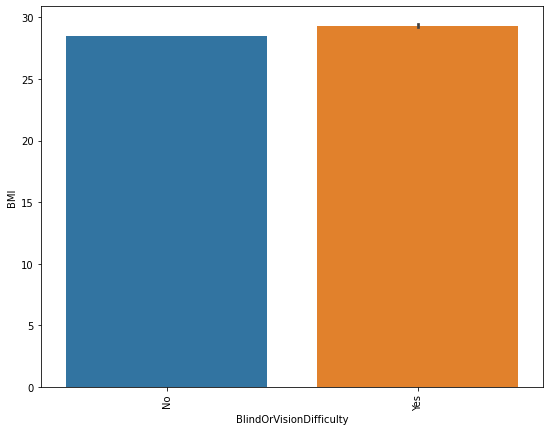

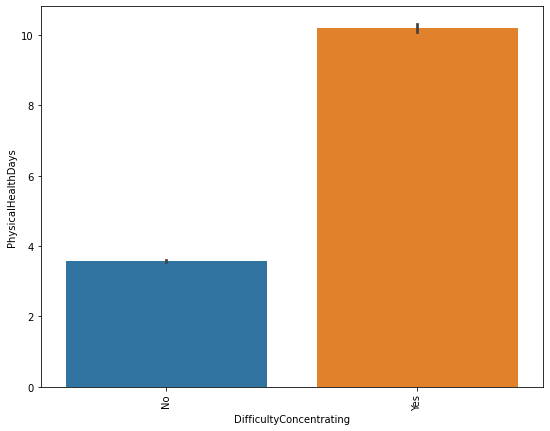

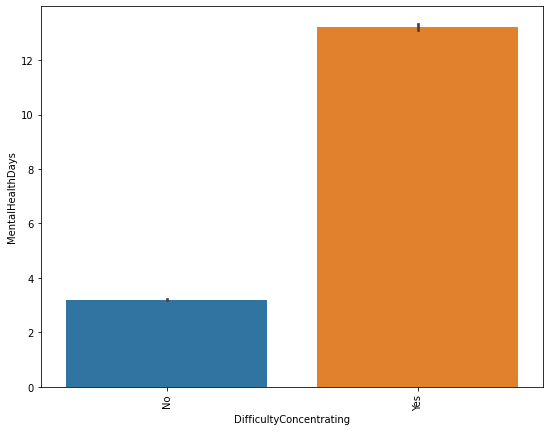

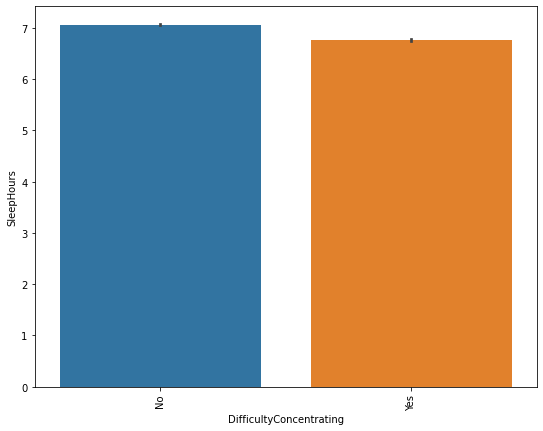

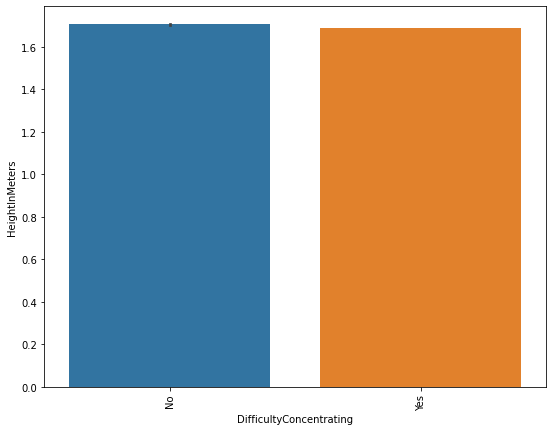

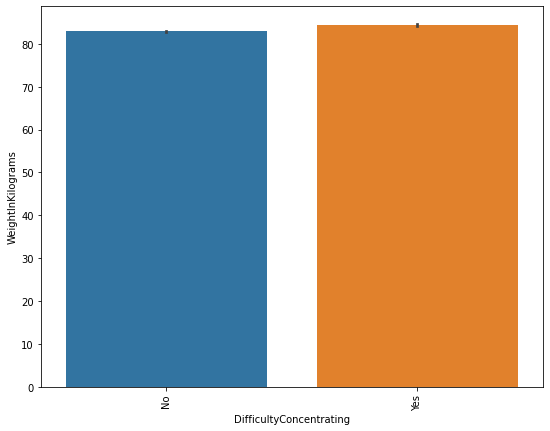

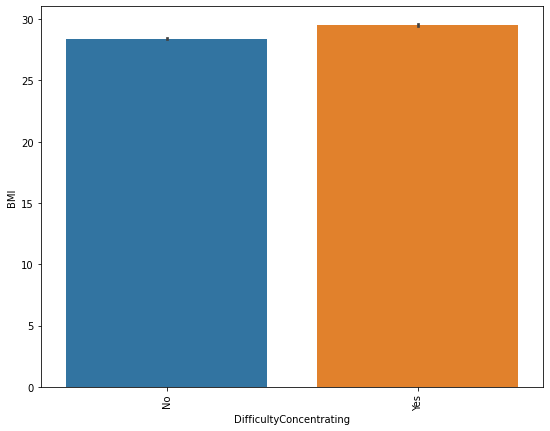

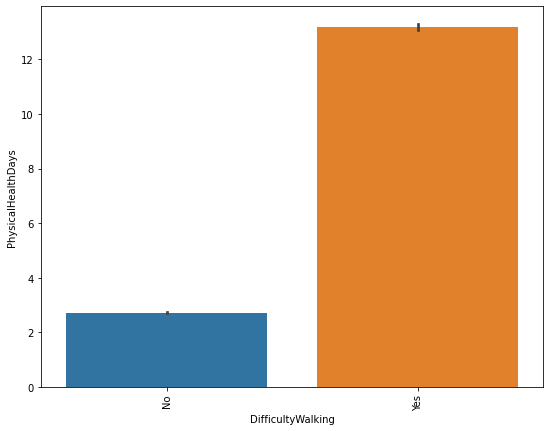

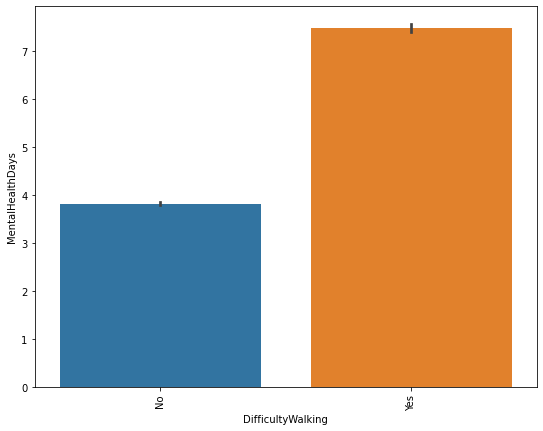

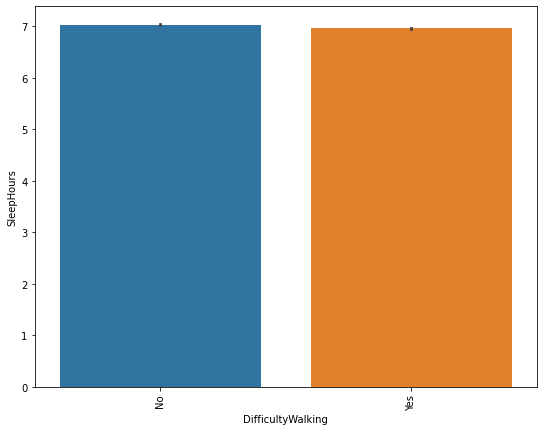

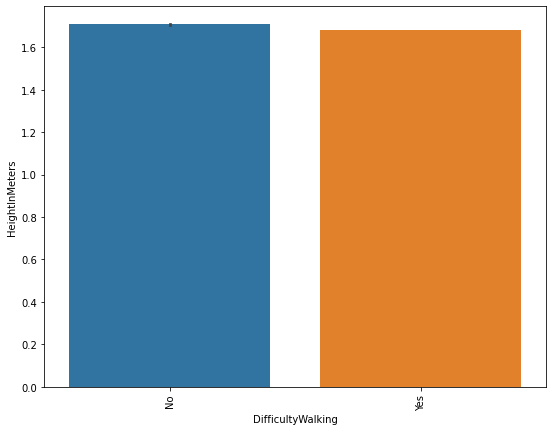

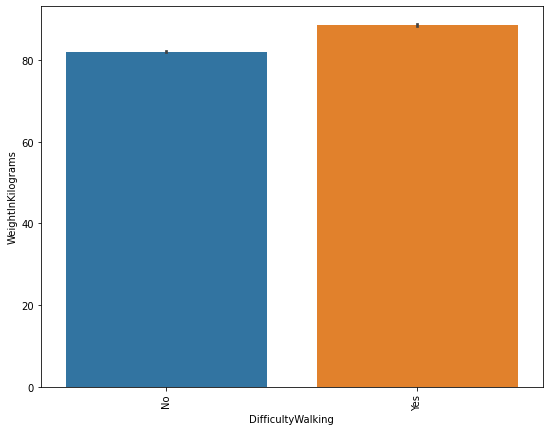

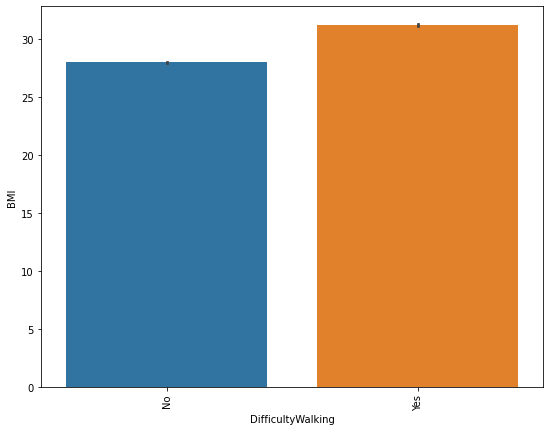

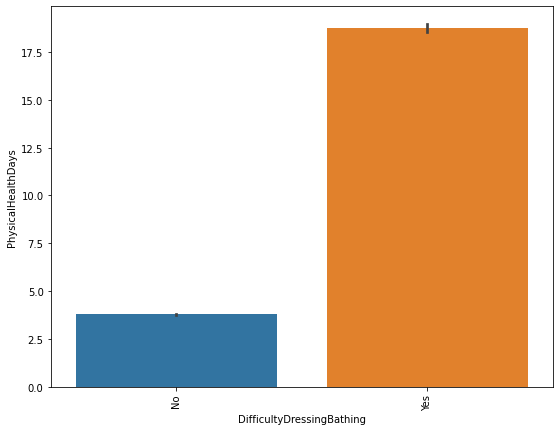

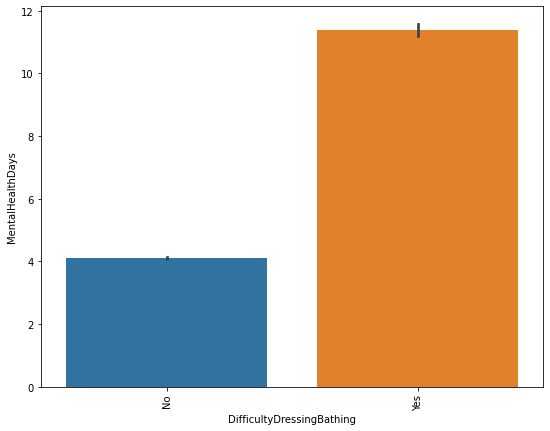

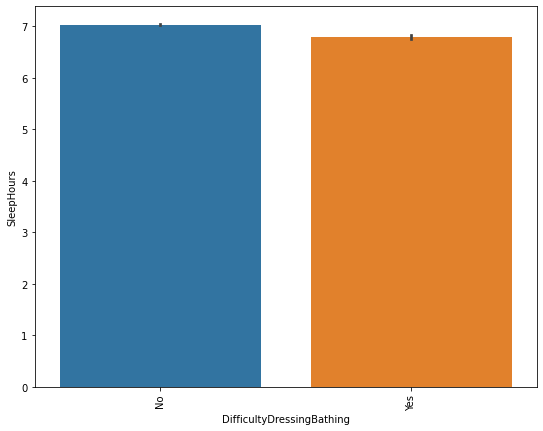

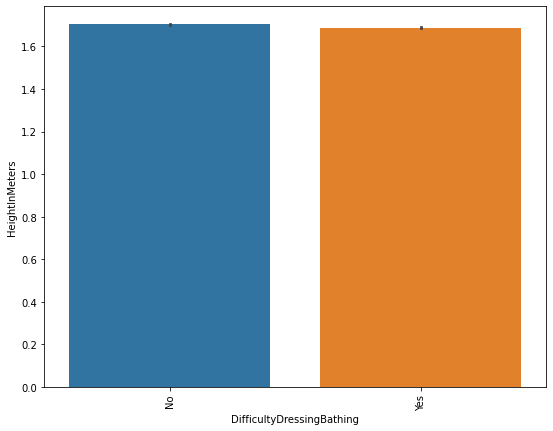

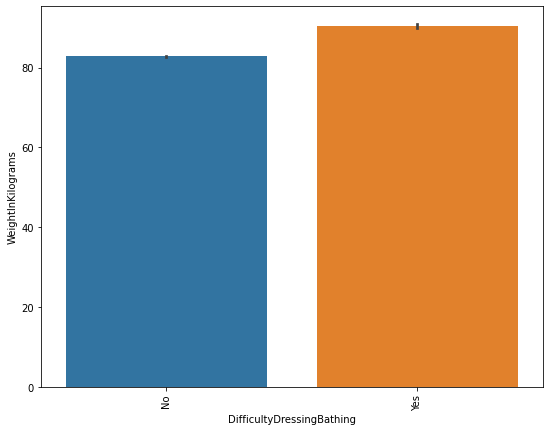

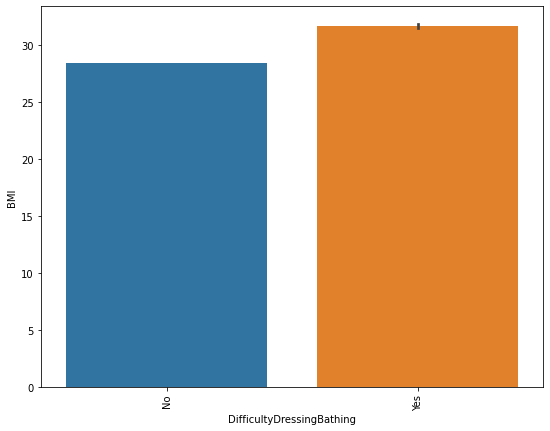

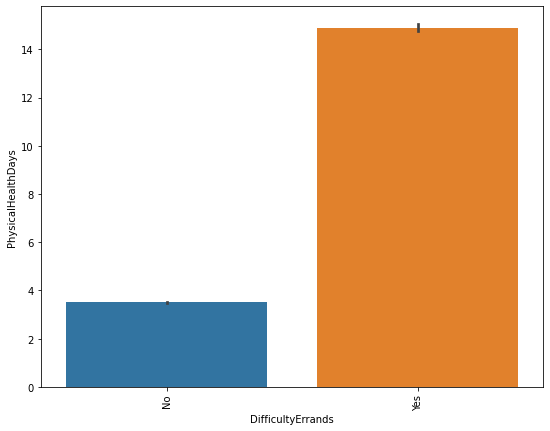

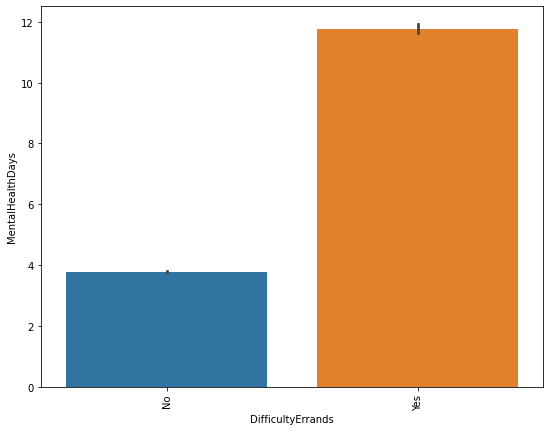

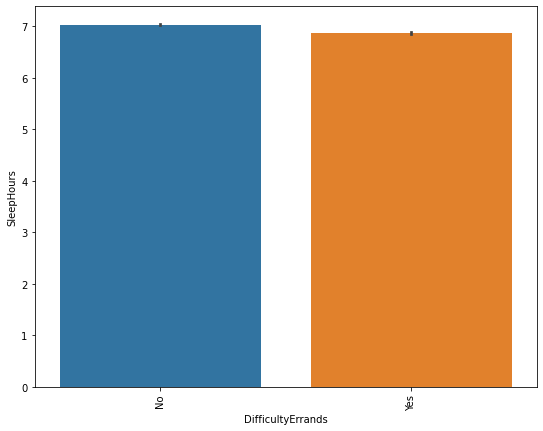

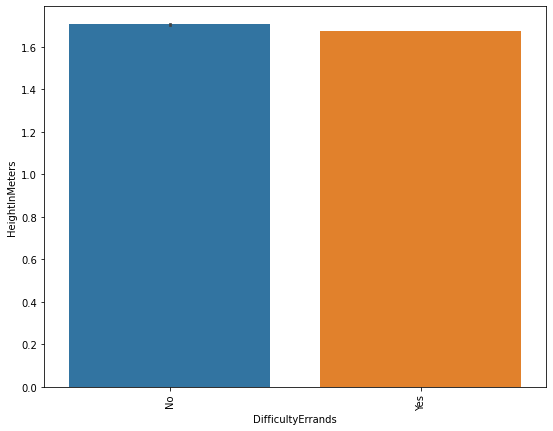

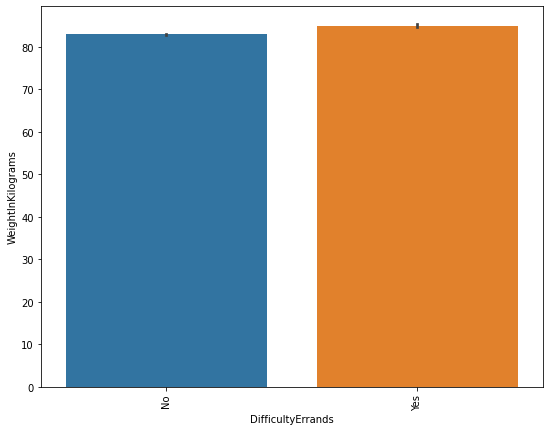

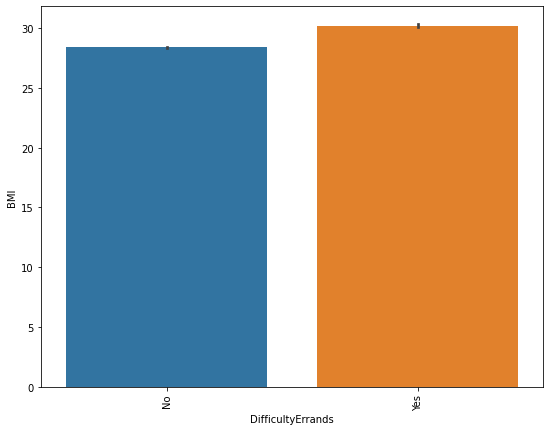

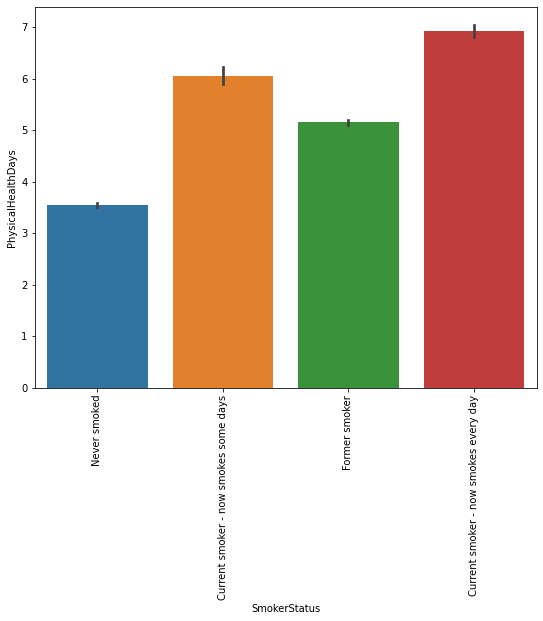

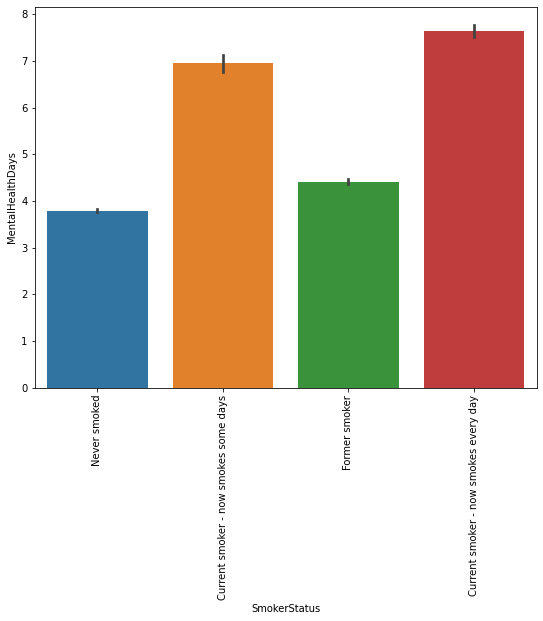

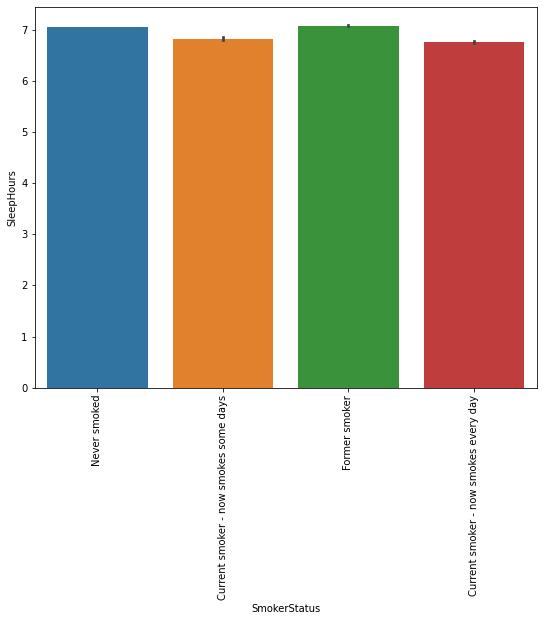

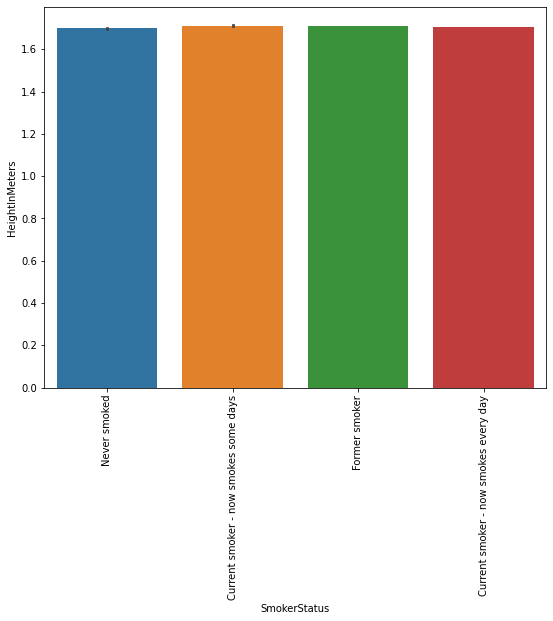

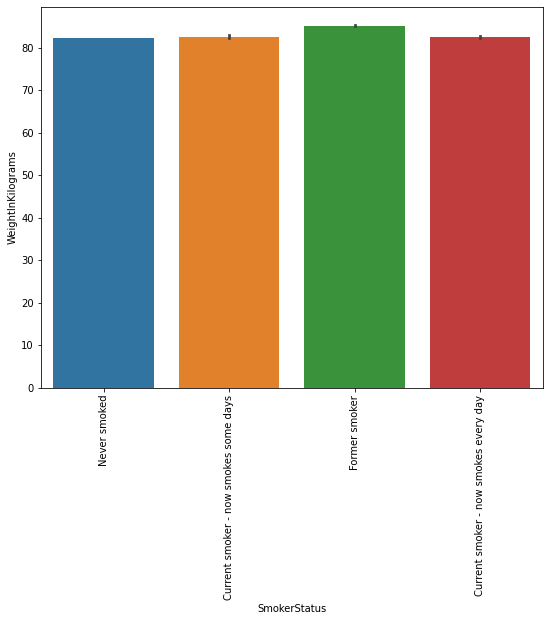

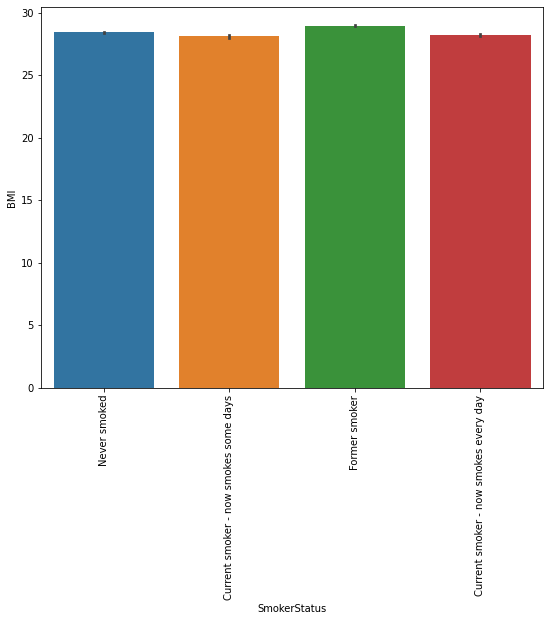

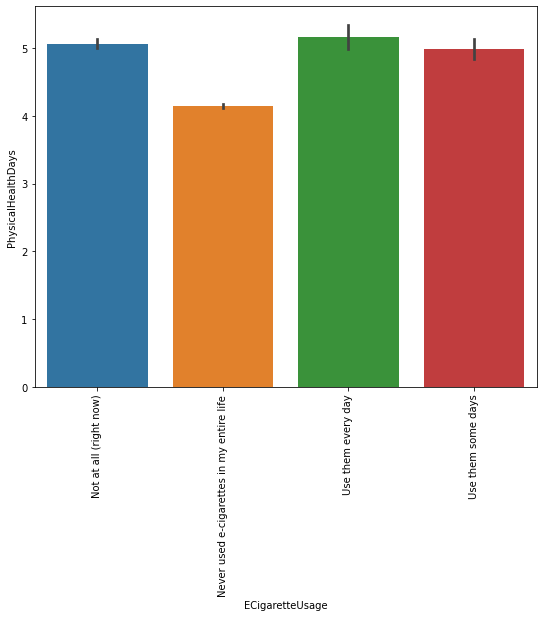

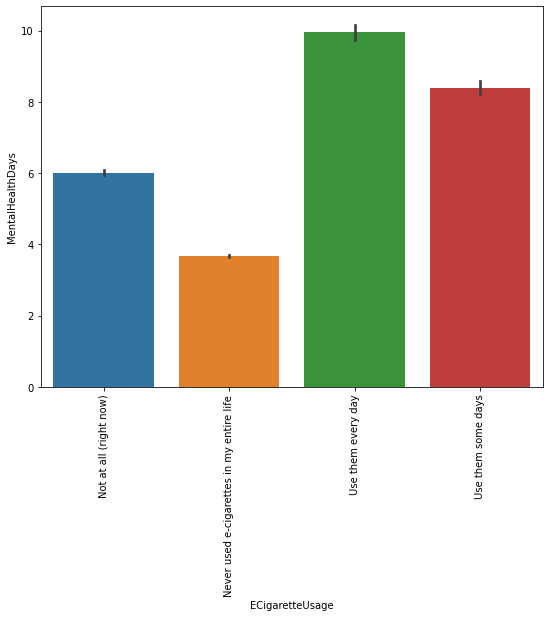

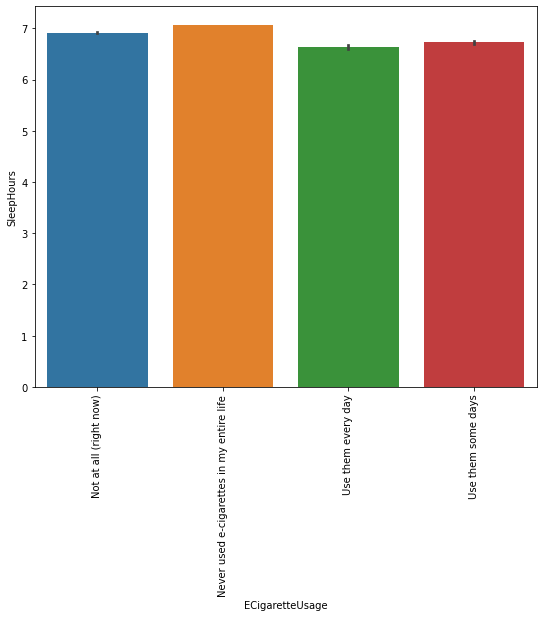

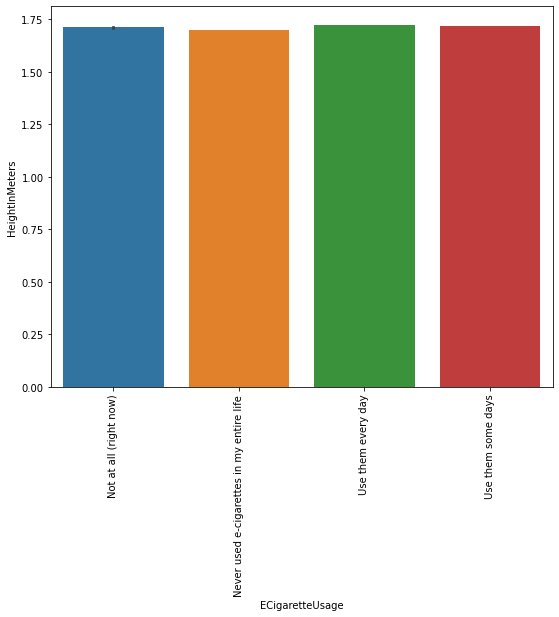

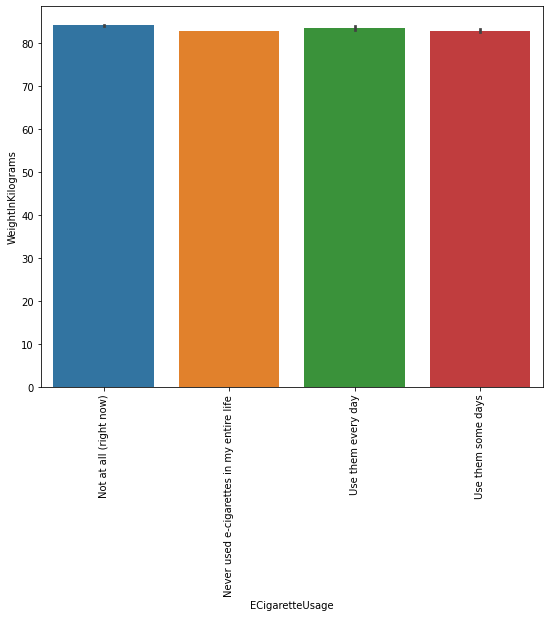

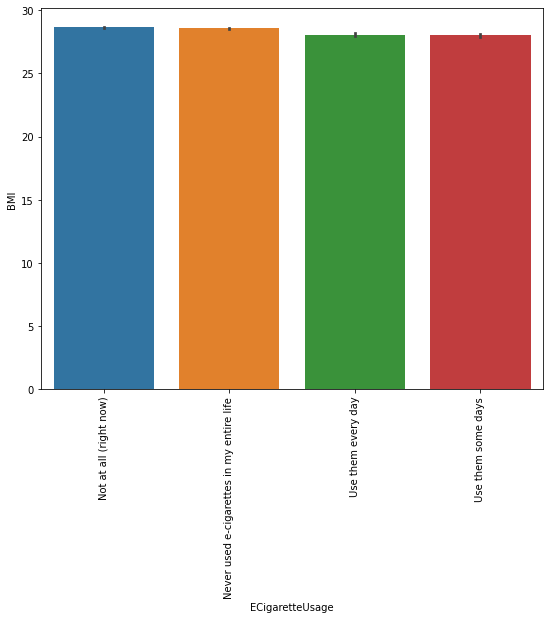

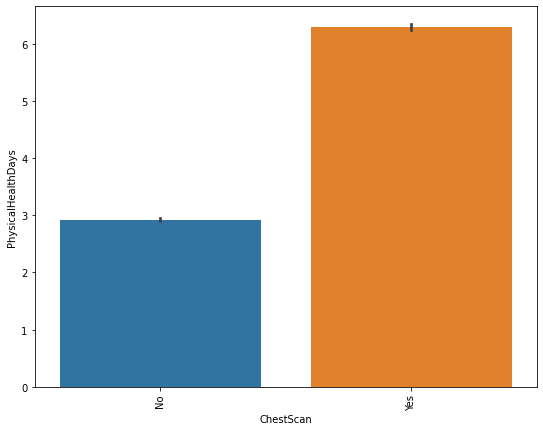

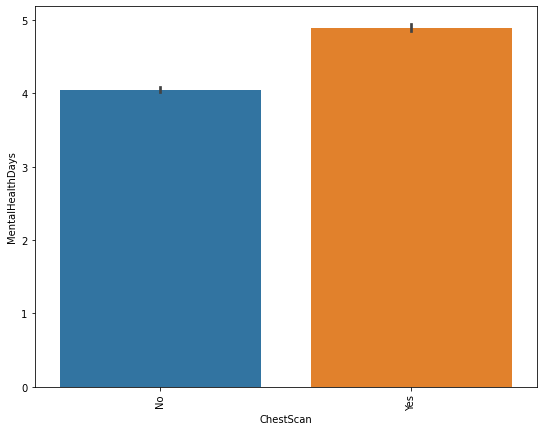

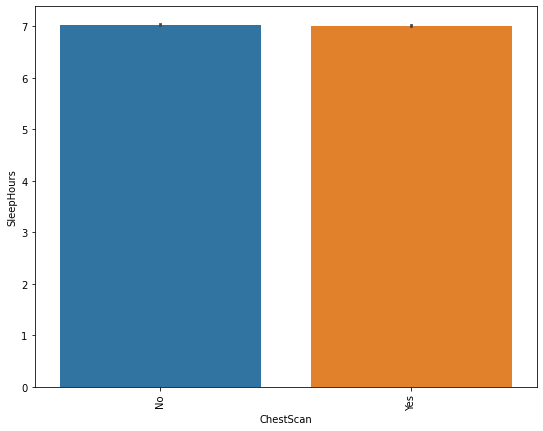

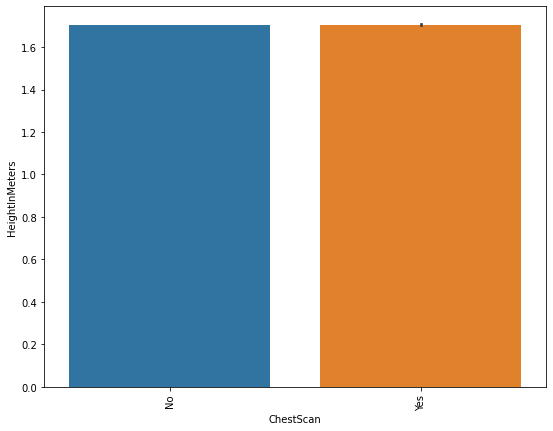

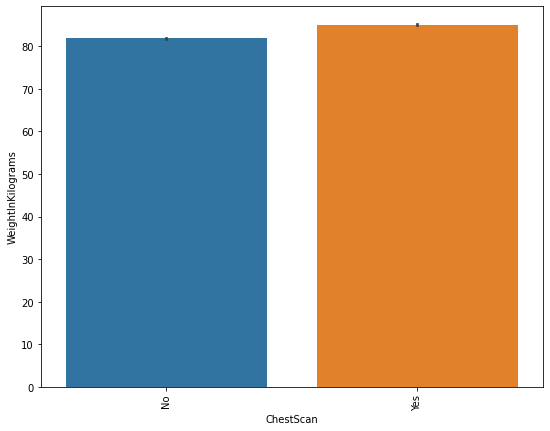

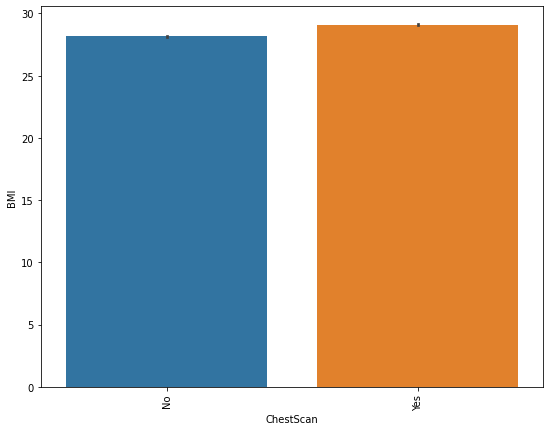

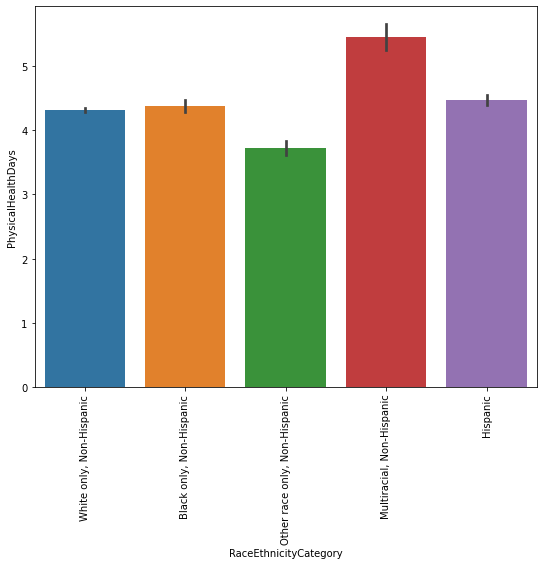

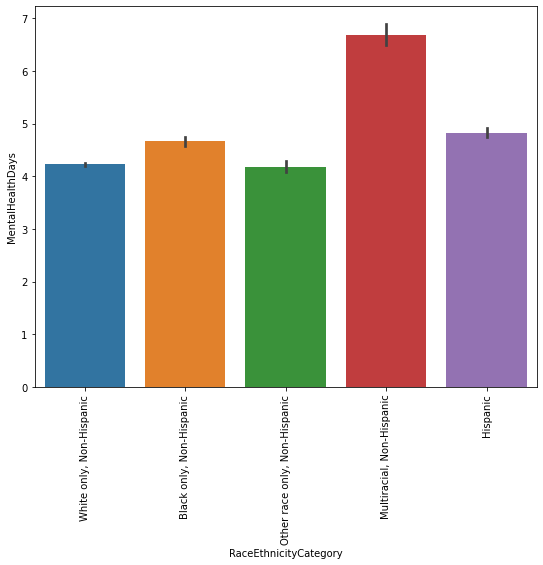

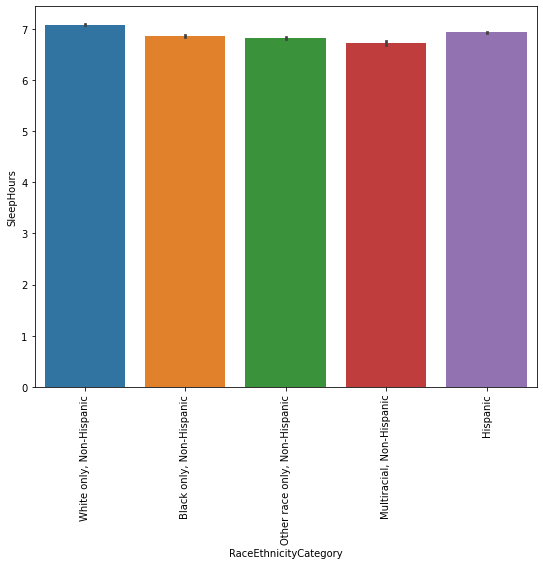

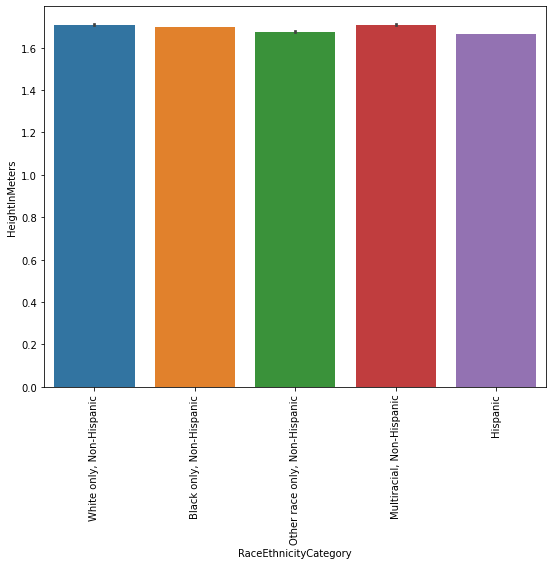

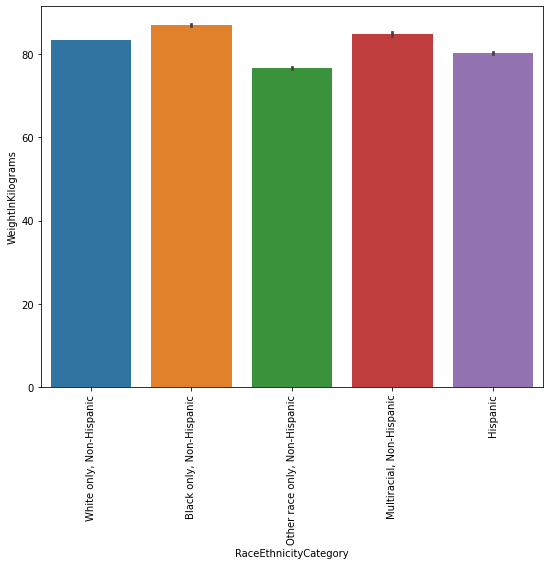

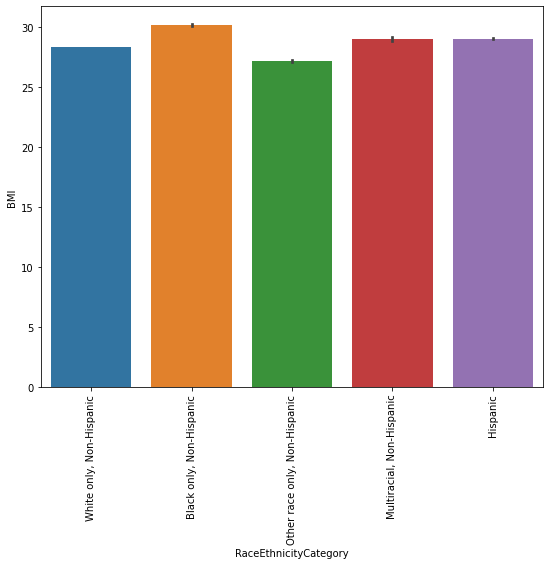

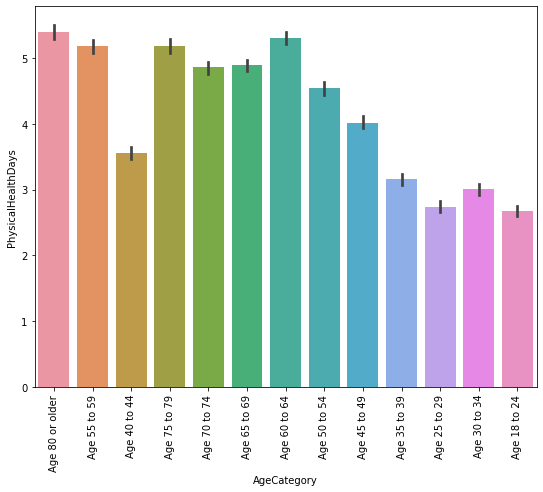

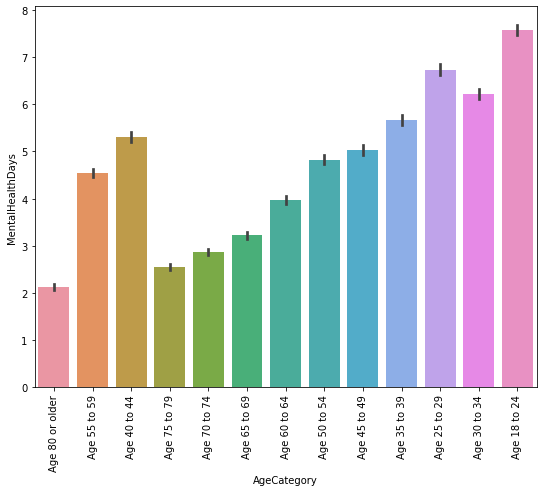

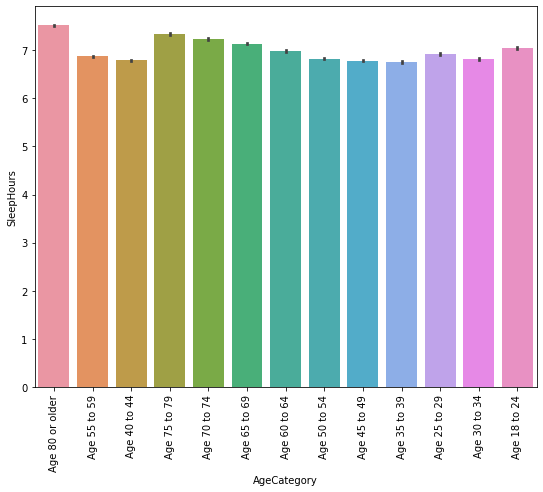

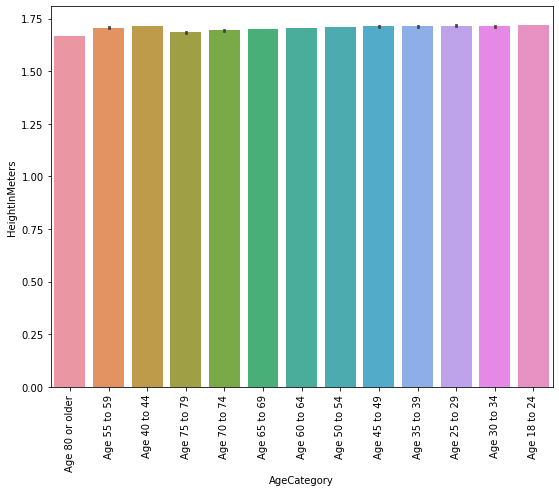

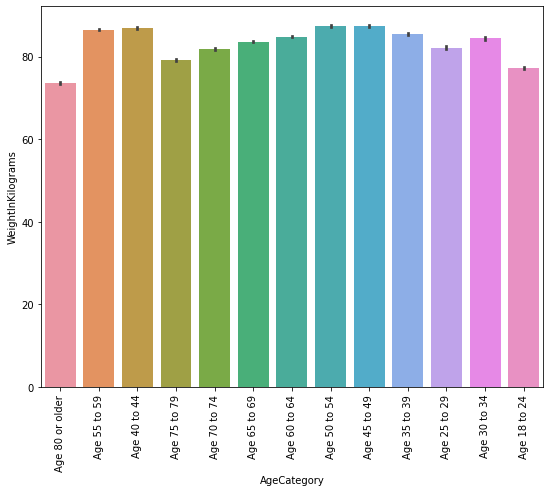

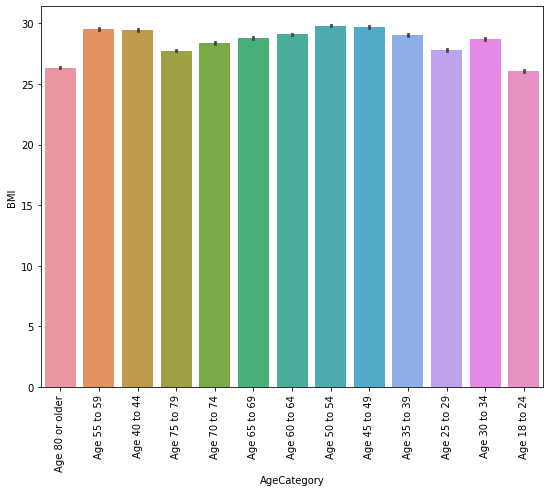

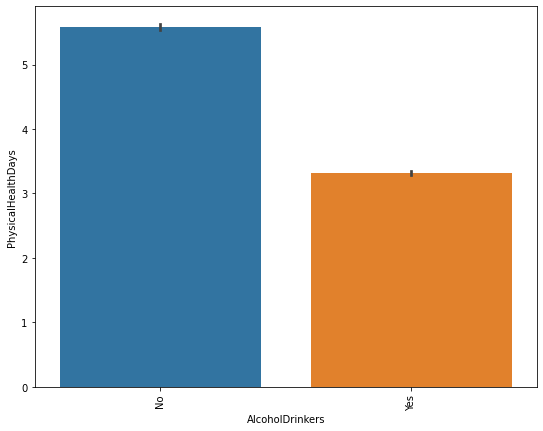

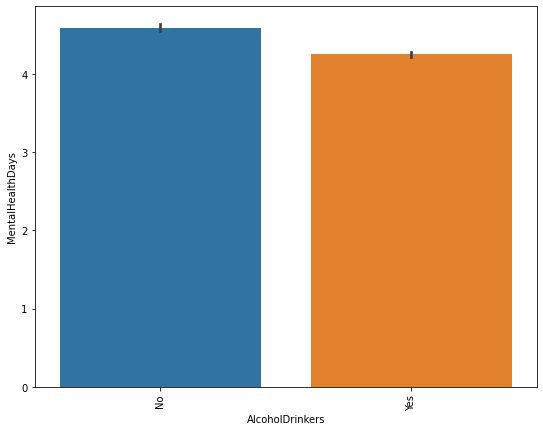

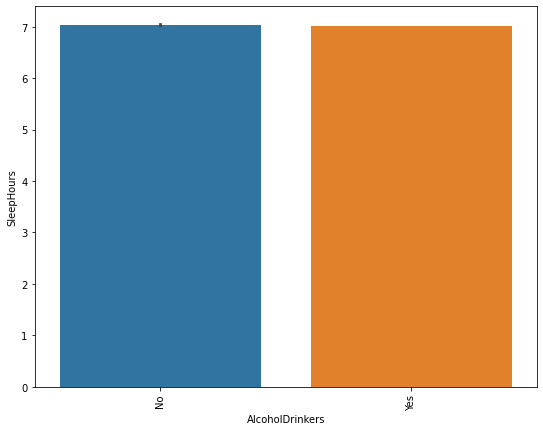

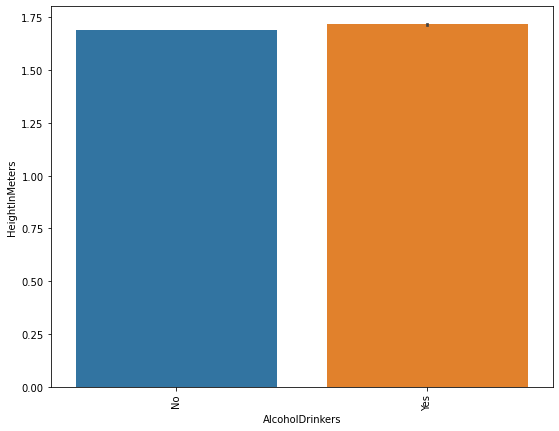

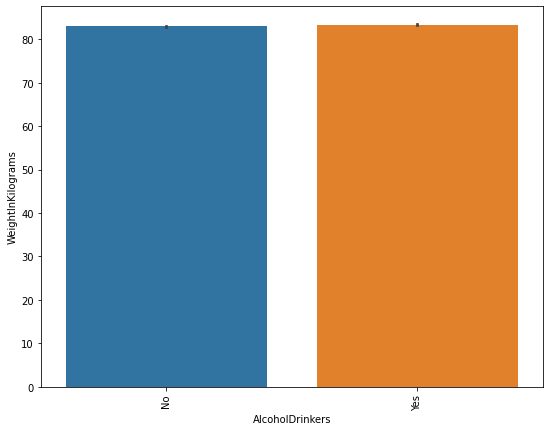

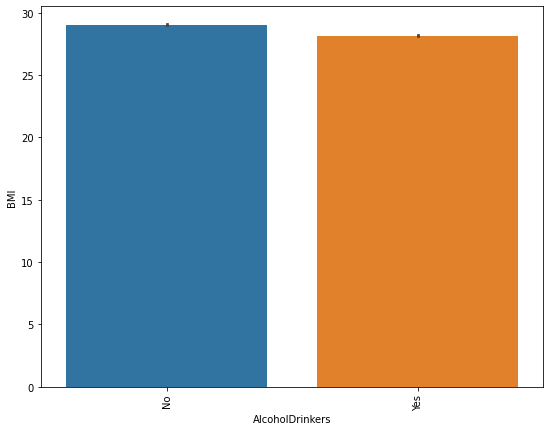

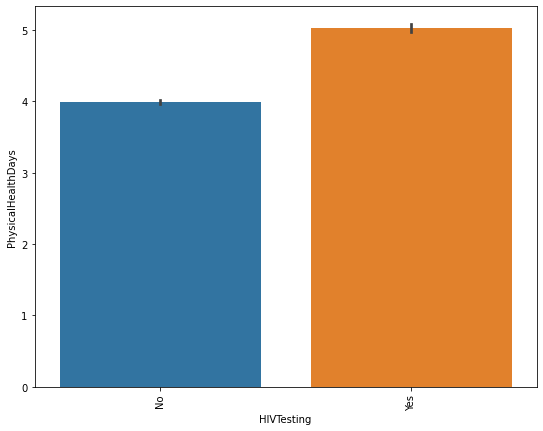

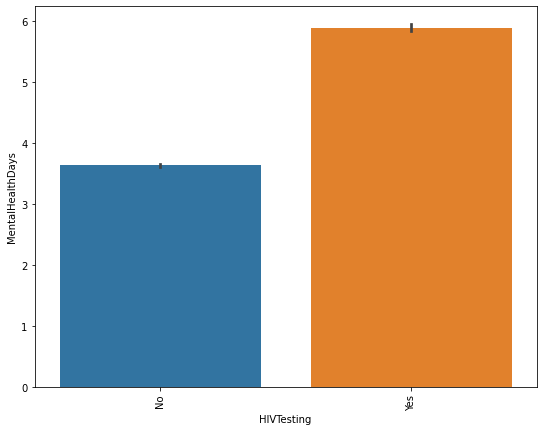

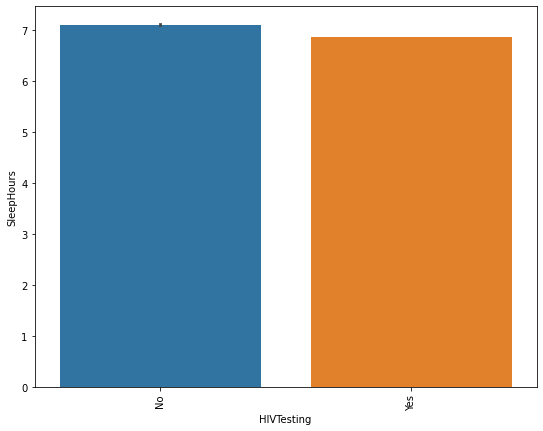

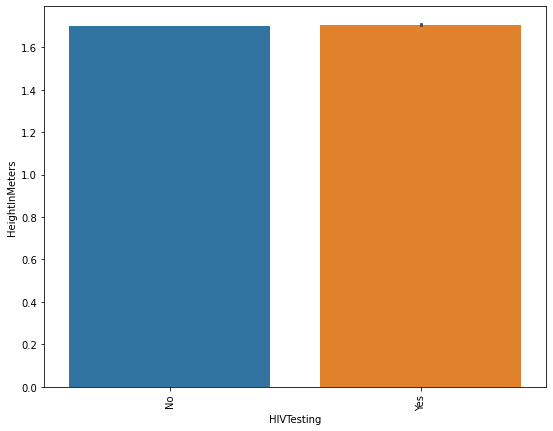

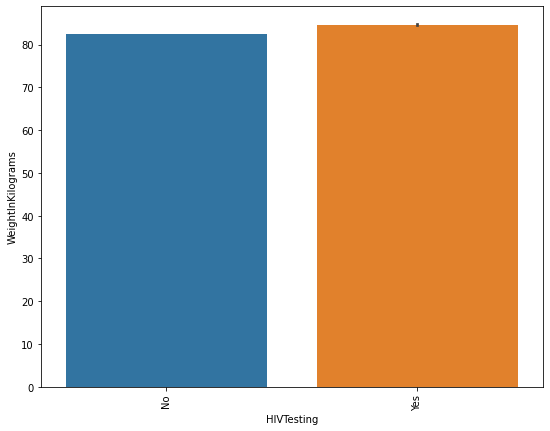

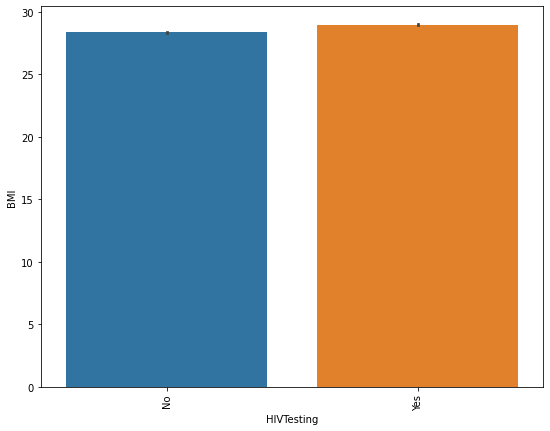

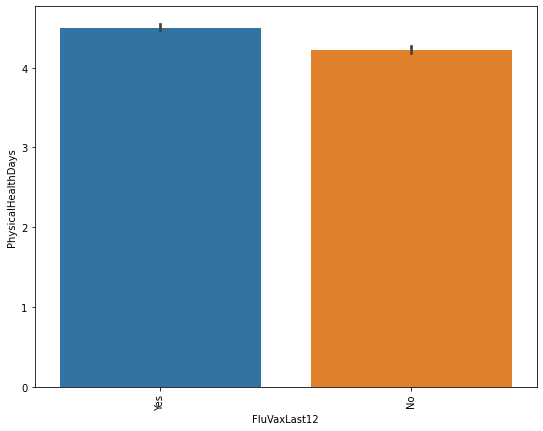

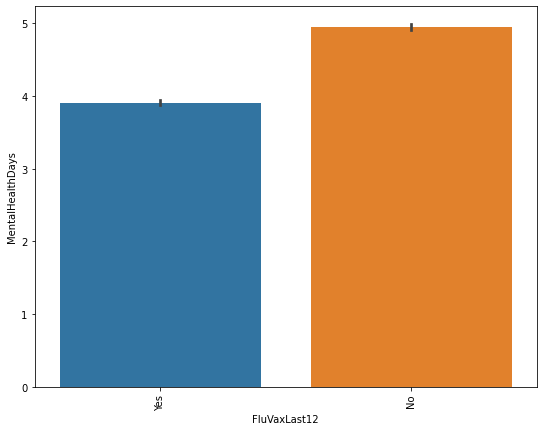

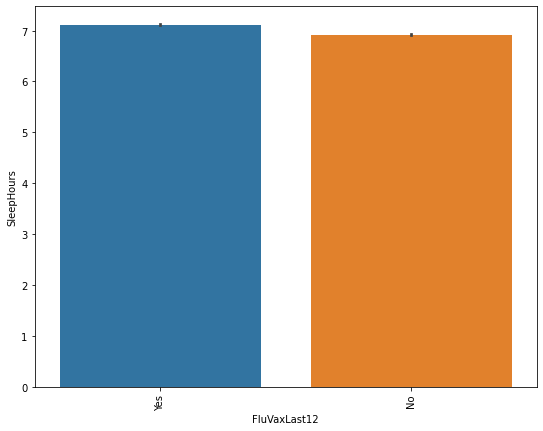

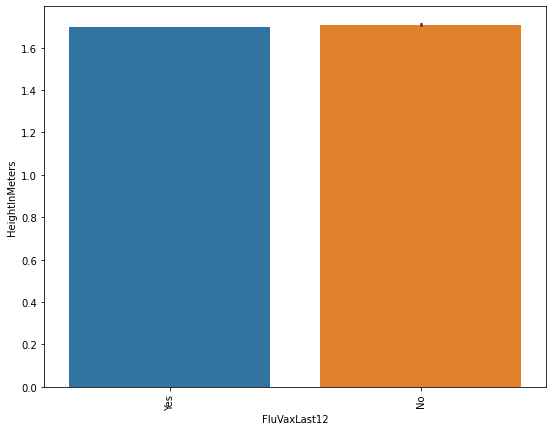

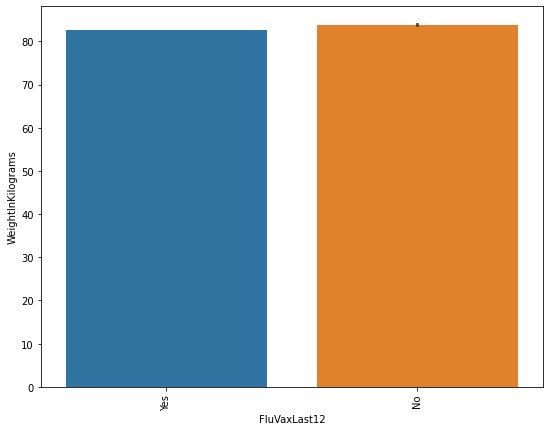

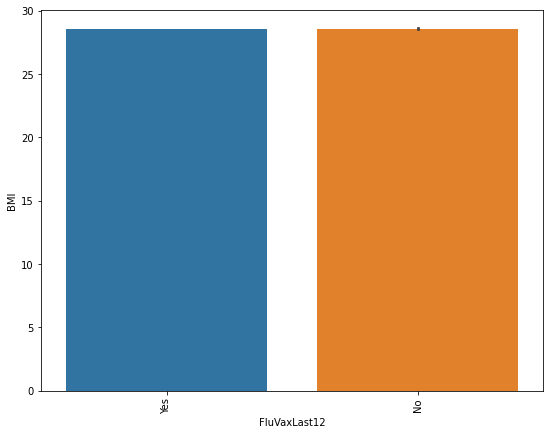

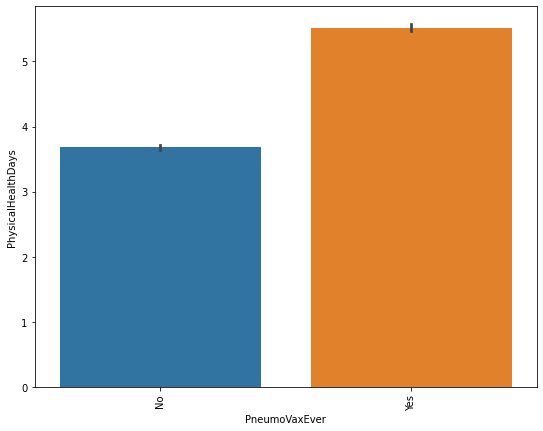

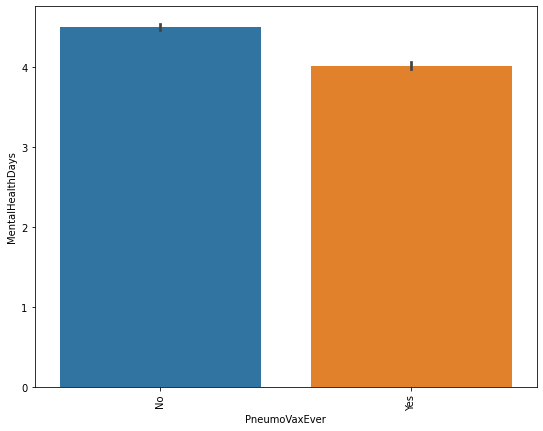

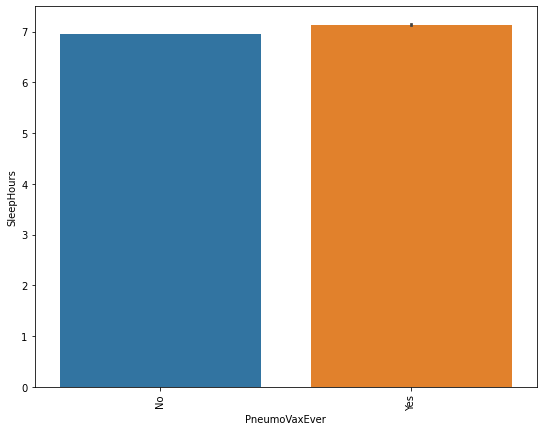

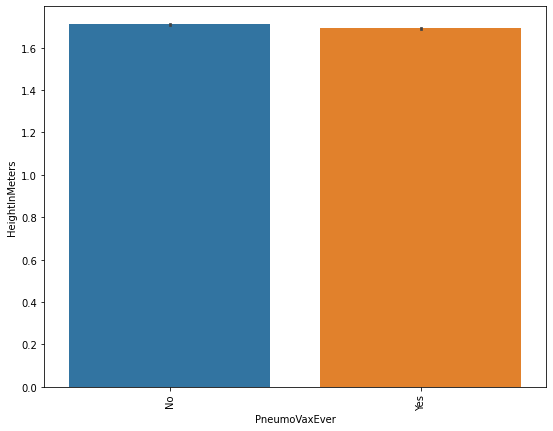

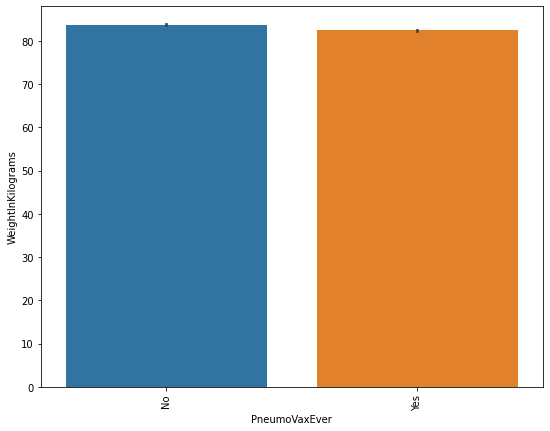

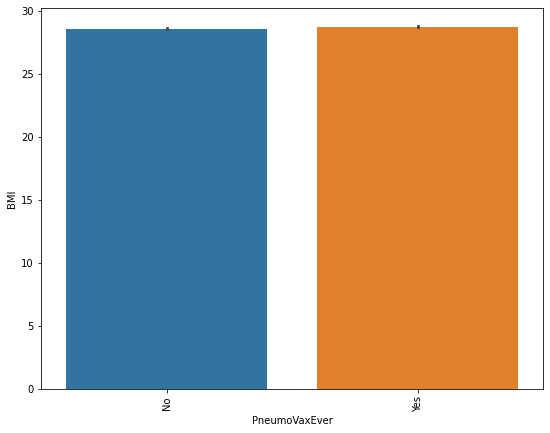

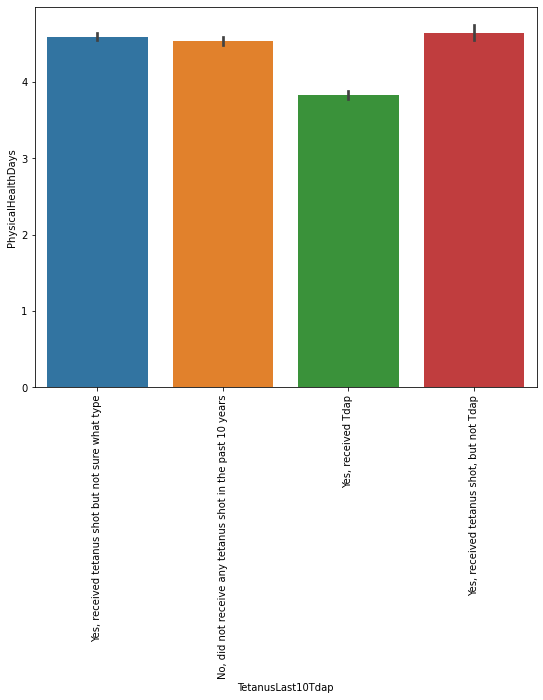

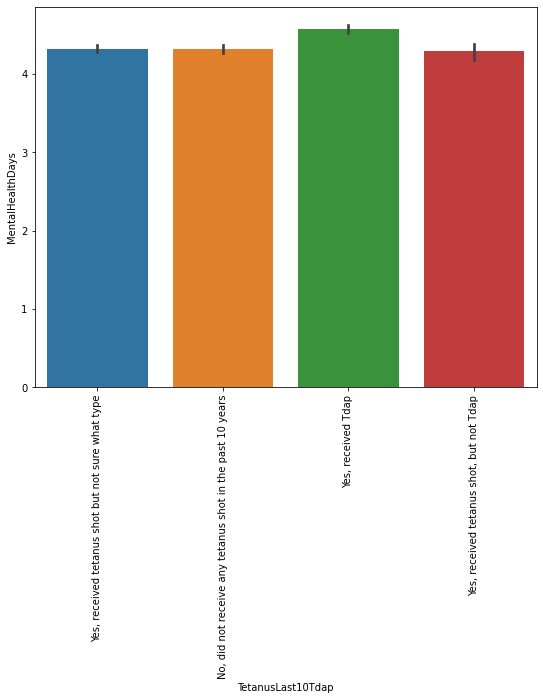

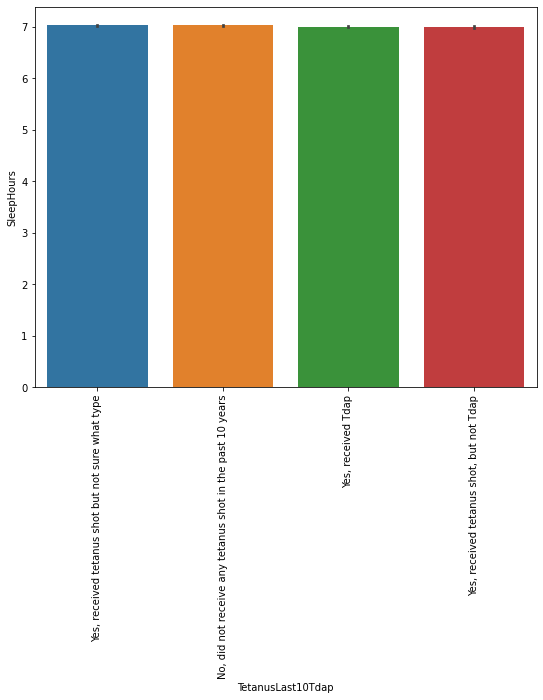

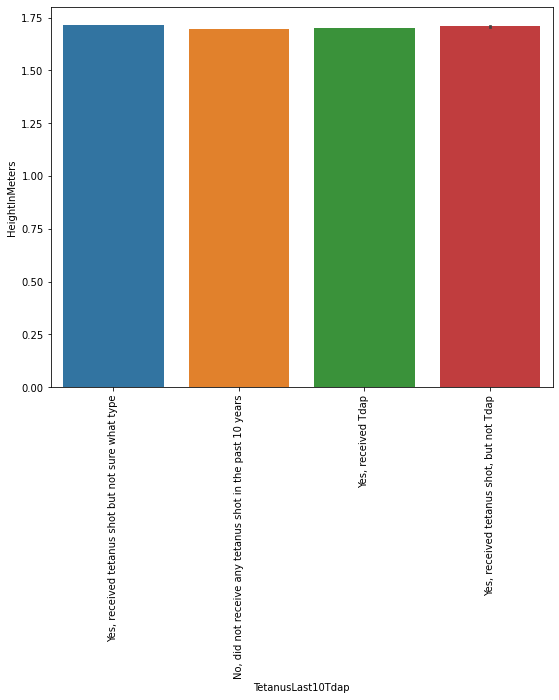

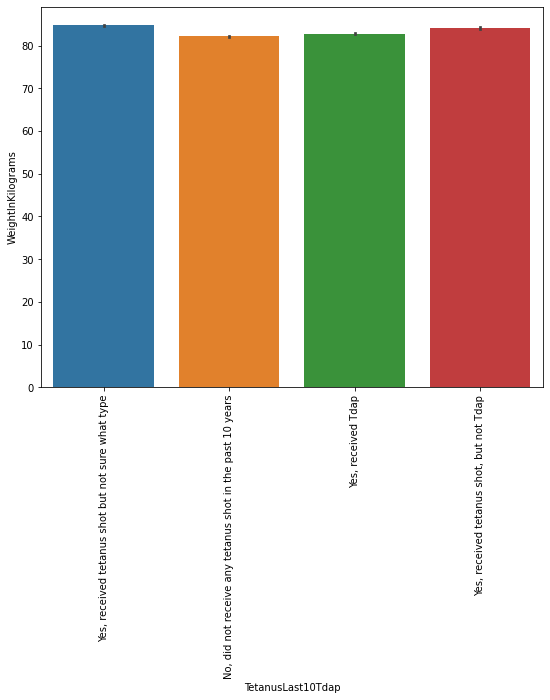

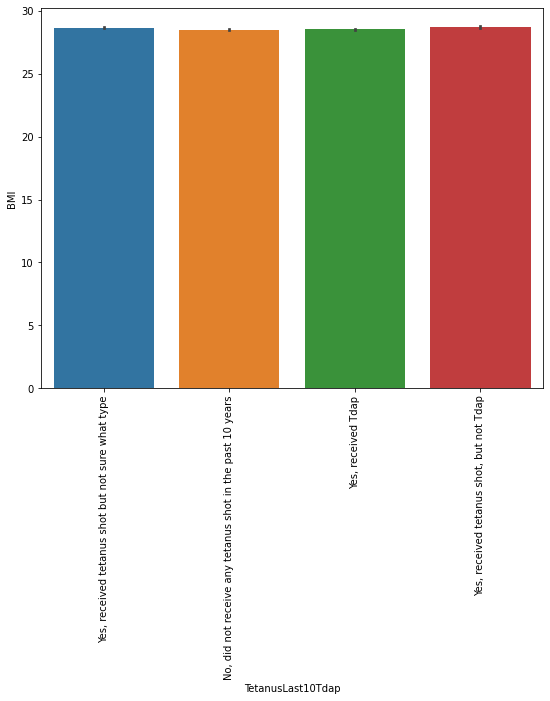

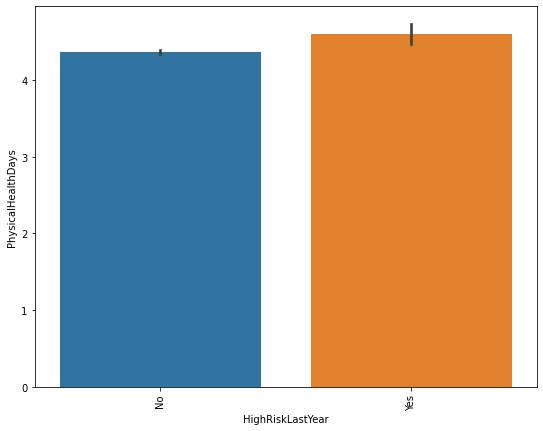

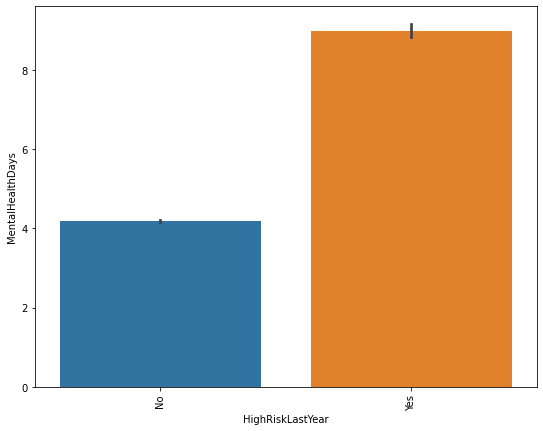

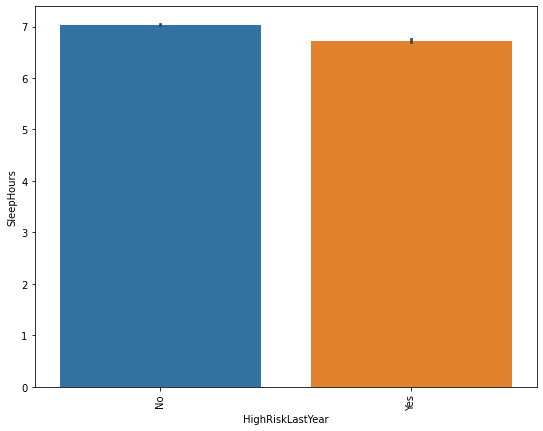

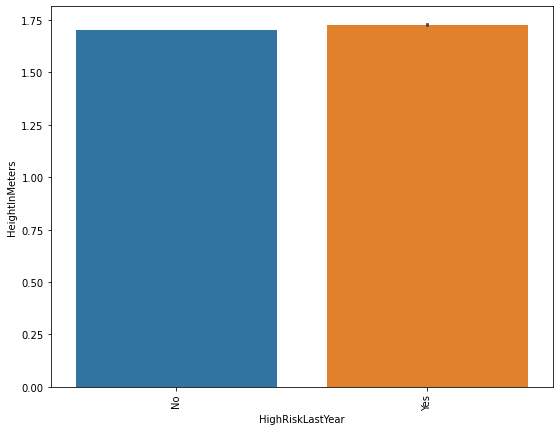

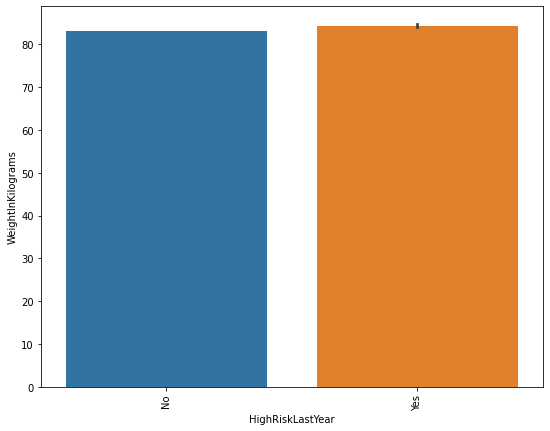

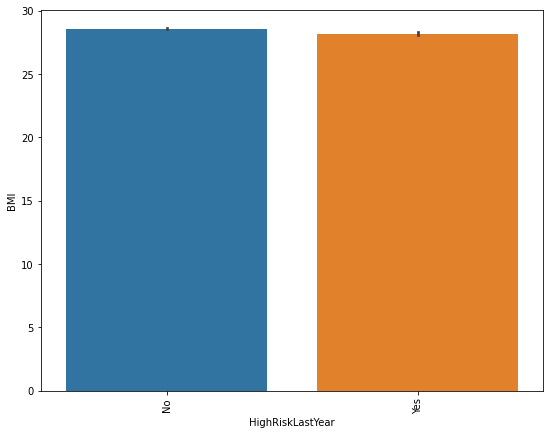

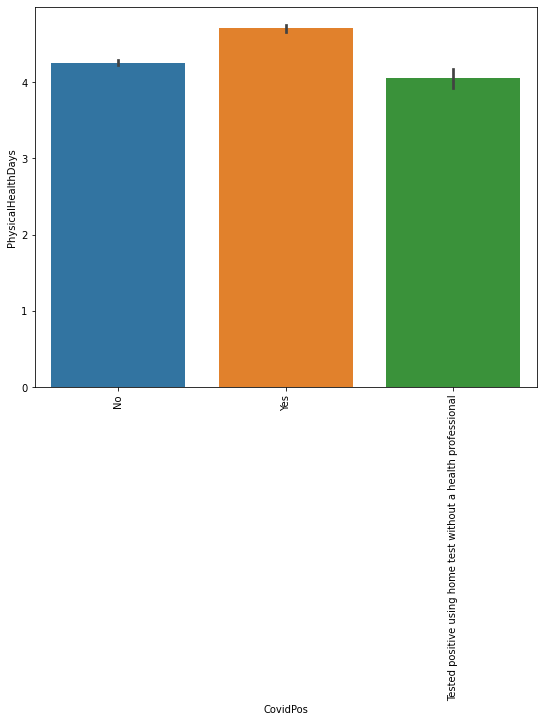

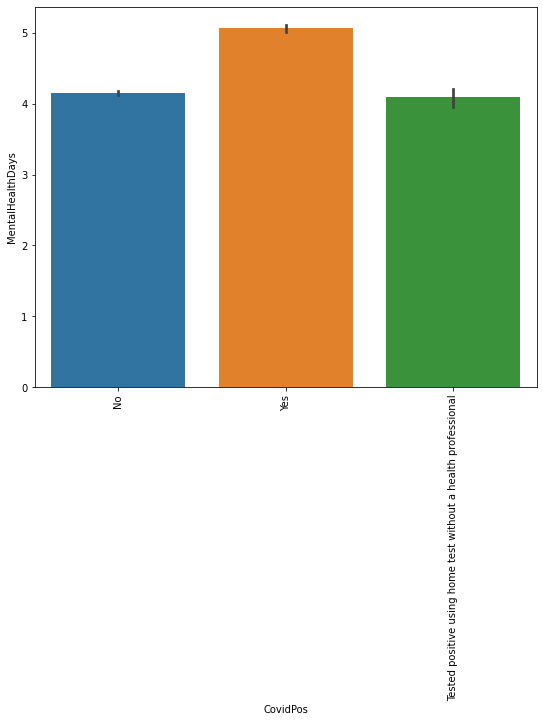

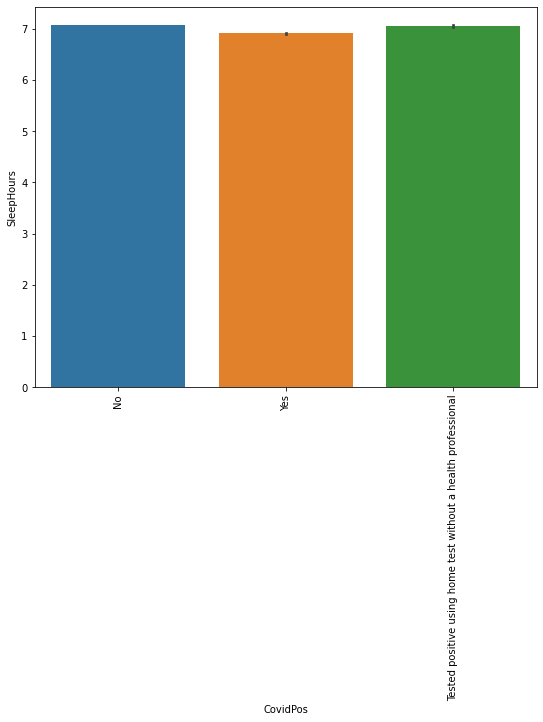

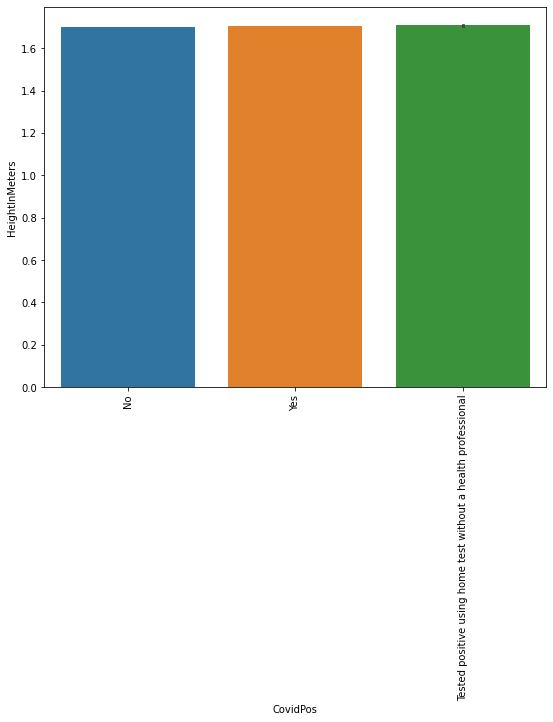

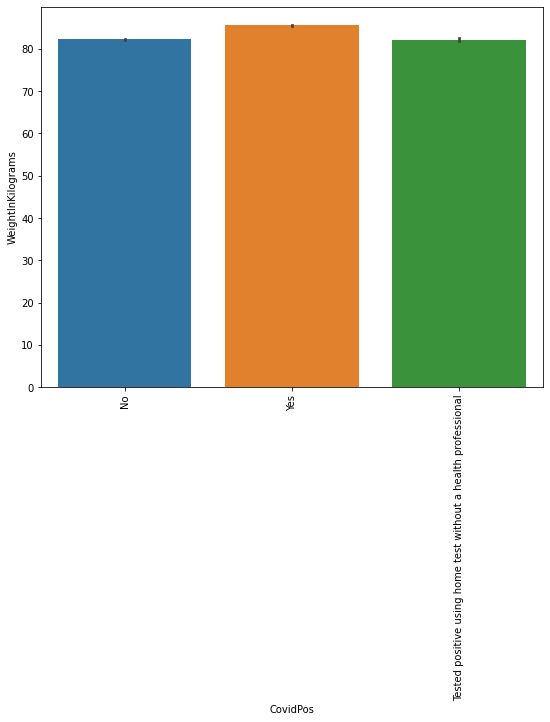

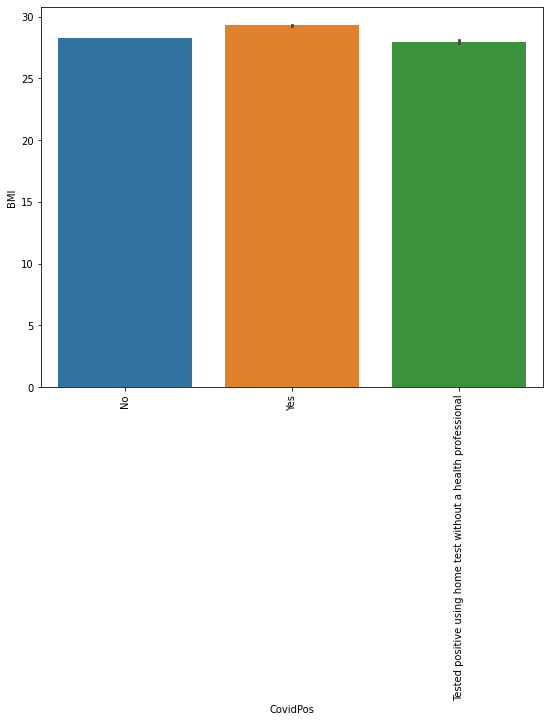

In [18]:
for i in categorical_columns:
    for j in numerical_columns:
        plt.figure(figsize = (9, 7))
        sns.barplot(data = df, x = i, y = j)
        plt.xticks(rotation = 90)
        plt.show()

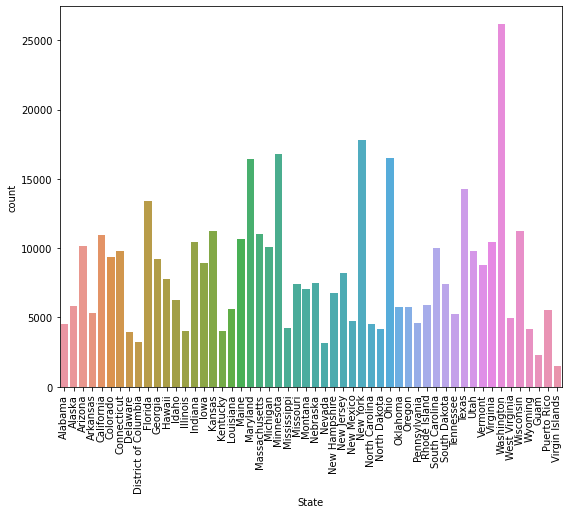

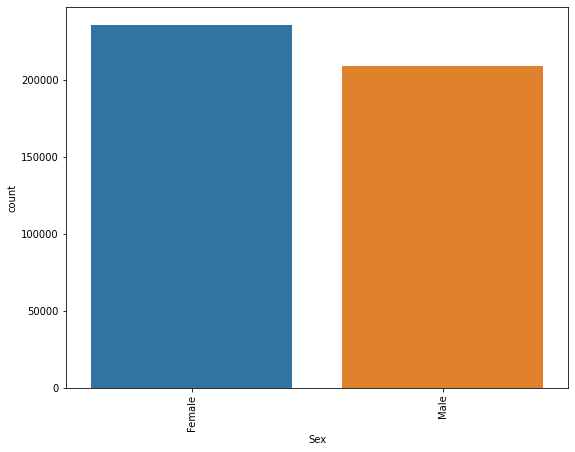

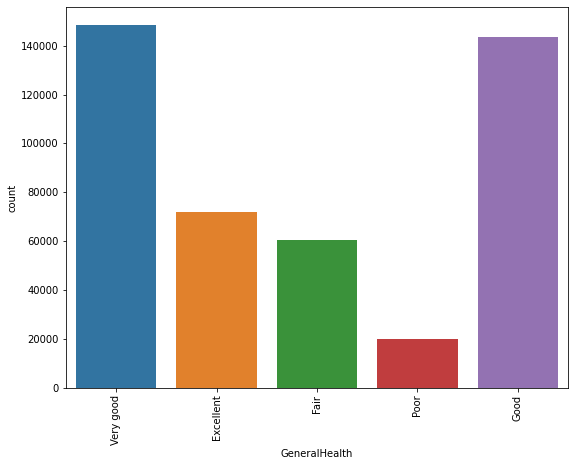

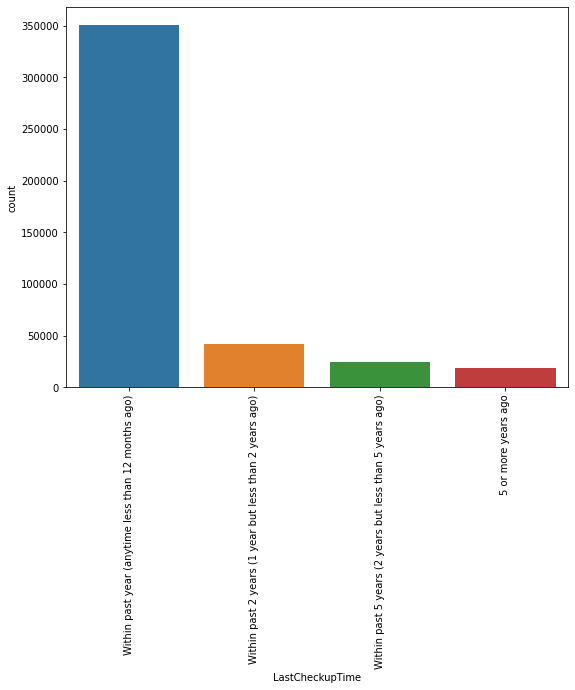

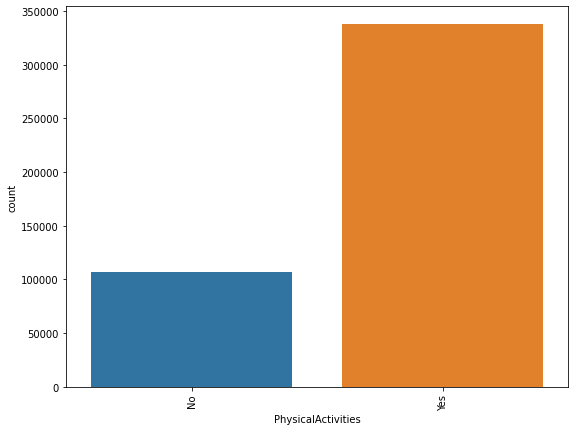

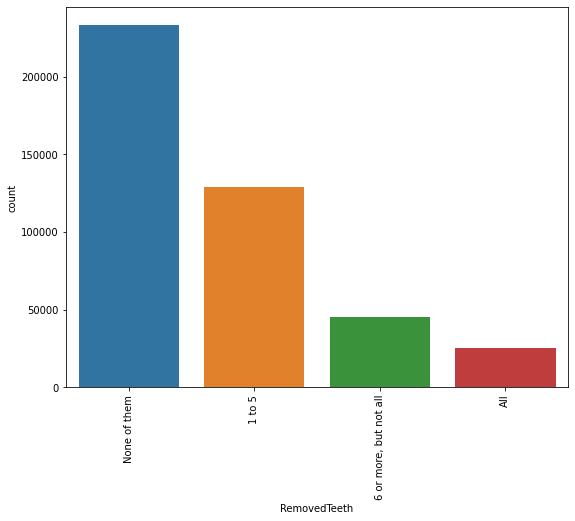

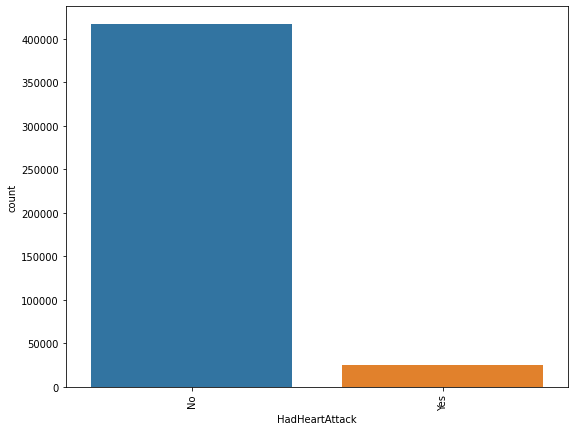

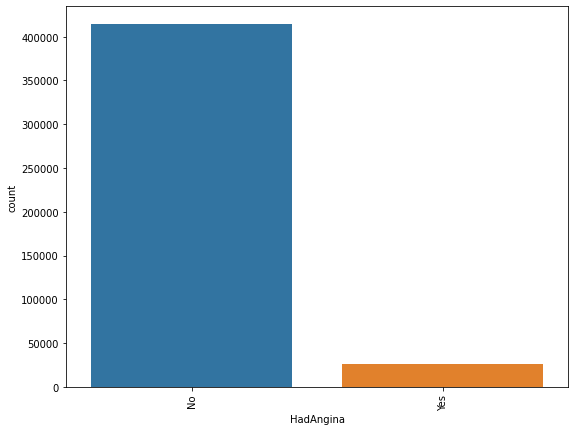

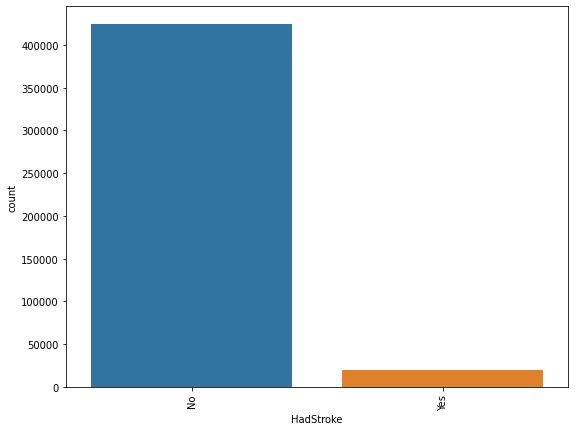

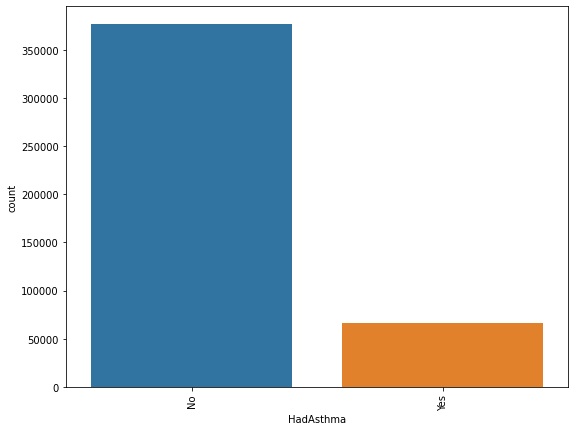

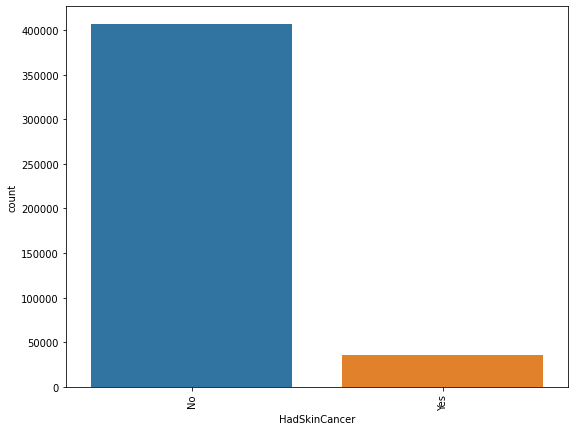

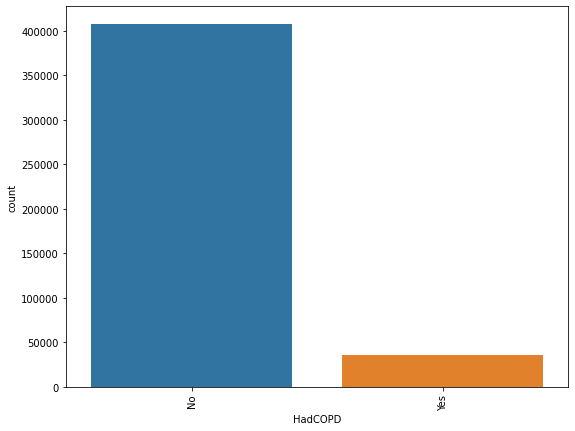

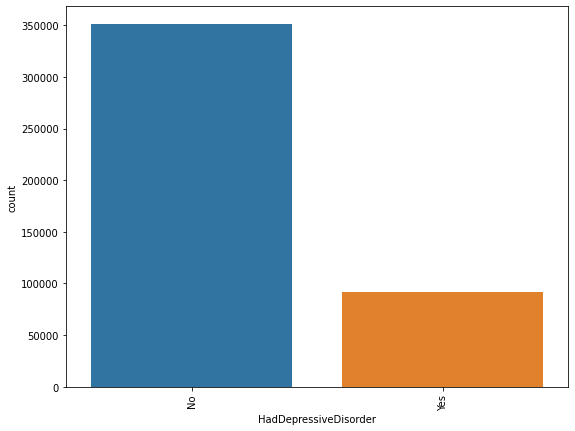

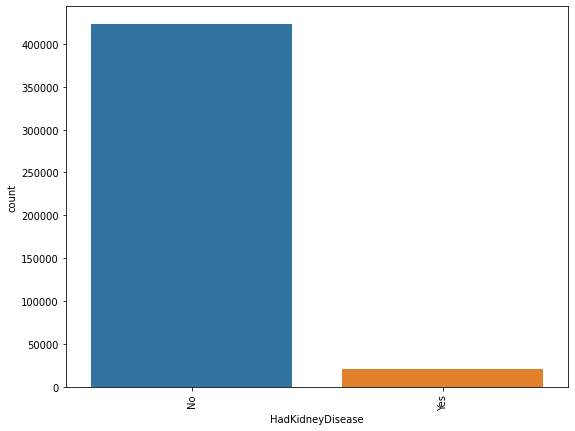

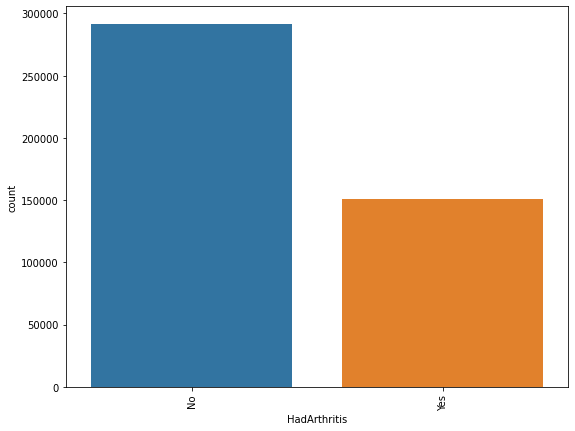

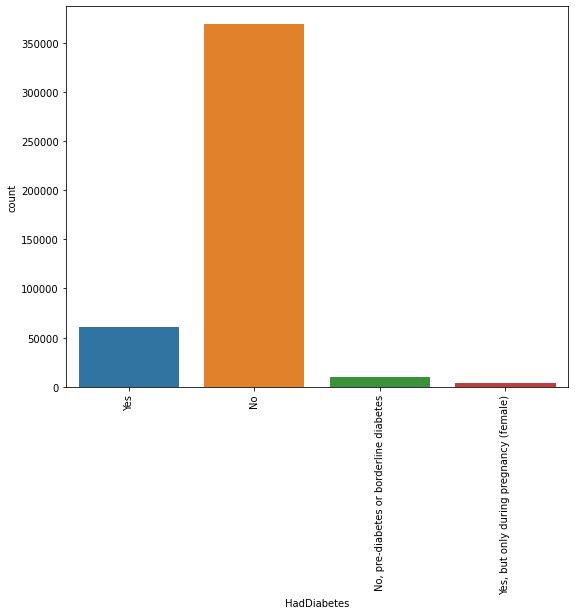

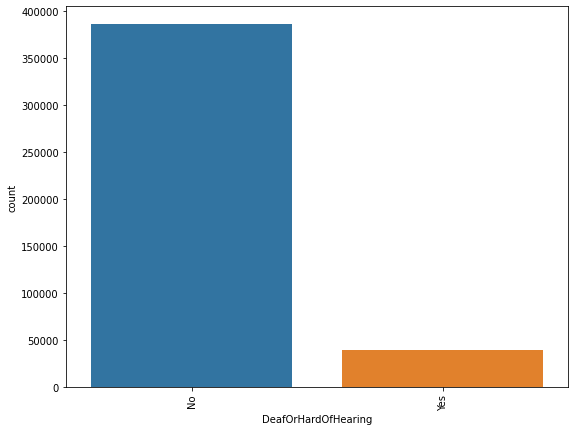

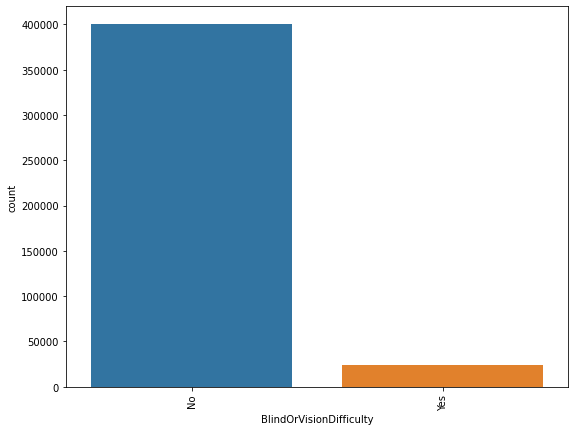

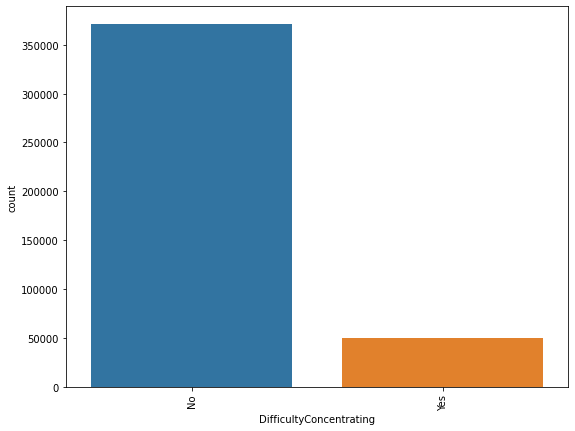

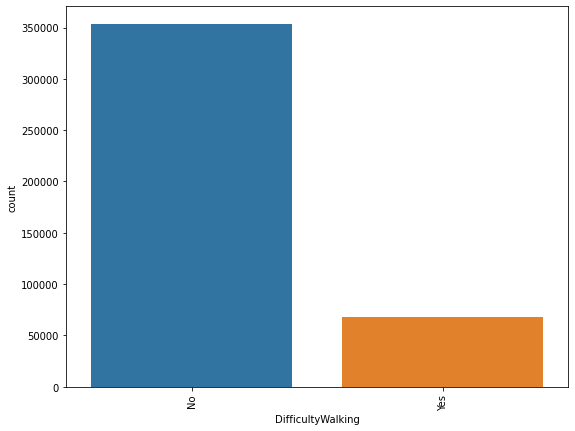

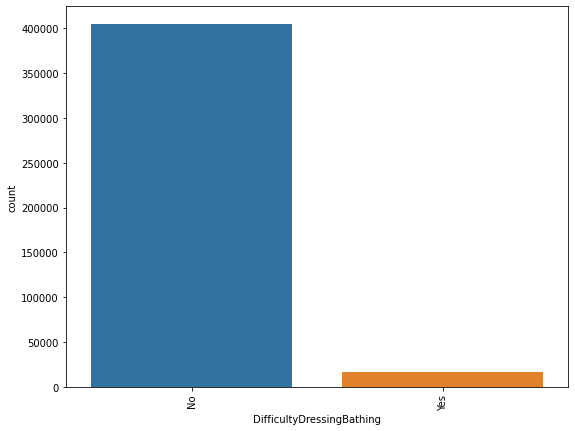

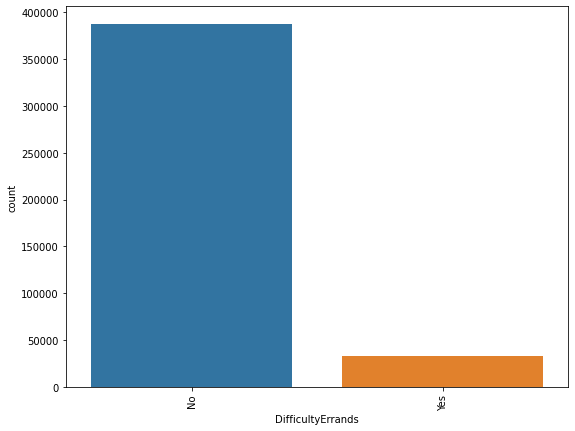

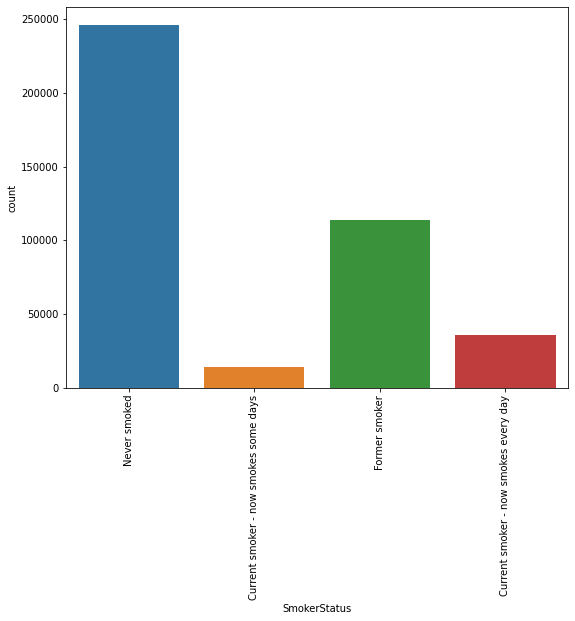

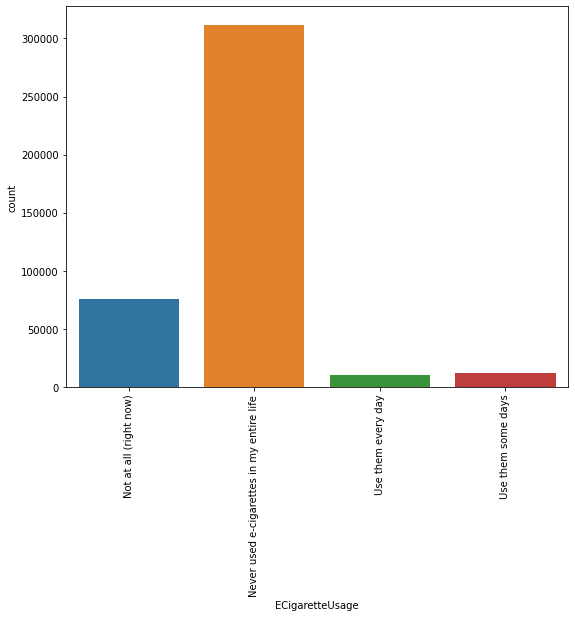

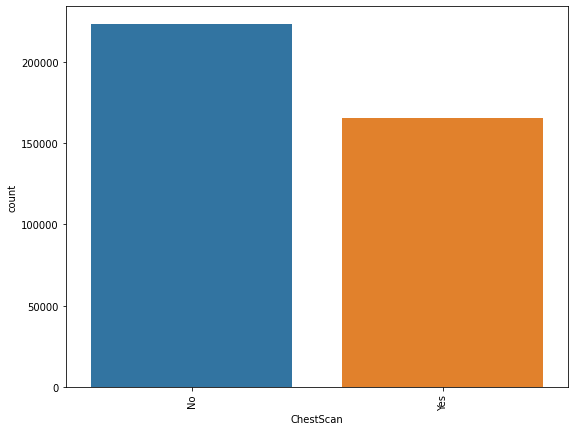

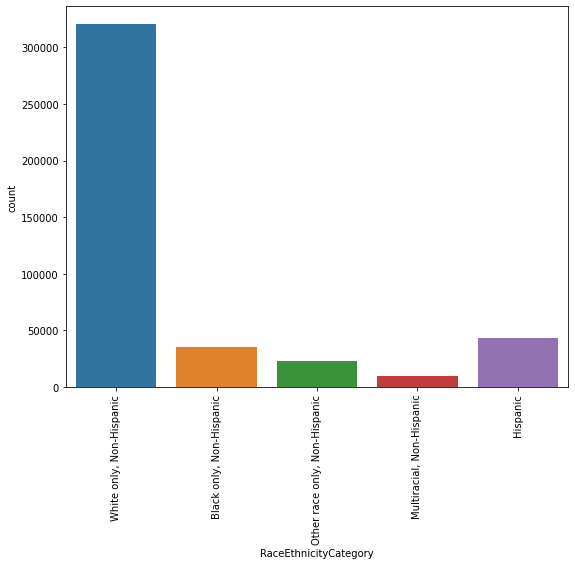

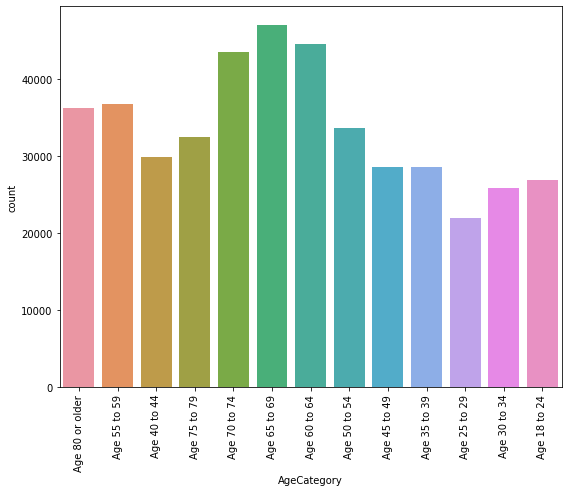

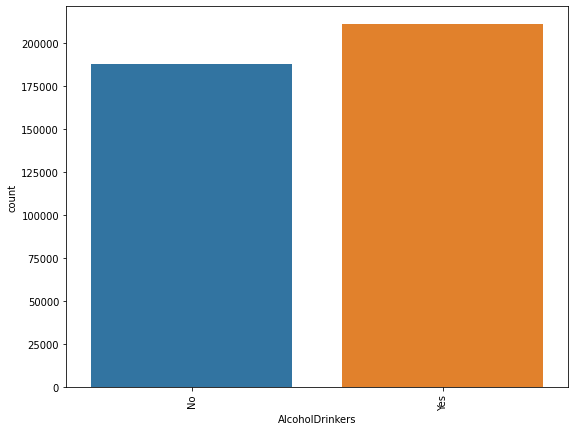

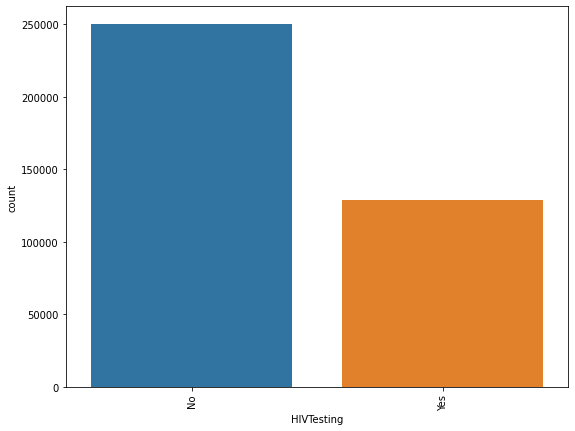

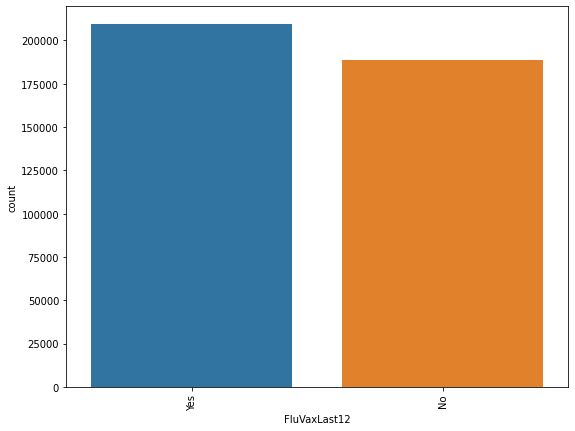

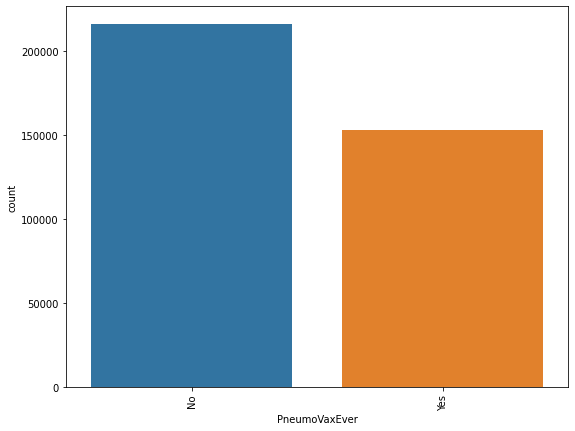

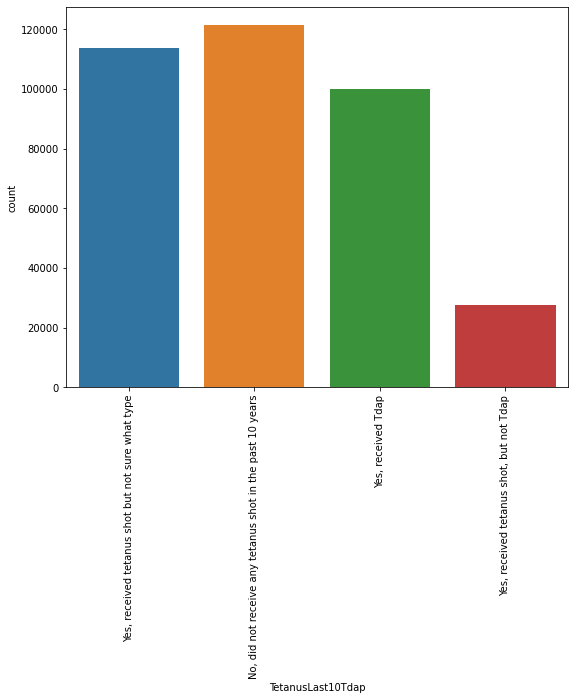

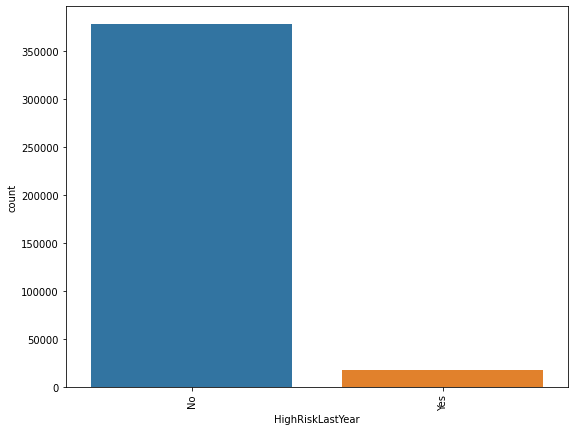

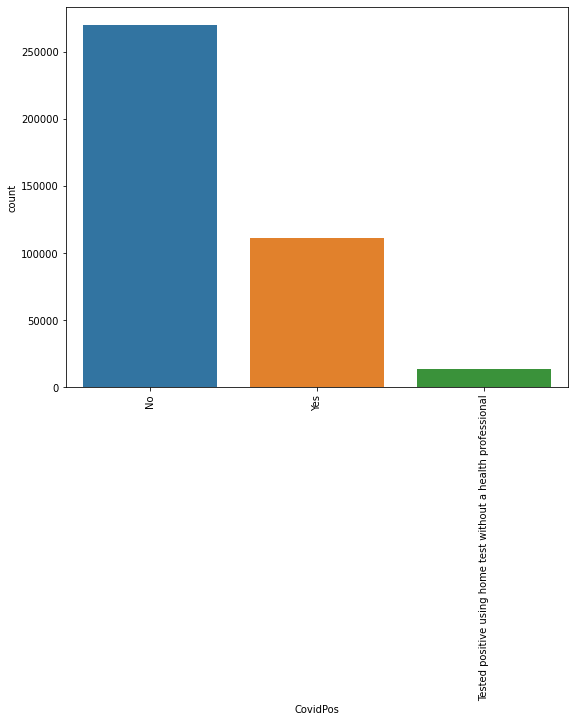

In [19]:
for column in categorical_columns:
    plt.figure(figsize = (9, 7))
    sns.countplot(data = df, x = column)
    plt.xticks(rotation = 90)
    plt.show()

In [20]:
numerical_columns

['PhysicalHealthDays',
 'MentalHealthDays',
 'SleepHours',
 'HeightInMeters',
 'WeightInKilograms',
 'BMI']

In [21]:
cols1 = ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours']
cols2 = ['HeightInMeters', 'WeightInKilograms', 'BMI']

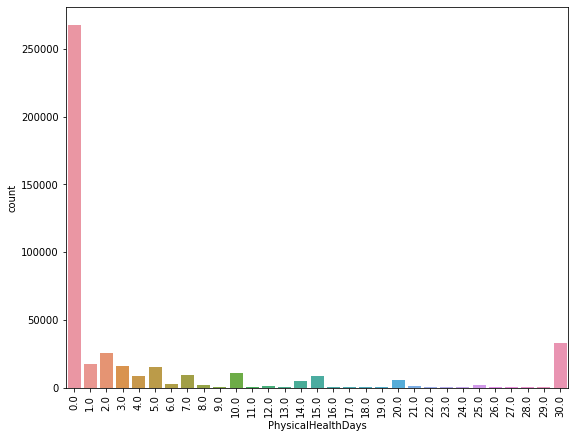

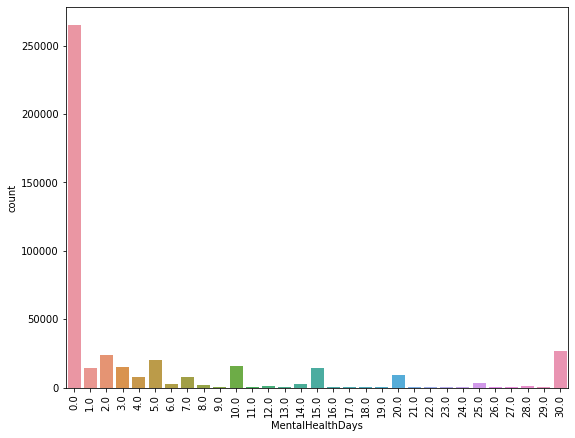

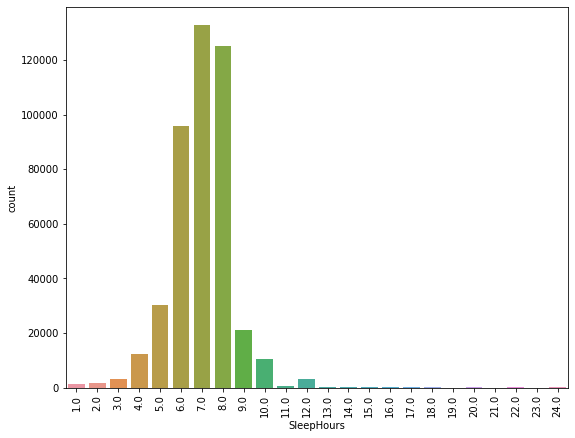

In [22]:
for column in cols1:
    plt.figure(figsize = (9, 7))
    sns.countplot(data = df, x = column)
    plt.xticks(rotation = 90)
    plt.show()

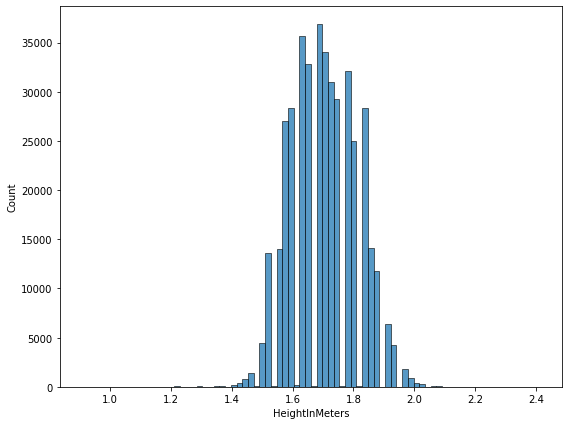

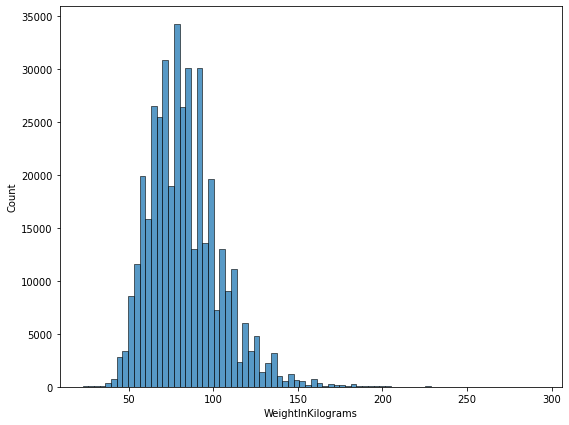

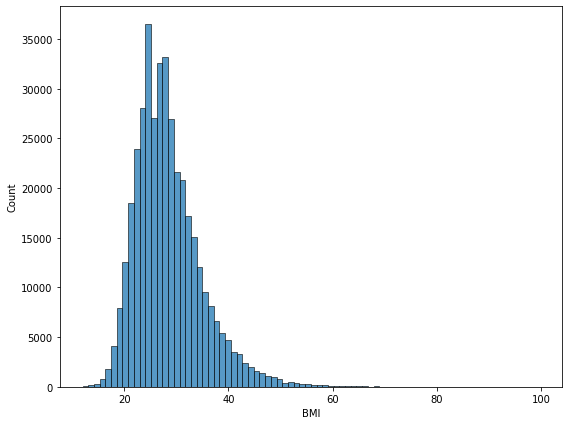

In [23]:
for column in cols2:
    plt.figure(figsize = (9, 7))
    sns.histplot(data = df, x = column, bins = 80)
    plt.show()

In [24]:
def scatter_plot(data, x_n, y_n, hue_n):
    plt.figure(figsize = (9, 7))
    sns.scatterplot(data = data, x = x_n, y = y_n, hue = hue_n)
    plt.show()

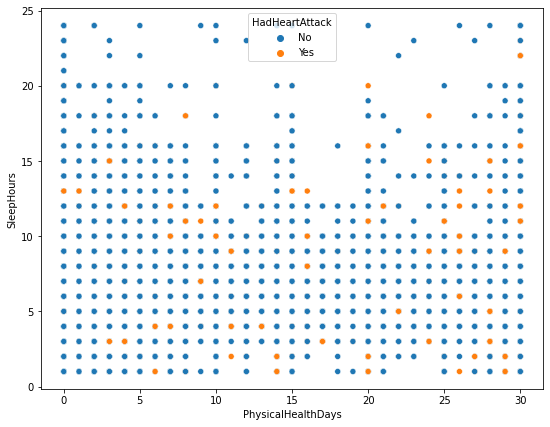

In [25]:
scatter_plot(df, 'PhysicalHealthDays', 'SleepHours', 'HadHeartAttack')

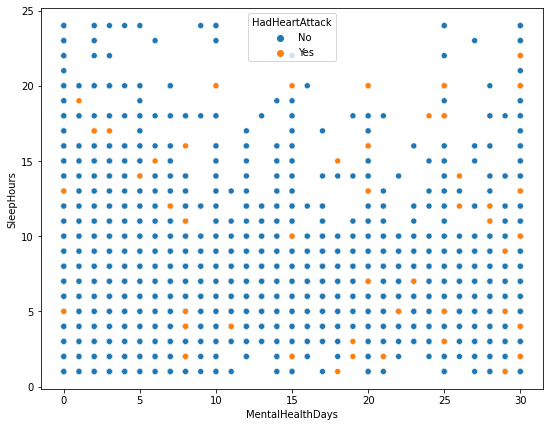

In [26]:
scatter_plot(df, 'MentalHealthDays', 'SleepHours', 'HadHeartAttack')

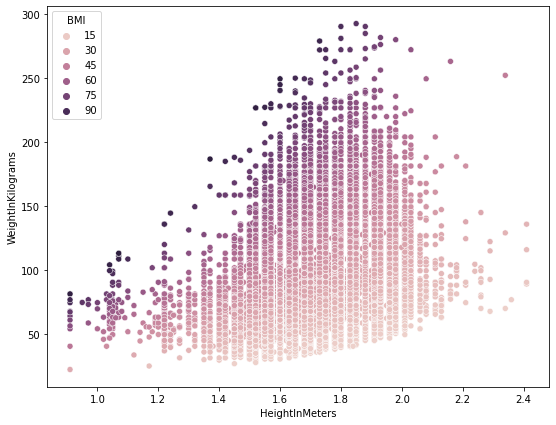

In [27]:
scatter_plot(df, 'HeightInMeters', 'WeightInKilograms', 'BMI')

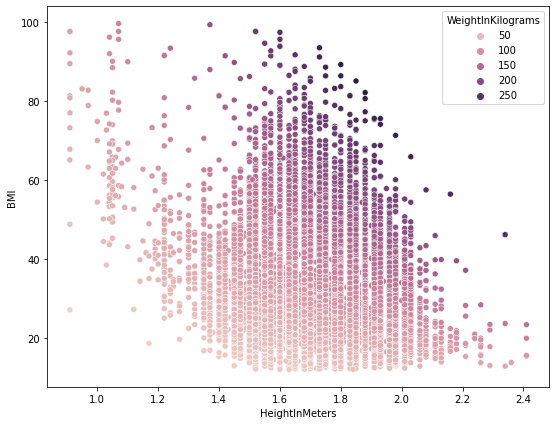

In [28]:
scatter_plot(df, 'HeightInMeters', 'BMI', 'WeightInKilograms')

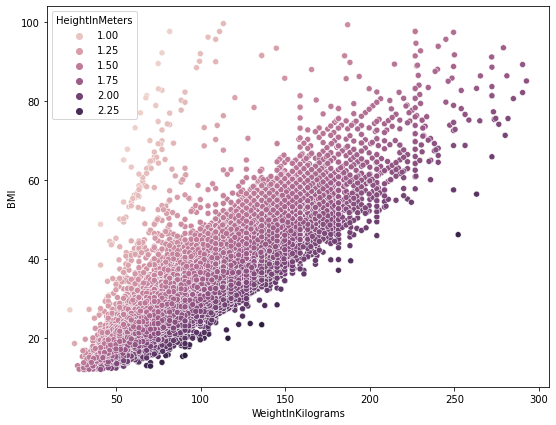

In [29]:
scatter_plot(df, 'WeightInKilograms', 'BMI', 'HeightInMeters')

In [30]:
cols3 = []
for column in categorical_columns:
    if df[column].nunique() <= 10:
        cols3.append(column)

In [31]:
cols3

['Sex',
 'GeneralHealth',
 'LastCheckupTime',
 'PhysicalActivities',
 'RemovedTeeth',
 'HadHeartAttack',
 'HadAngina',
 'HadStroke',
 'HadAsthma',
 'HadSkinCancer',
 'HadCOPD',
 'HadDepressiveDisorder',
 'HadKidneyDisease',
 'HadArthritis',
 'HadDiabetes',
 'DeafOrHardOfHearing',
 'BlindOrVisionDifficulty',
 'DifficultyConcentrating',
 'DifficultyWalking',
 'DifficultyDressingBathing',
 'DifficultyErrands',
 'SmokerStatus',
 'ECigaretteUsage',
 'ChestScan',
 'RaceEthnicityCategory',
 'AlcoholDrinkers',
 'HIVTesting',
 'FluVaxLast12',
 'PneumoVaxEver',
 'TetanusLast10Tdap',
 'HighRiskLastYear',
 'CovidPos']

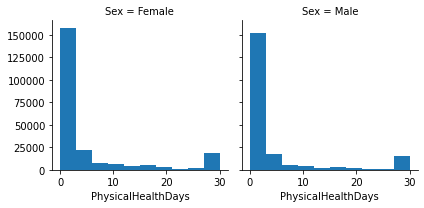

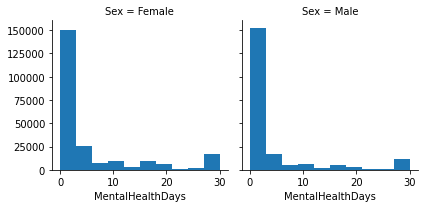

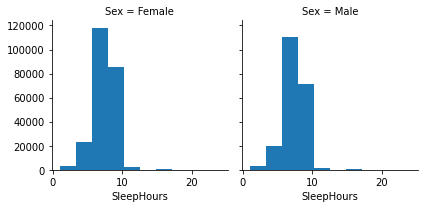

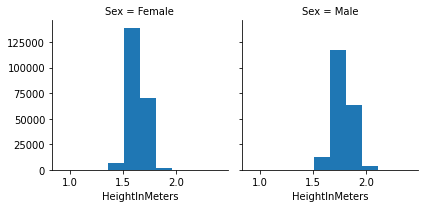

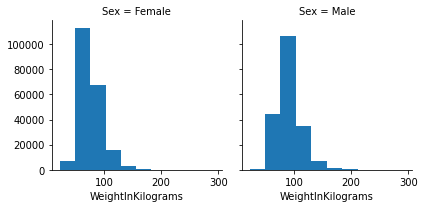

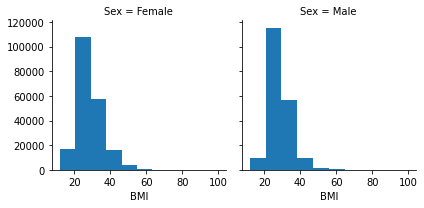

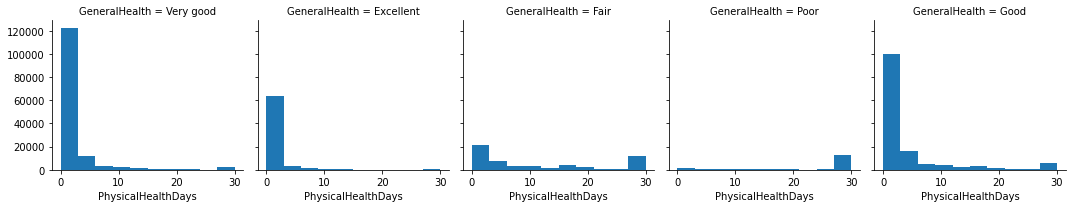

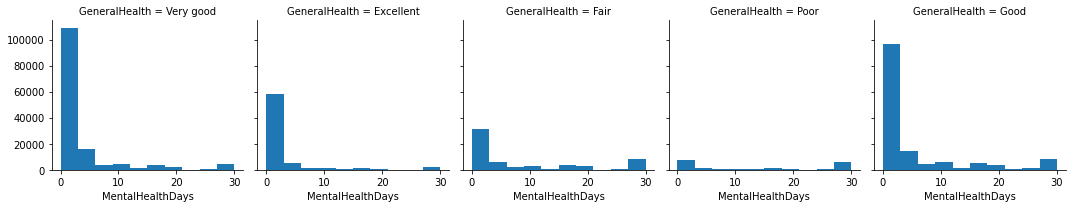

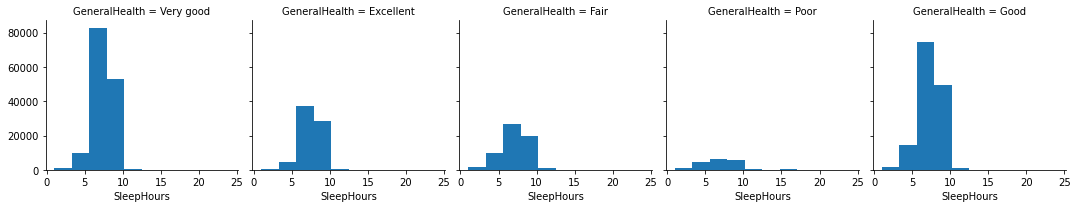

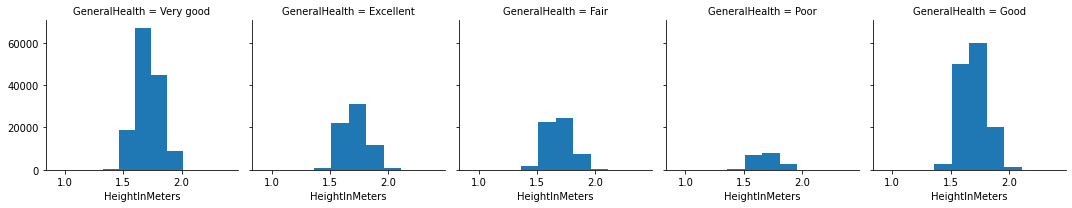

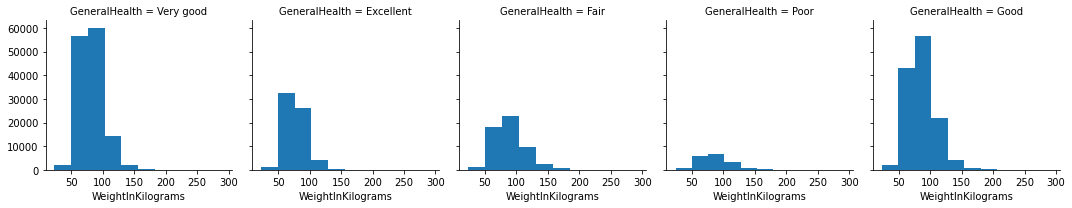

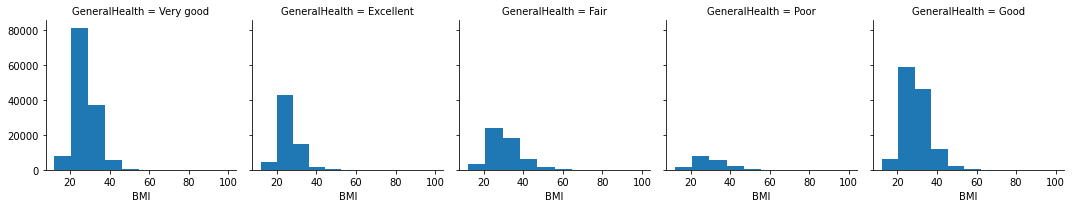

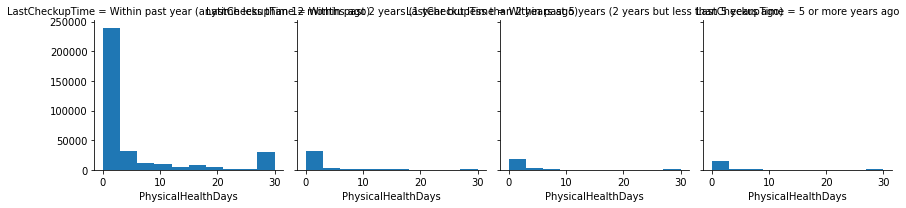

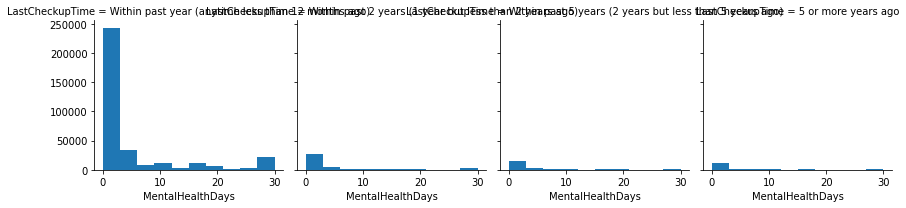

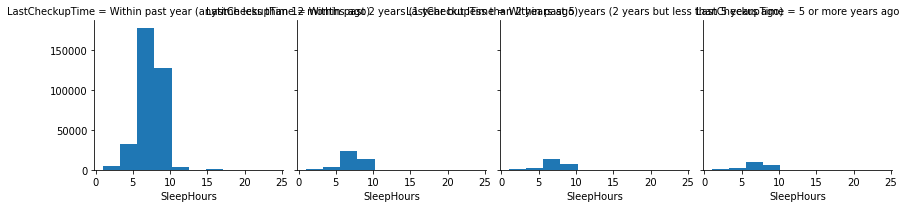

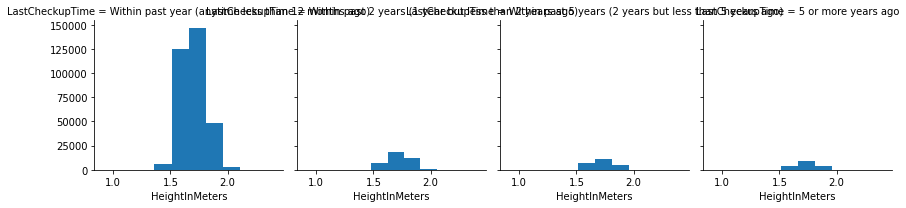

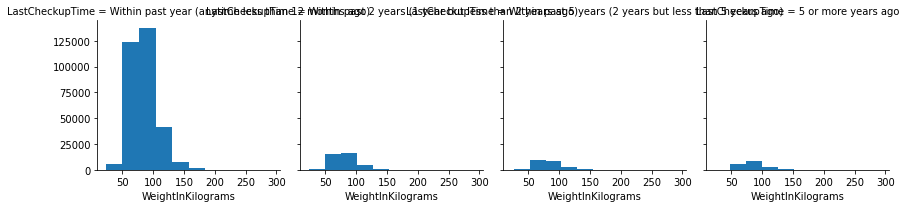

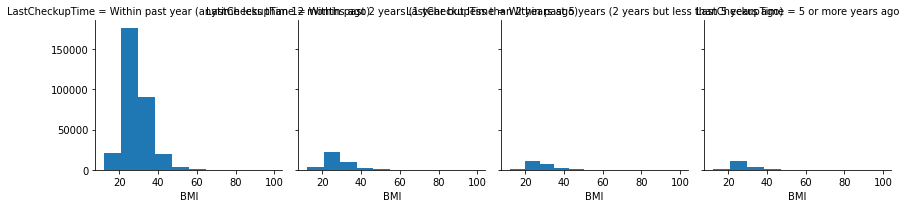

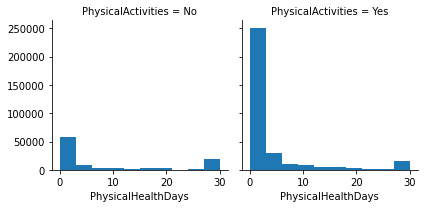

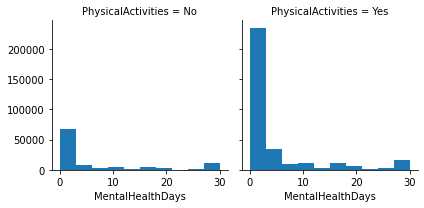

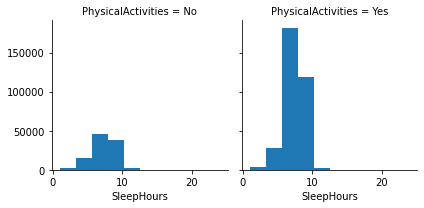

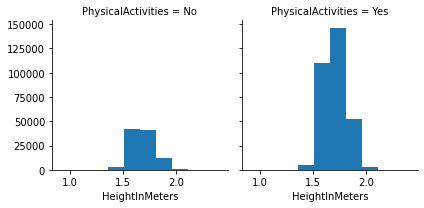

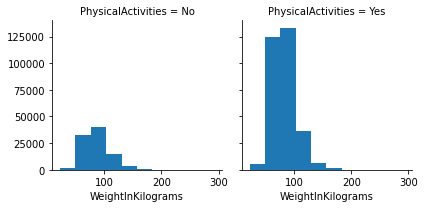

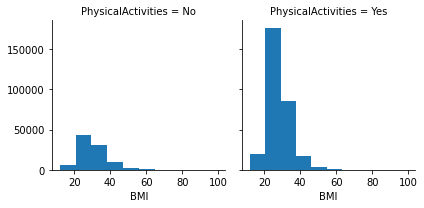

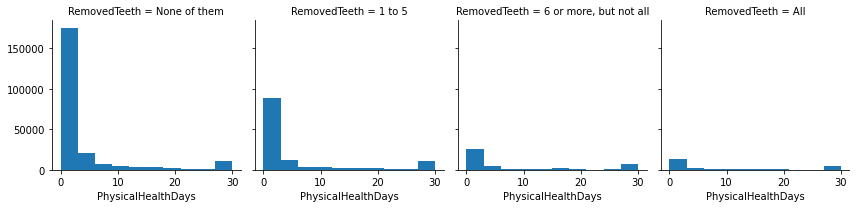

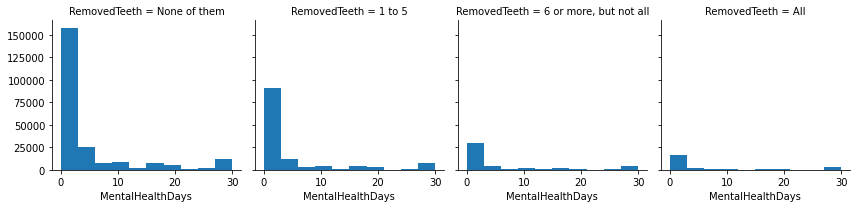

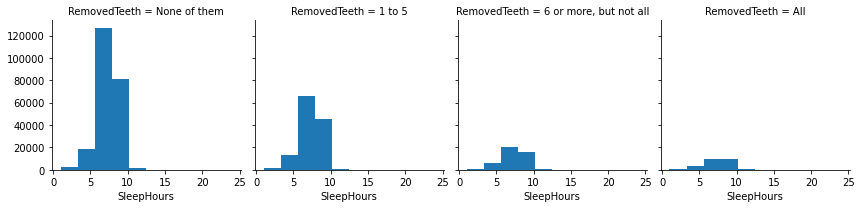

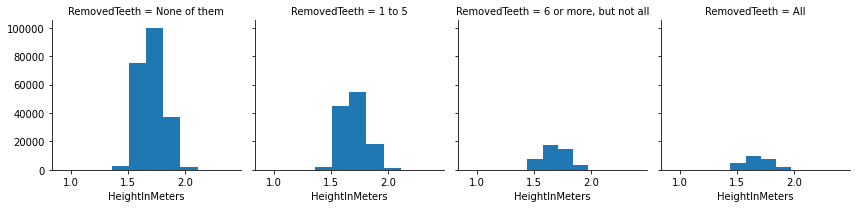

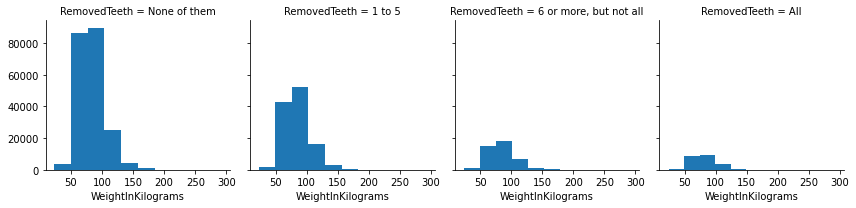

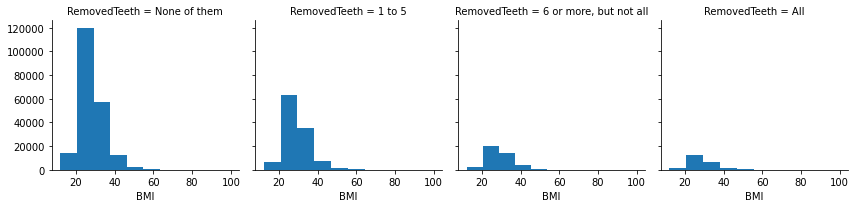

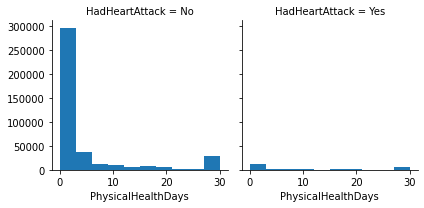

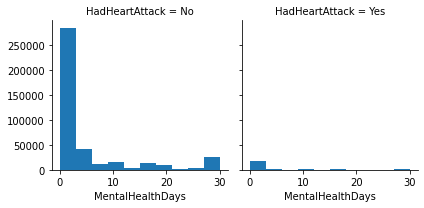

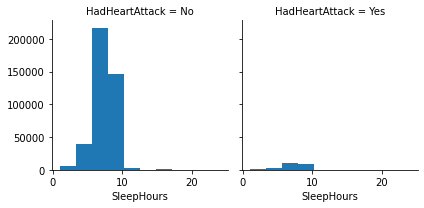

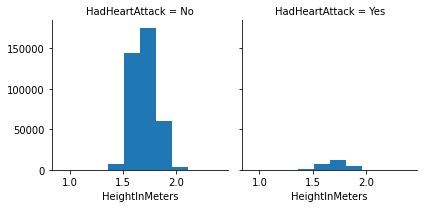

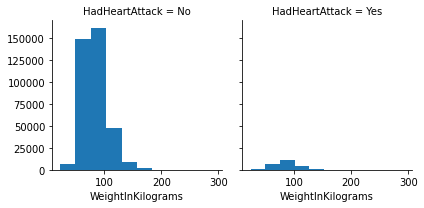

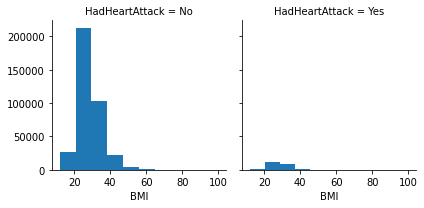

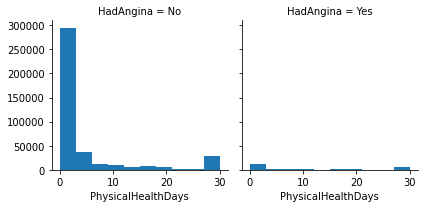

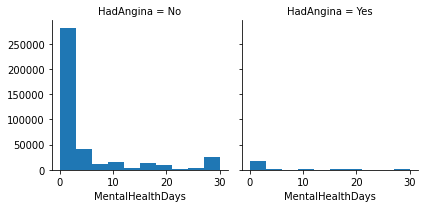

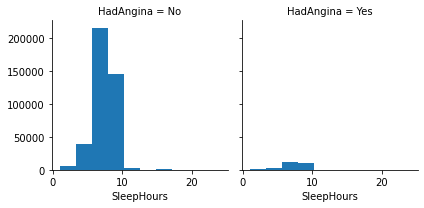

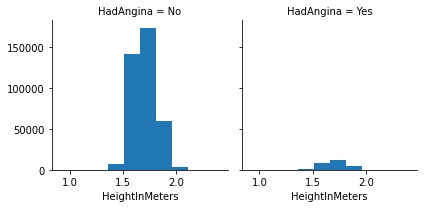

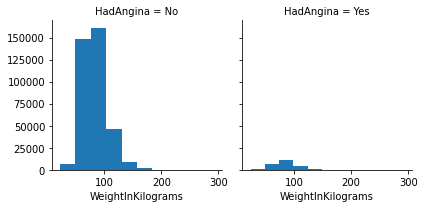

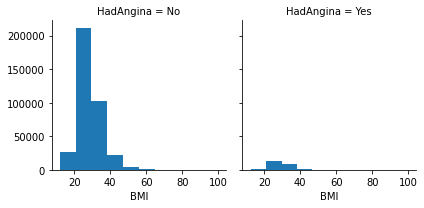

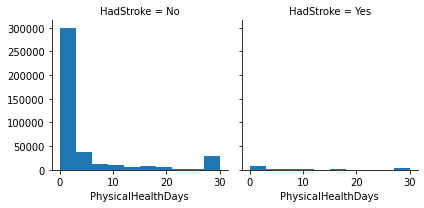

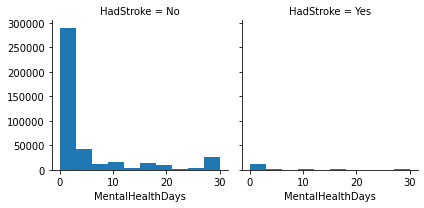

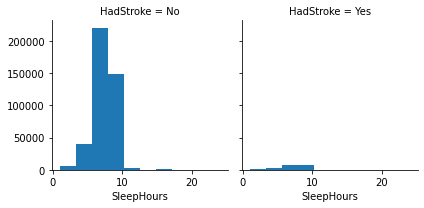

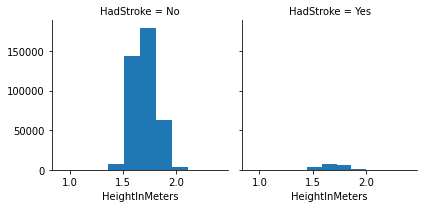

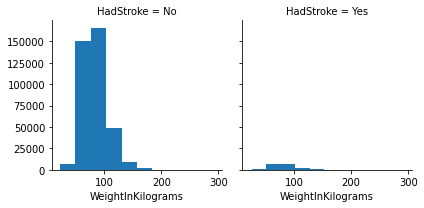

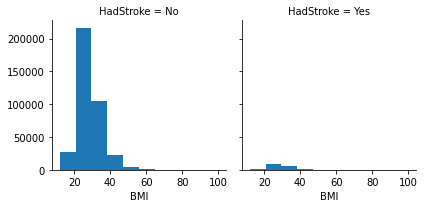

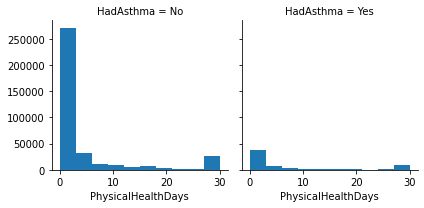

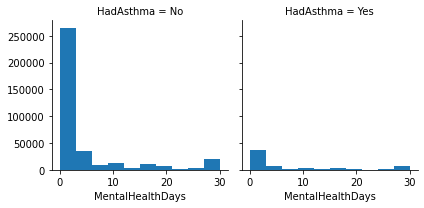

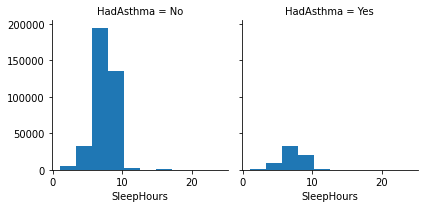

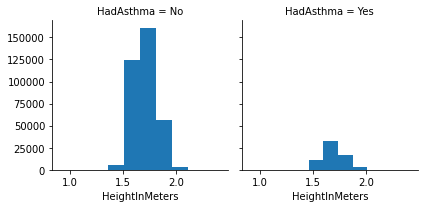

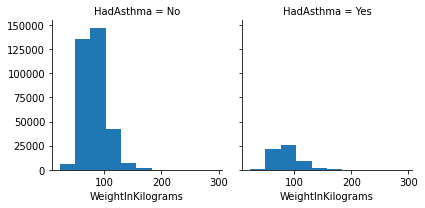

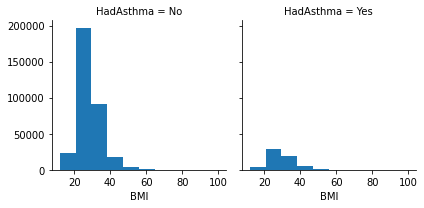

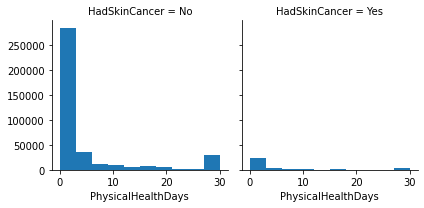

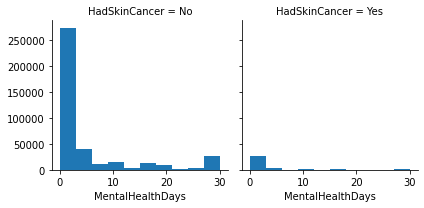

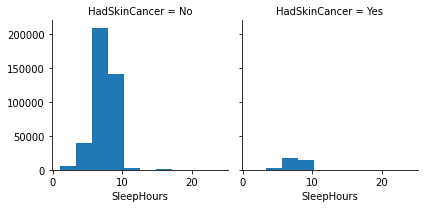

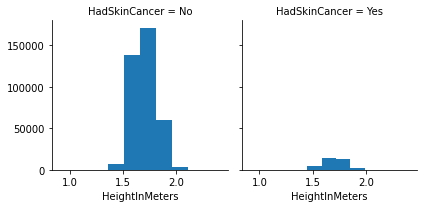

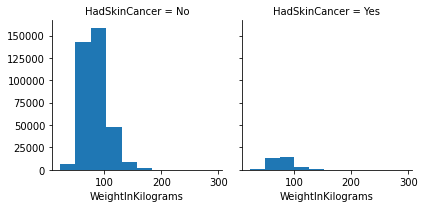

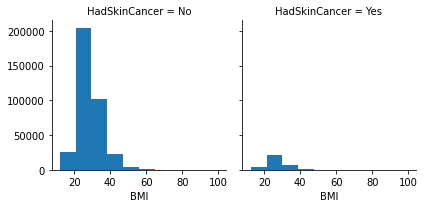

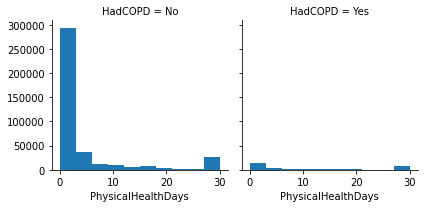

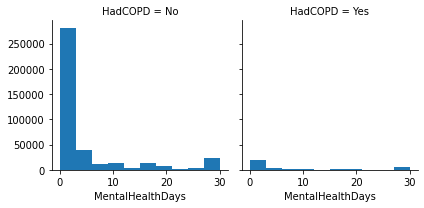

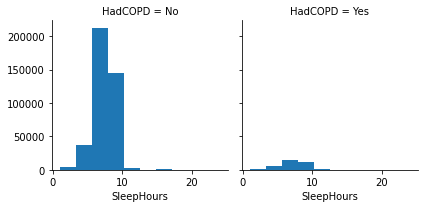

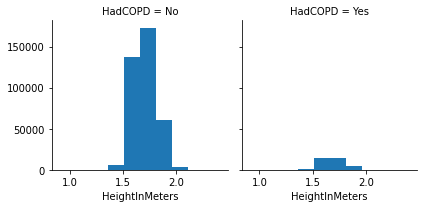

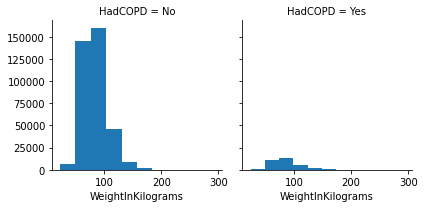

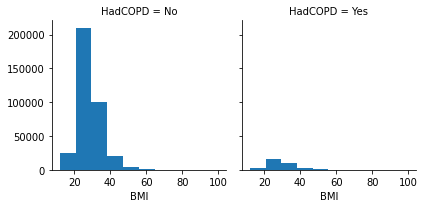

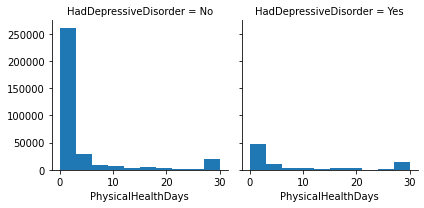

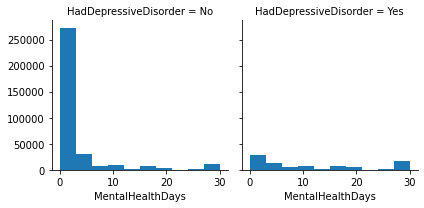

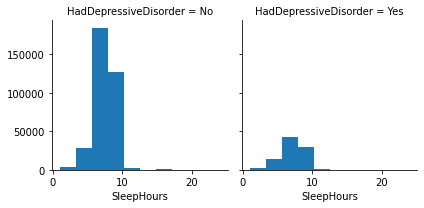

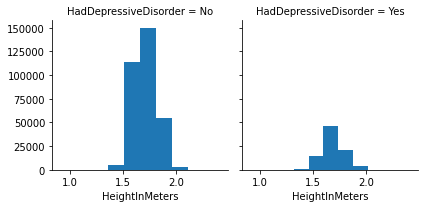

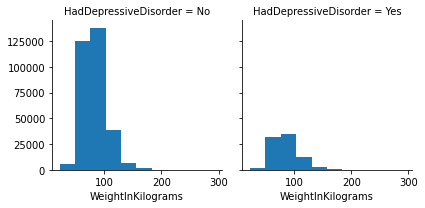

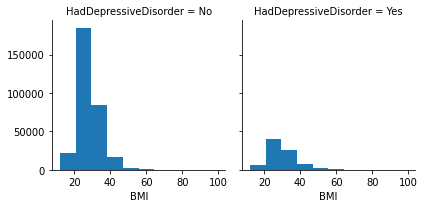

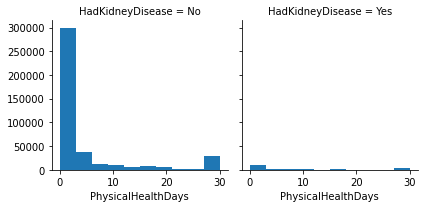

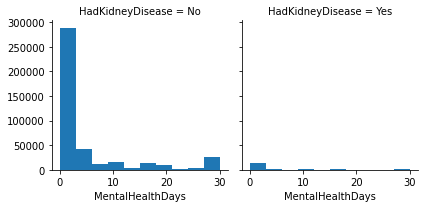

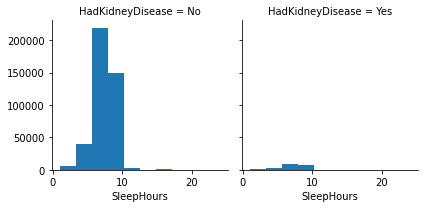

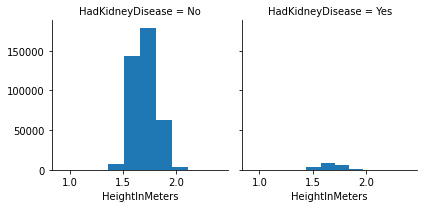

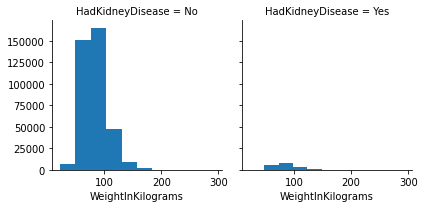

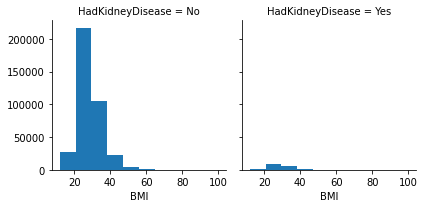

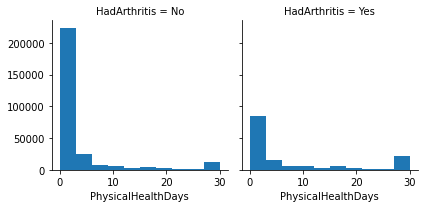

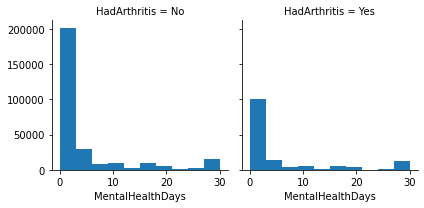

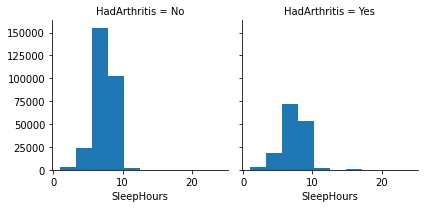

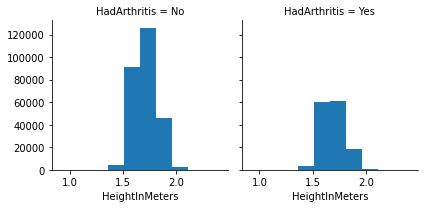

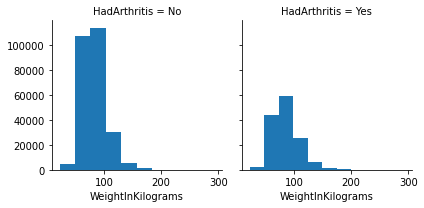

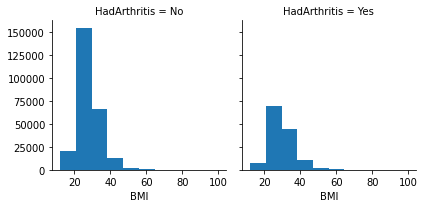

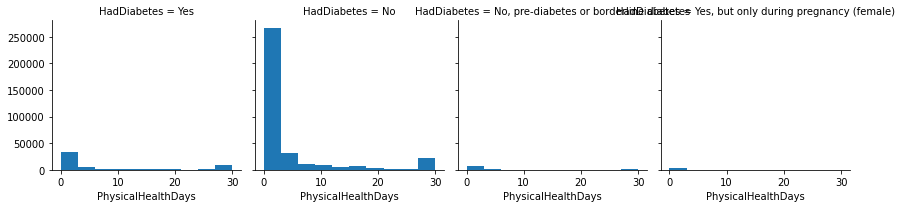

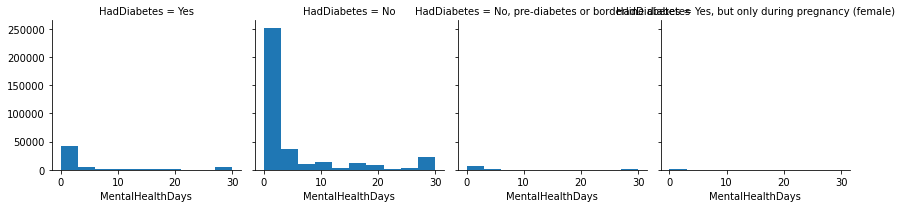

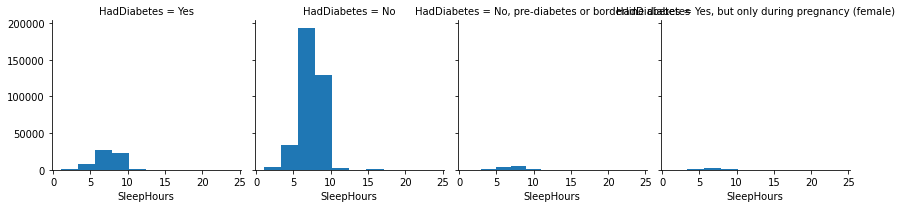

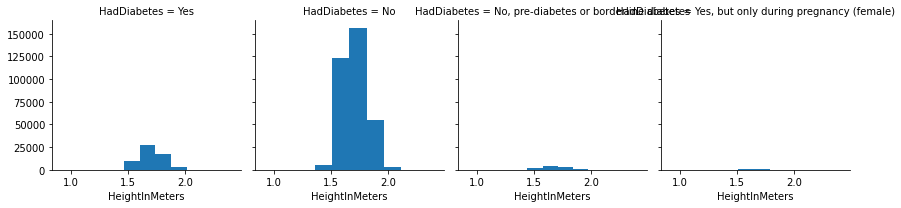

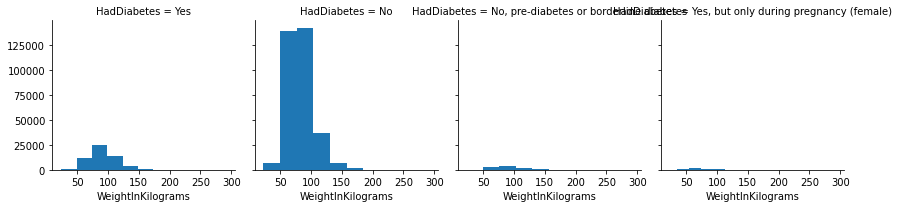

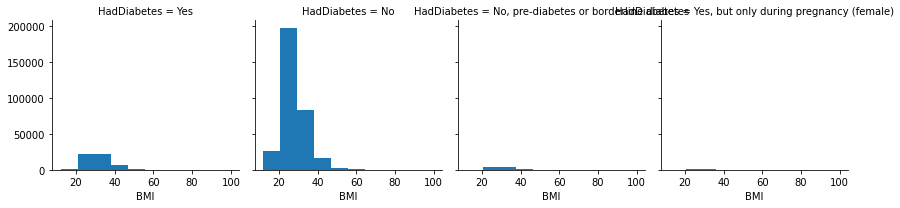

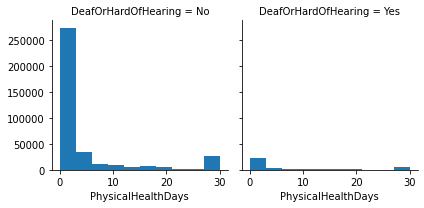

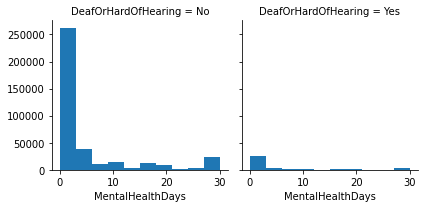

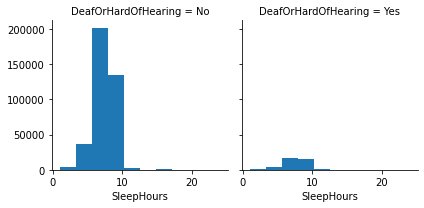

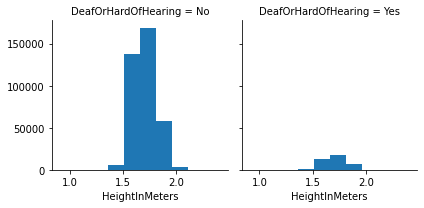

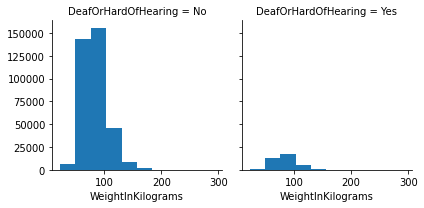

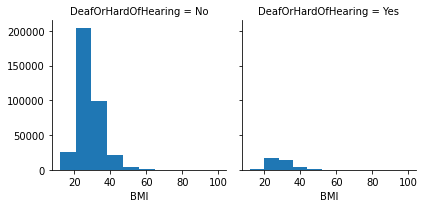

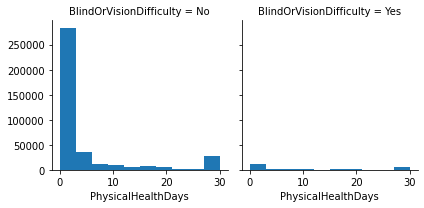

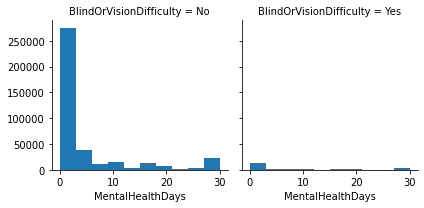

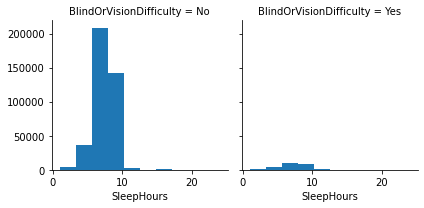

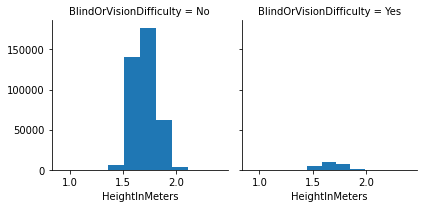

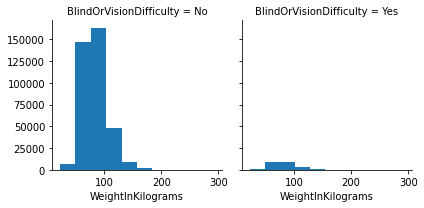

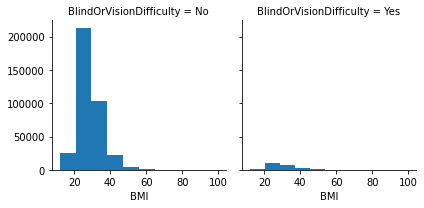

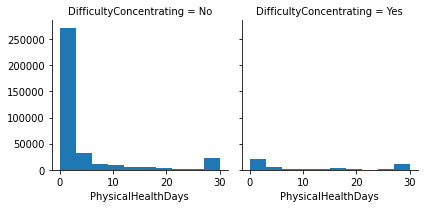

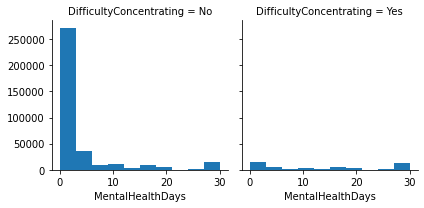

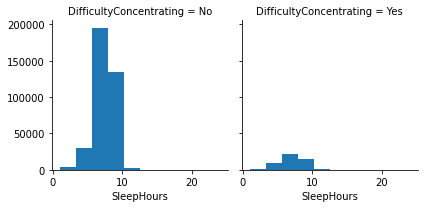

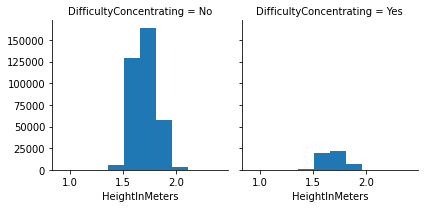

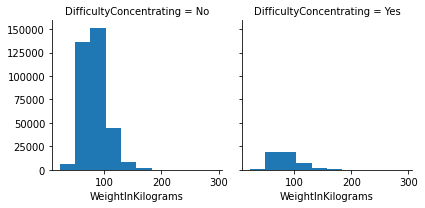

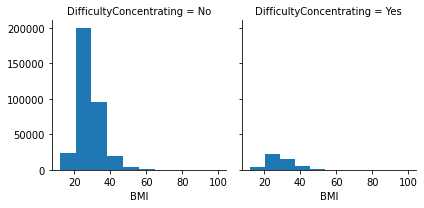

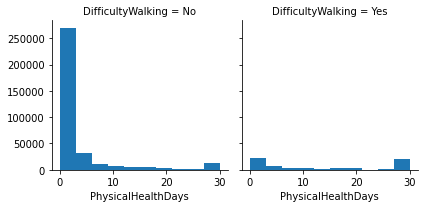

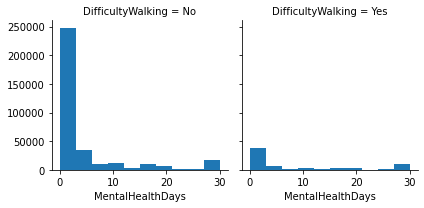

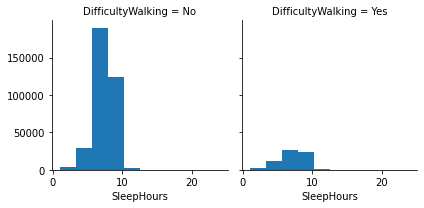

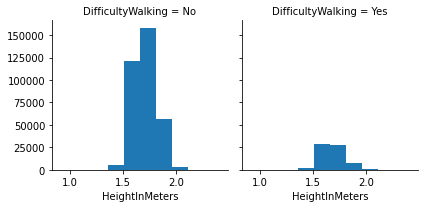

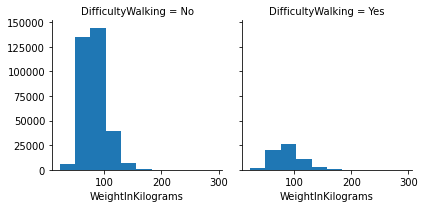

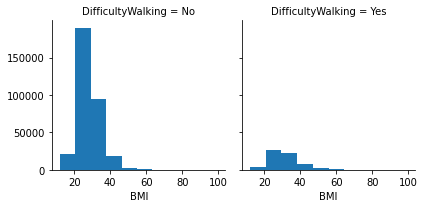

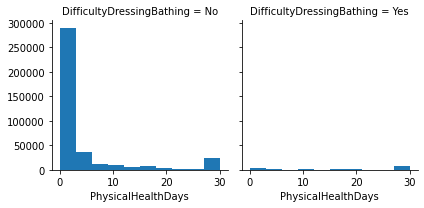

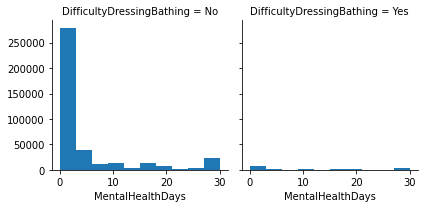

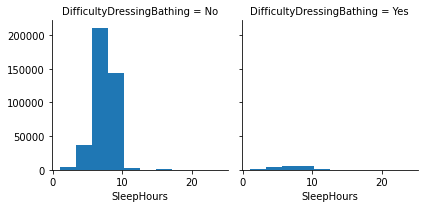

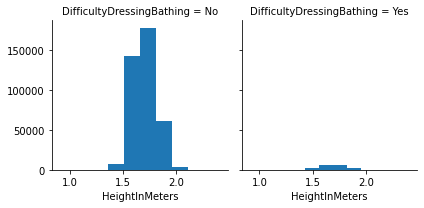

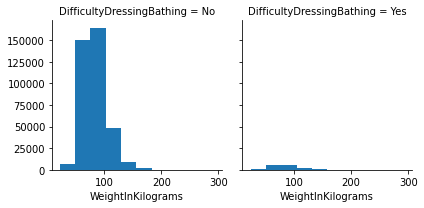

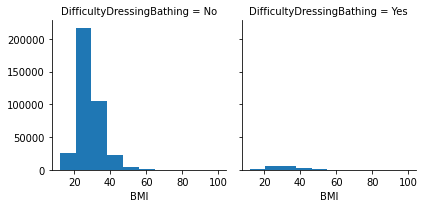

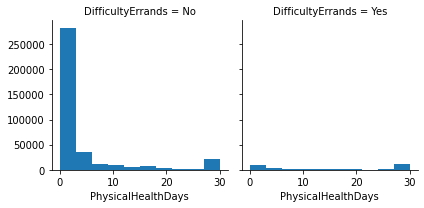

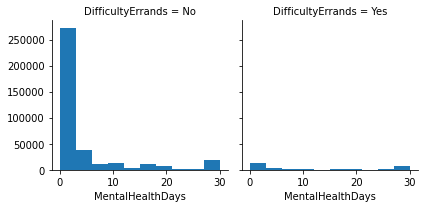

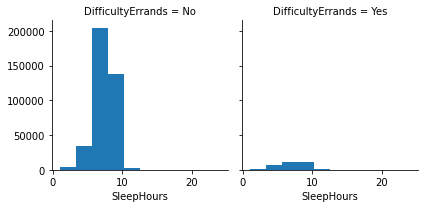

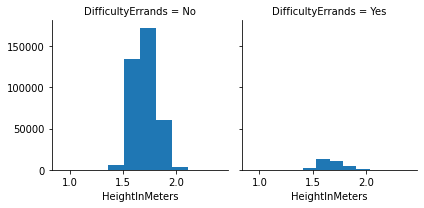

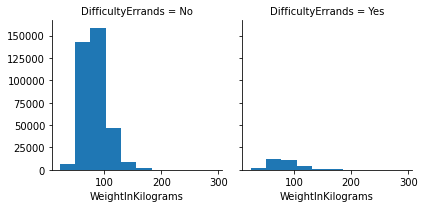

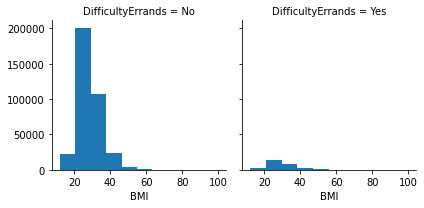

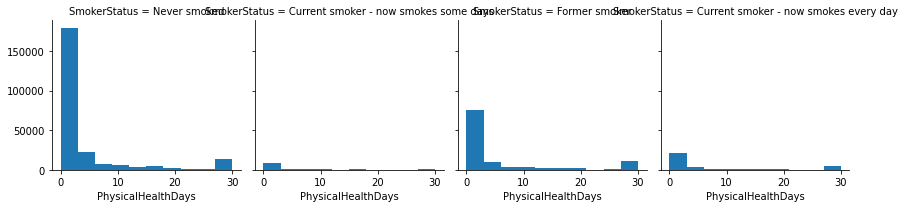

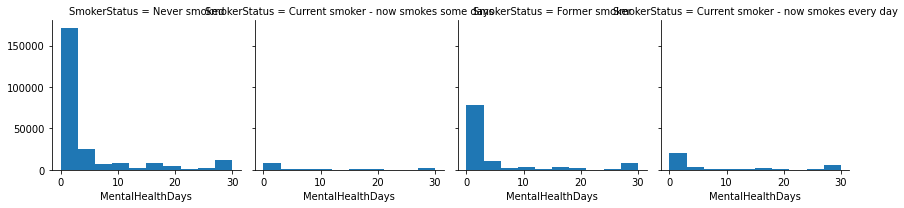

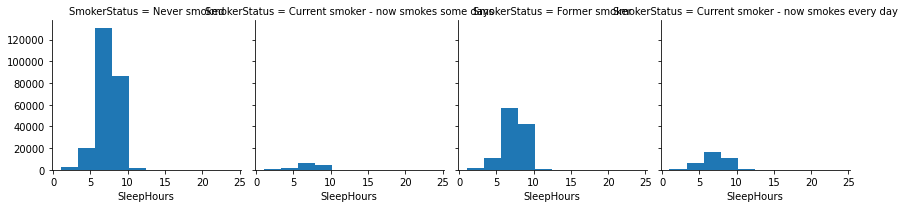

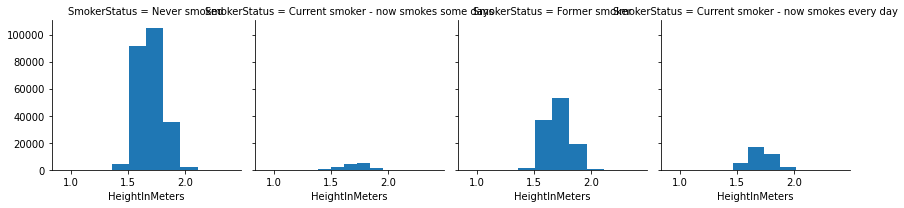

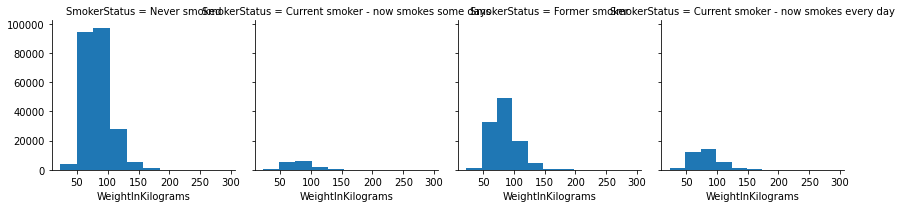

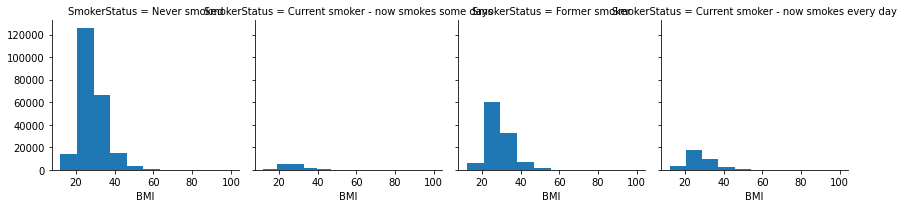

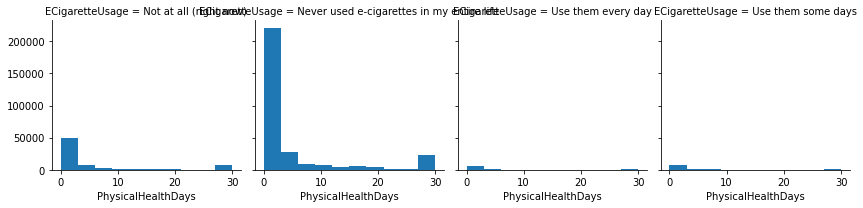

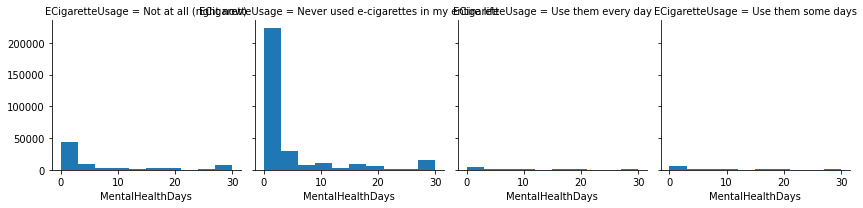

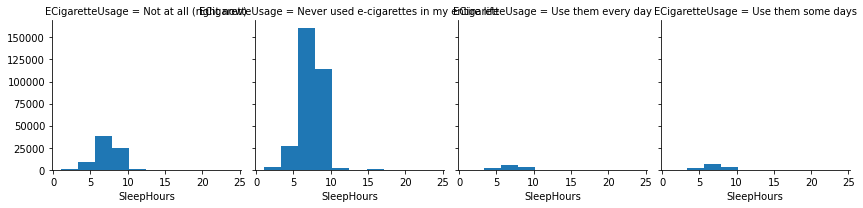

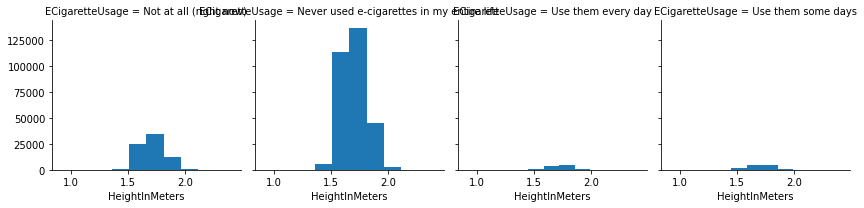

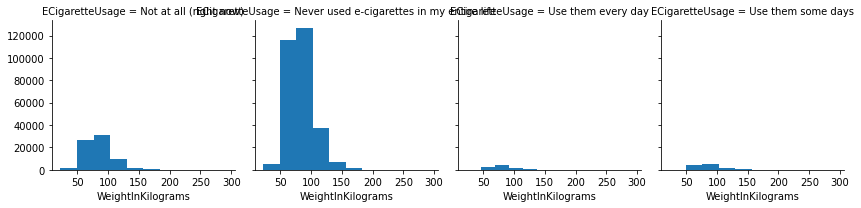

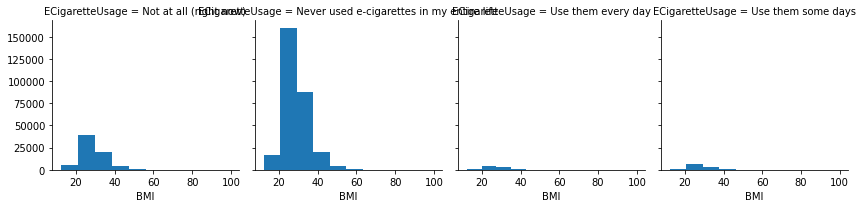

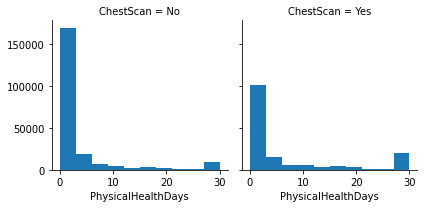

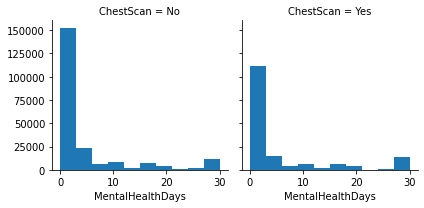

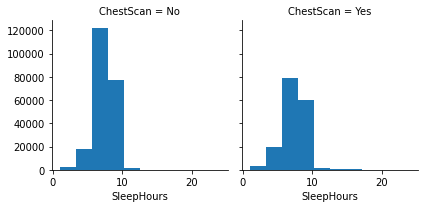

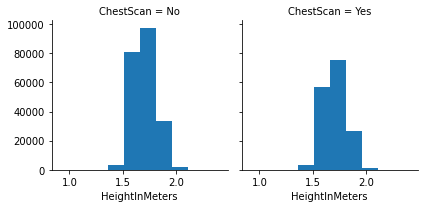

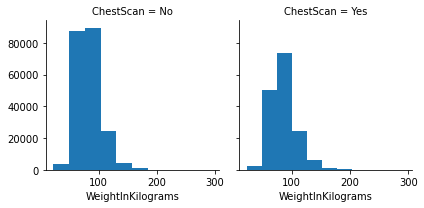

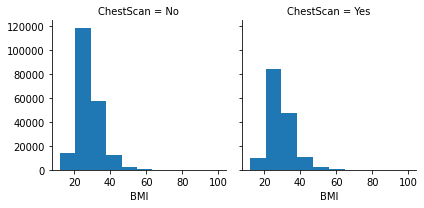

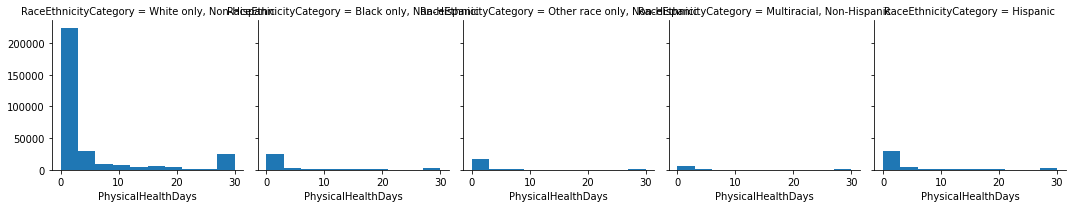

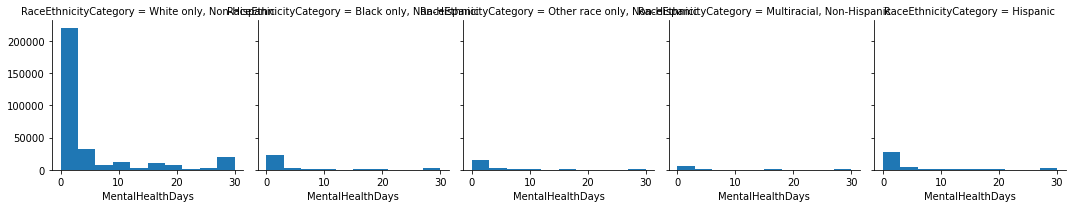

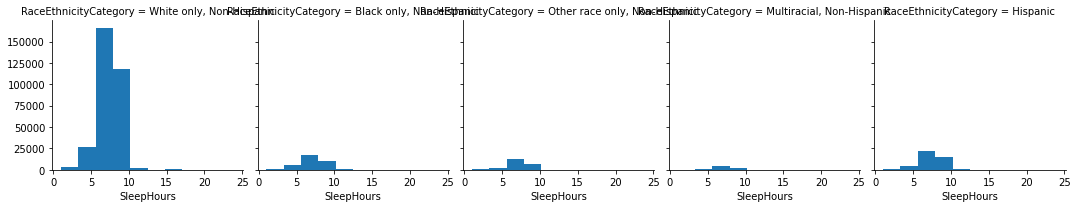

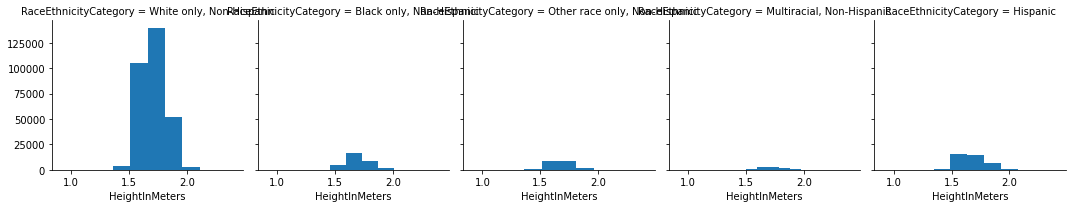

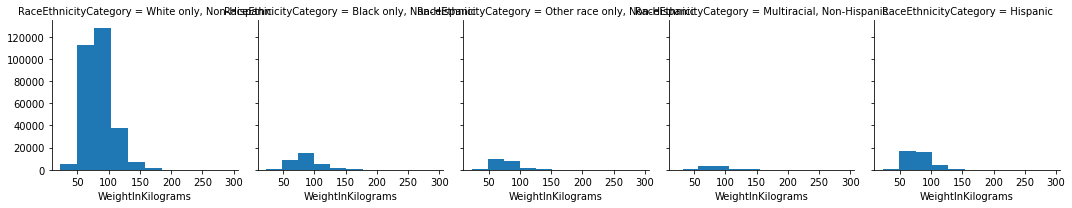

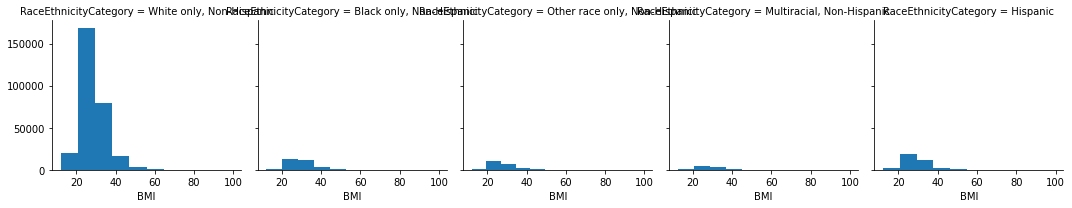

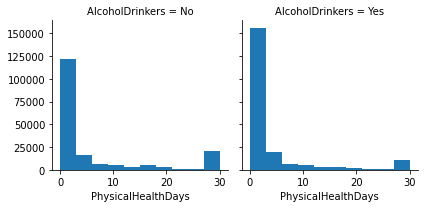

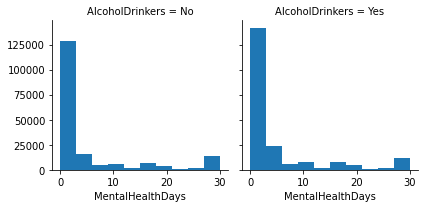

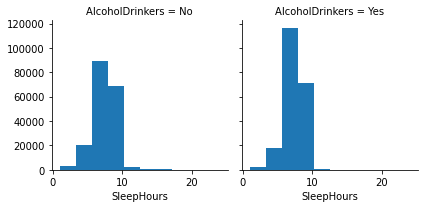

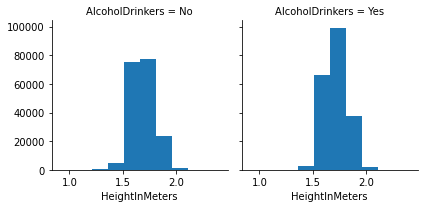

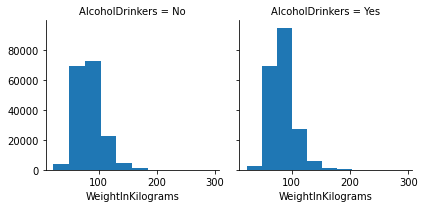

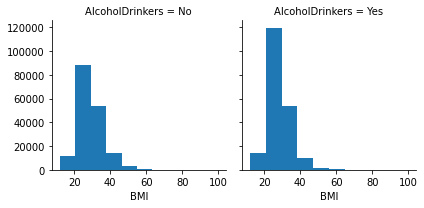

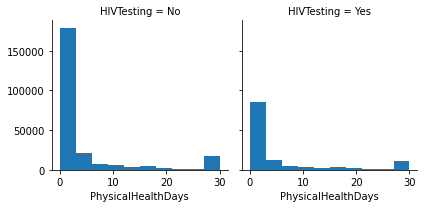

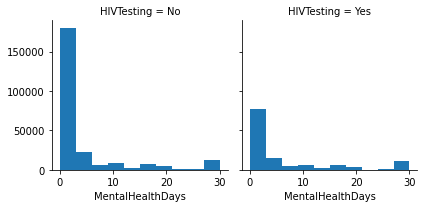

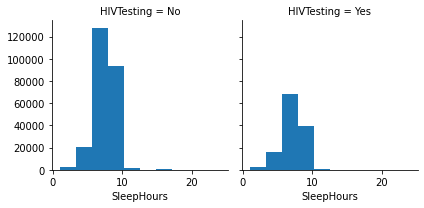

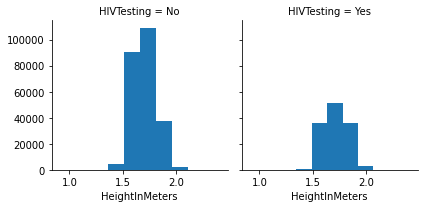

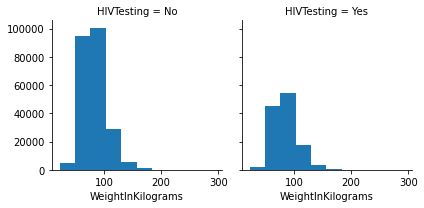

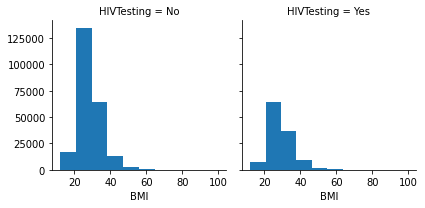

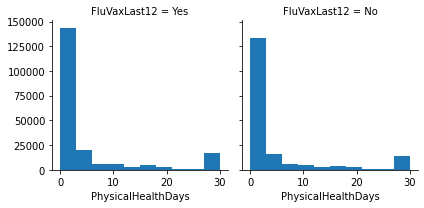

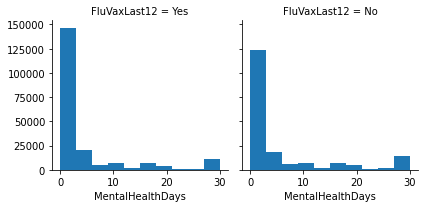

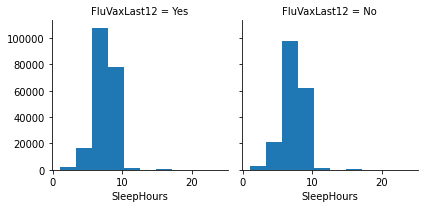

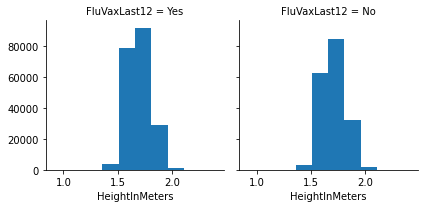

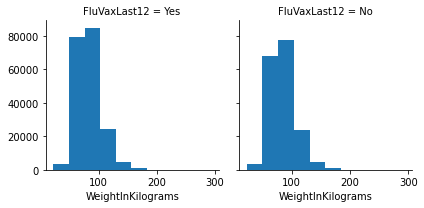

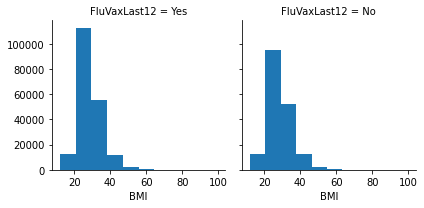

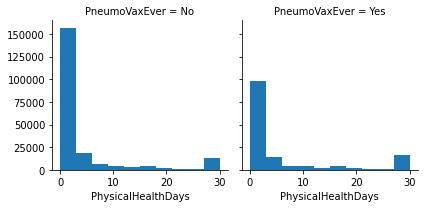

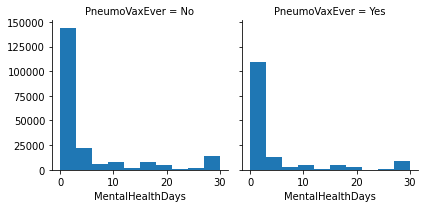

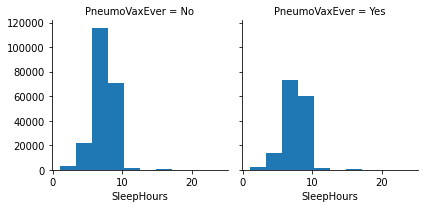

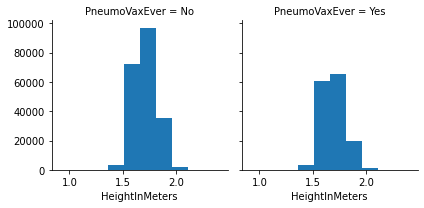

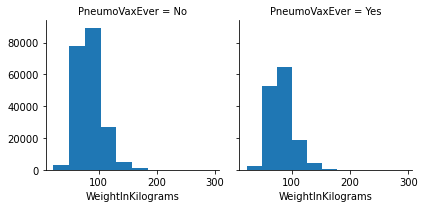

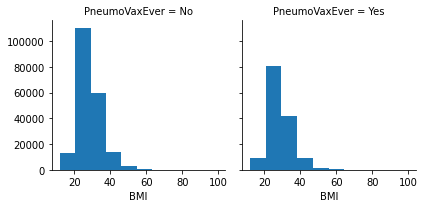

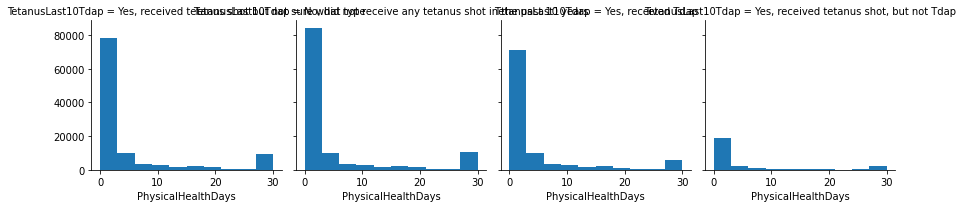

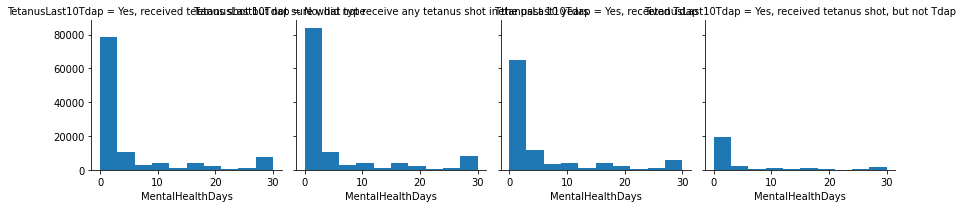

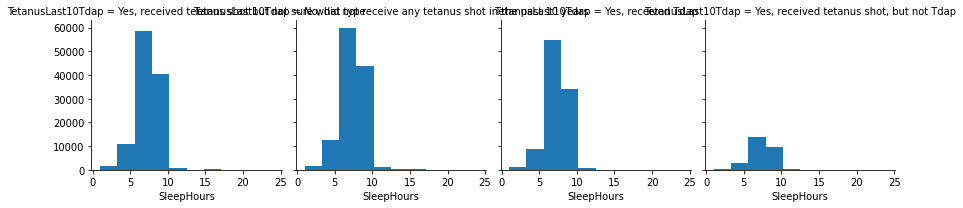

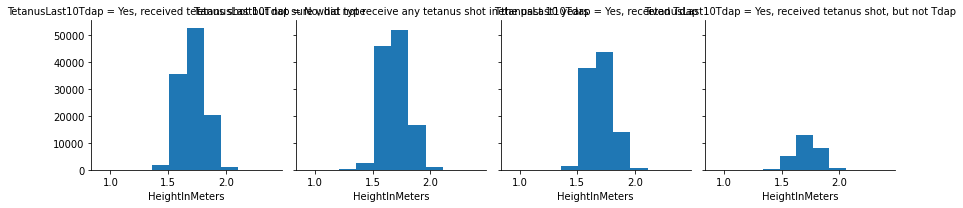

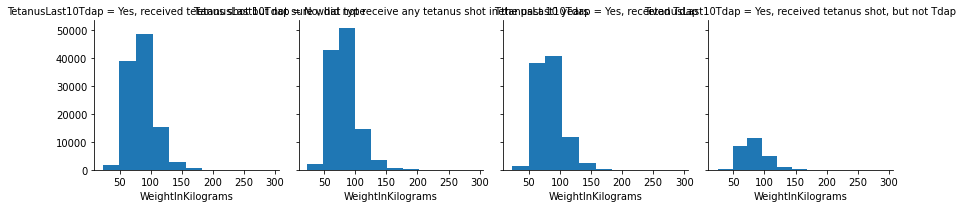

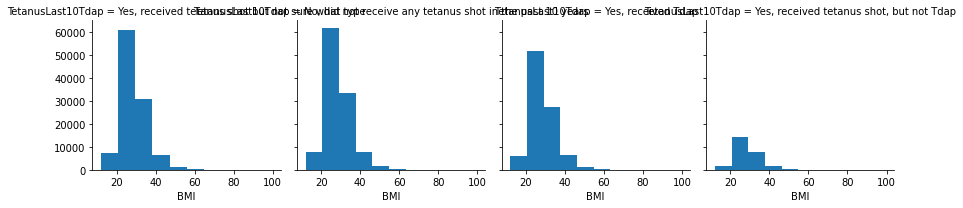

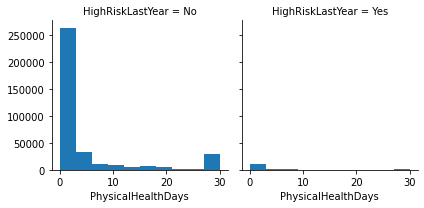

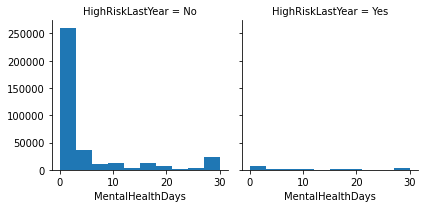

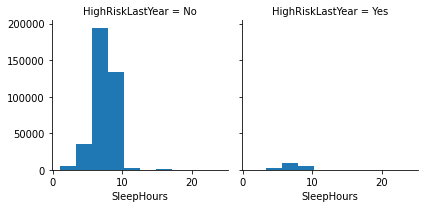

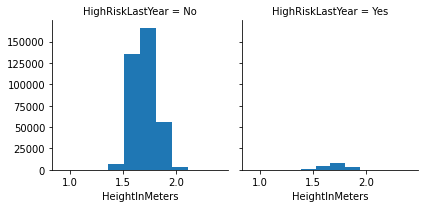

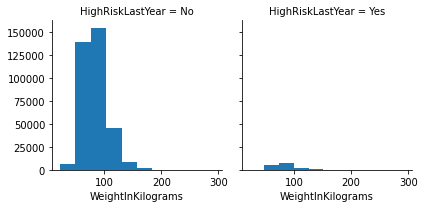

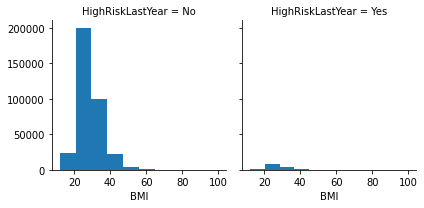

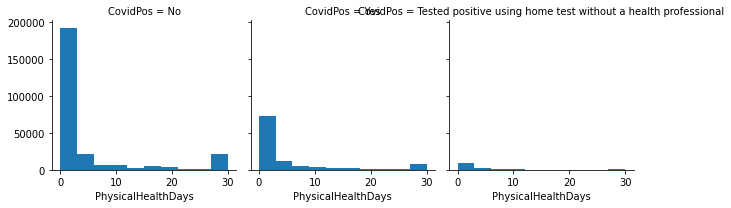

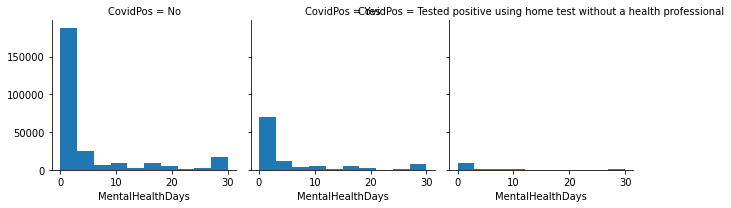

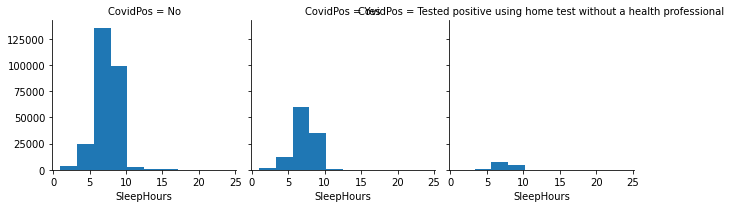

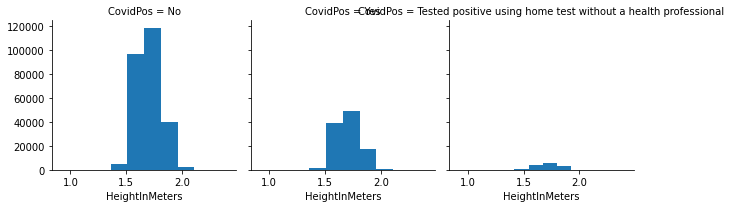

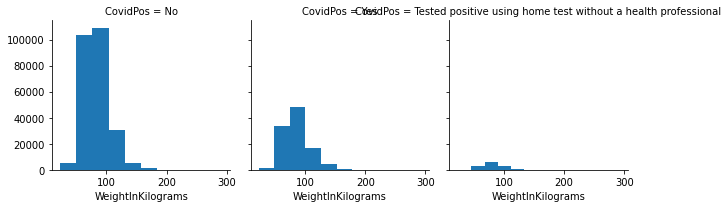

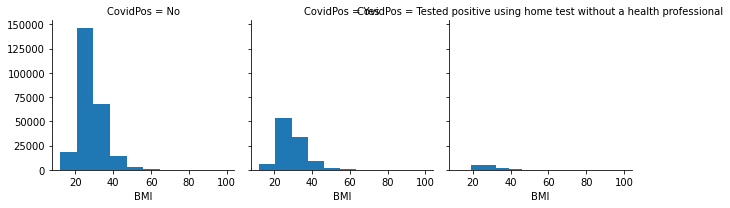

In [32]:
for i in cols3:
    for j in numerical_columns:
        b = sns.FacetGrid(data = df, col = i)
        b.map(plt.hist, j)
        plt.show()

In [33]:
df.isnull().sum()

State                            0
Sex                              0
GeneralHealth                 1193
PhysicalHealthDays           10922
MentalHealthDays              9062
LastCheckupTime               8301
PhysicalActivities            1088
SleepHours                    5448
RemovedTeeth                 11355
HadHeartAttack                3060
HadAngina                     4400
HadStroke                     1552
HadAsthma                     1768
HadSkinCancer                 3138
HadCOPD                       2214
HadDepressiveDisorder         2807
HadKidneyDisease              1921
HadArthritis                  2628
HadDiabetes                   1082
DeafOrHardOfHearing          20502
BlindOrVisionDifficulty      21419
DifficultyConcentrating      24095
DifficultyWalking            23867
DifficultyDressingBathing    23770
DifficultyErrands            25511
SmokerStatus                 35316
ECigaretteUsage              35514
ChestScan                    55900
RaceEthnicityCategor

In [34]:
categorical_na_columns=[]
for column in df.columns:
    if df[column].dtype == 'object' and df[column].isnull().values.any() == True:
        categorical_na_columns.append(column)

In [35]:
categorical_na_columns

['GeneralHealth',
 'LastCheckupTime',
 'PhysicalActivities',
 'RemovedTeeth',
 'HadHeartAttack',
 'HadAngina',
 'HadStroke',
 'HadAsthma',
 'HadSkinCancer',
 'HadCOPD',
 'HadDepressiveDisorder',
 'HadKidneyDisease',
 'HadArthritis',
 'HadDiabetes',
 'DeafOrHardOfHearing',
 'BlindOrVisionDifficulty',
 'DifficultyConcentrating',
 'DifficultyWalking',
 'DifficultyDressingBathing',
 'DifficultyErrands',
 'SmokerStatus',
 'ECigaretteUsage',
 'ChestScan',
 'RaceEthnicityCategory',
 'AgeCategory',
 'AlcoholDrinkers',
 'HIVTesting',
 'FluVaxLast12',
 'PneumoVaxEver',
 'TetanusLast10Tdap',
 'HighRiskLastYear',
 'CovidPos']

In [36]:
for column in categorical_na_columns:
    print(f'{column} : {df[column].isnull().sum()}')
    print('--------------------------------------------')

GeneralHealth : 1193
--------------------------------------------
LastCheckupTime : 8301
--------------------------------------------
PhysicalActivities : 1088
--------------------------------------------
RemovedTeeth : 11355
--------------------------------------------
HadHeartAttack : 3060
--------------------------------------------
HadAngina : 4400
--------------------------------------------
HadStroke : 1552
--------------------------------------------
HadAsthma : 1768
--------------------------------------------
HadSkinCancer : 3138
--------------------------------------------
HadCOPD : 2214
--------------------------------------------
HadDepressiveDisorder : 2807
--------------------------------------------
HadKidneyDisease : 1921
--------------------------------------------
HadArthritis : 2628
--------------------------------------------
HadDiabetes : 1082
--------------------------------------------
DeafOrHardOfHearing : 20502
--------------------------------------------
Blind

In [37]:
df.dropna(subset = categorical_na_columns, inplace = True)

In [38]:
df.shape

(267271, 40)

In [39]:
numerical_na_columns = []
for column in df.columns:
    if df[column].dtype != 'object' and df[column].isnull().values.any() == True:
        numerical_na_columns.append(column)

In [40]:
numerical_na_columns

['PhysicalHealthDays',
 'MentalHealthDays',
 'SleepHours',
 'HeightInMeters',
 'WeightInKilograms',
 'BMI']

In [41]:
for column in numerical_na_columns:
    print(f'{column} : {df[column].isnull().sum()}')
    print('----------------------------------------------')

PhysicalHealthDays : 4216
----------------------------------------------
MentalHealthDays : 3340
----------------------------------------------
SleepHours : 1694
----------------------------------------------
HeightInMeters : 3908
----------------------------------------------
WeightInKilograms : 10821
----------------------------------------------
BMI : 13956
----------------------------------------------


In [42]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')

In [43]:
df[numerical_na_columns] = imputer.fit_transform(df[numerical_na_columns])

In [44]:
df.isnull().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

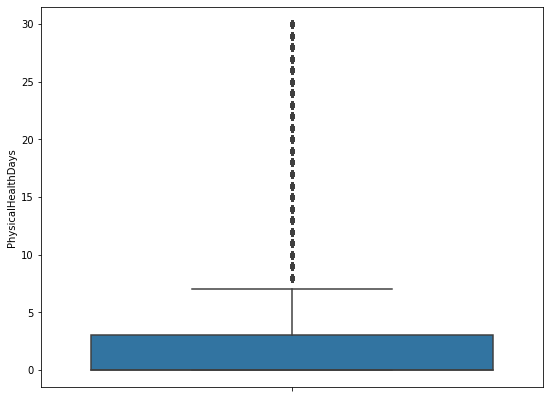

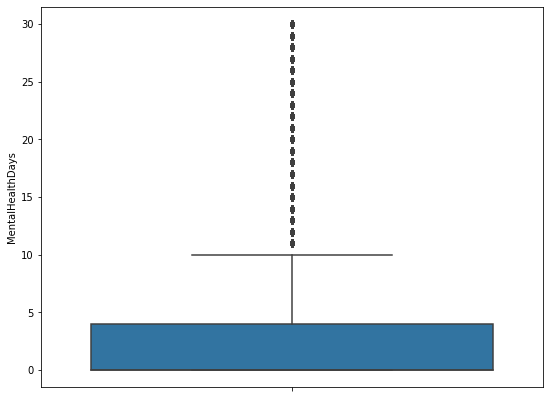

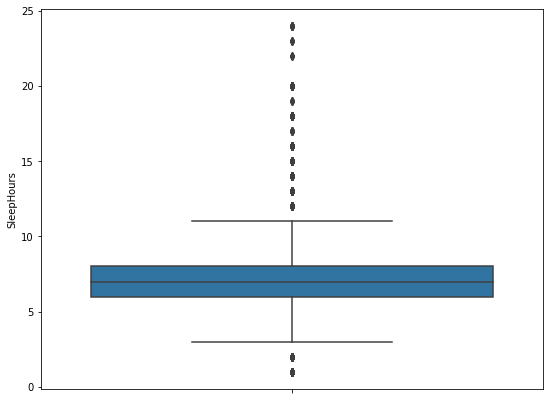

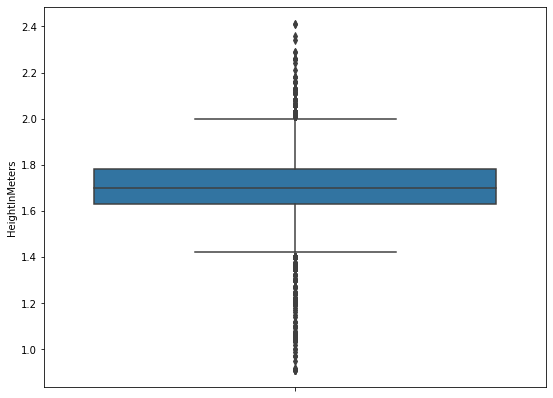

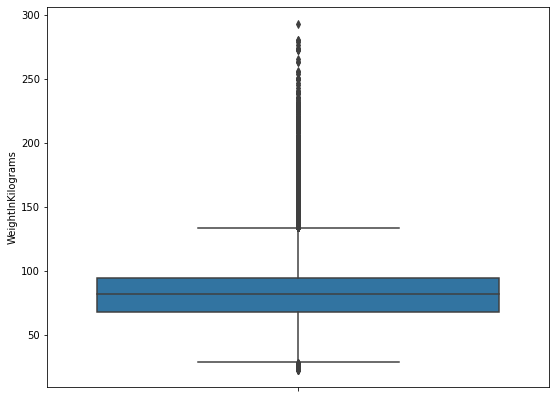

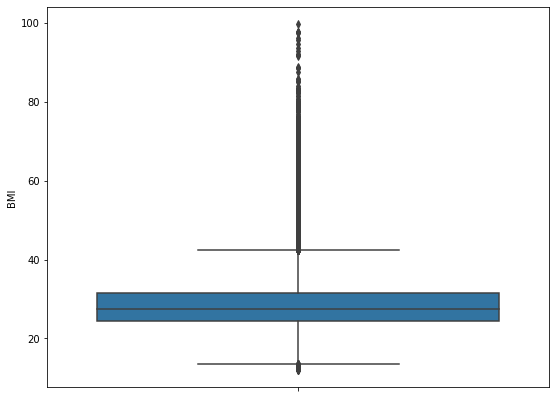

In [45]:
for i in numerical_columns:
    plt.figure(figsize = (9, 7))
    sns.boxplot(data = df, y = i)
    plt.show()

In [46]:
df.shape

(267271, 40)

In [55]:
df[df['PhysicalHealthDays'] > 7].shape

(41859, 40)

In [56]:
df = df[df['PhysicalHealthDays'] < 7]

In [57]:
df[df['MentalHealthDays'] > 10].shape

(20161, 40)

In [58]:
df = df[df['MentalHealthDays'] < 10]

In [59]:
df[df['SleepHours'] > 11].shape

(1089, 40)

In [60]:
df = df[df['SleepHours'] < 11]

In [61]:
df[df['SleepHours'] < 3].shape

(842, 40)

In [62]:
df = df[df['SleepHours'] > 3]

In [64]:
df[df['HeightInMeters'] > 2].shape

(397, 40)

In [65]:
df = df[df['HeightInMeters'] < 2]

In [66]:
df[df['HeightInMeters'] < 1.4].shape

(199, 40)

In [67]:
df = df[df['HeightInMeters'] > 1.4]

In [68]:
df[df['WeightInKilograms'] > 130].shape

(4329, 40)

In [69]:
df = df[df['WeightInKilograms'] < 130]

In [73]:
df[df['WeightInKilograms'] < 40].shape

(193, 40)

In [74]:
df = df[df['WeightInKilograms'] > 40]

In [75]:
df[df['BMI'] > 45].shape

(891, 40)

In [76]:
df = df[df['BMI'] < 45]

In [77]:
df[df['BMI'] < 15].shape

(80, 40)

In [78]:
df = df[df['BMI'] > 15]

In [79]:
df.shape

(183987, 40)

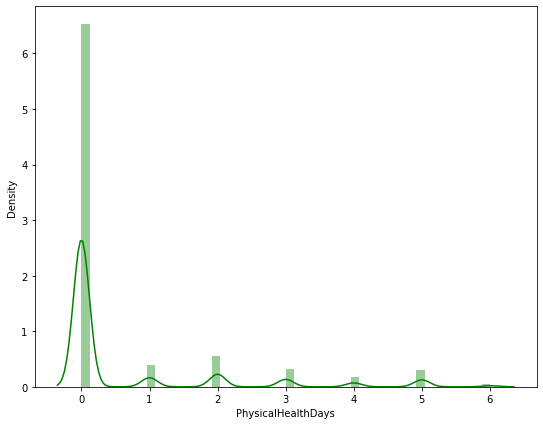

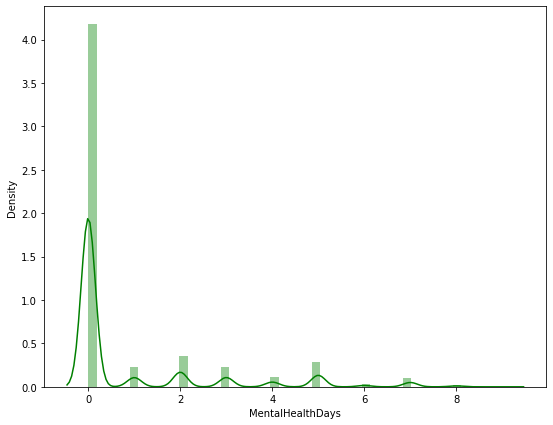

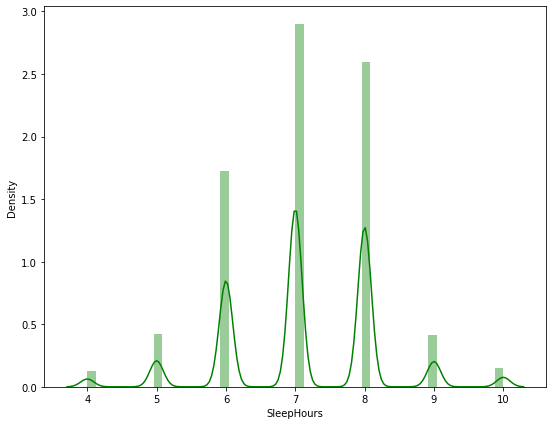

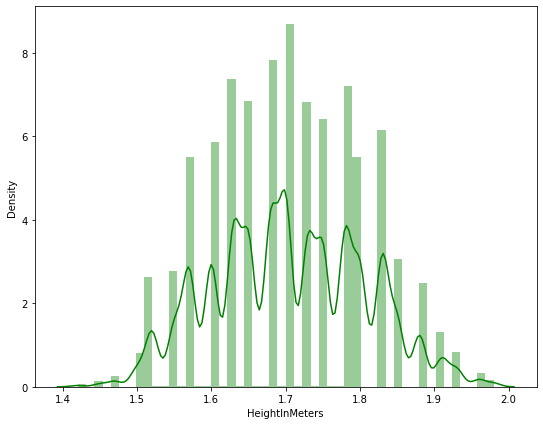

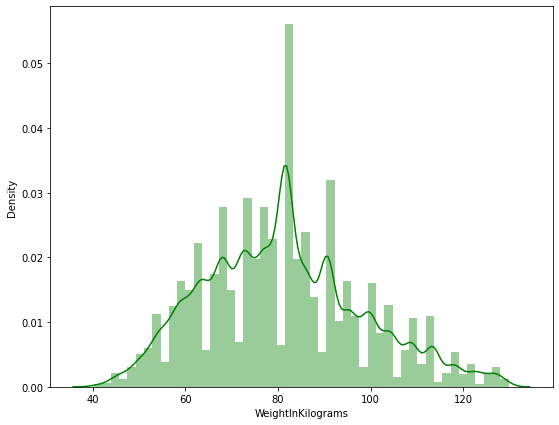

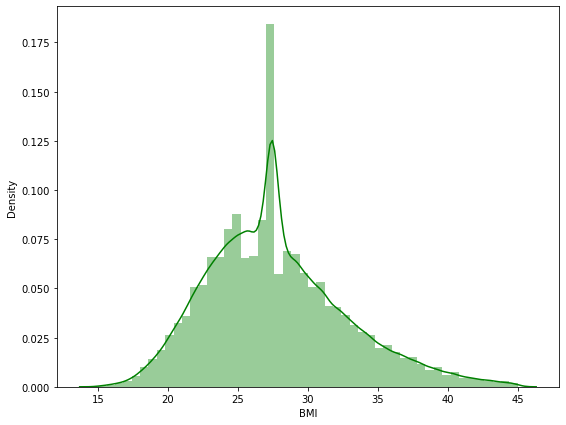

In [80]:
for i in numerical_columns:
    plt.figure(figsize = (9, 7))
    sns.distplot(df[i], color = 'green')
    plt.show()

In [81]:
df['HadHeartAttack'].value_counts()

HadHeartAttack
No     176085
Yes      7902
Name: count, dtype: int64

In [82]:
df.head()

State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
342  Alabama  Female     Very good                 4.0               0.0   
343  Alabama    Male     Very good                 0.0               0.0   
345  Alabama    Male     Very good                 0.0               0.0   
346  Alabama  Female          Fair                 5.0               0.0   
349  Alabama    Male          Good                 0.0               0.0   

                                       LastCheckupTime PhysicalActivities  \
342  Within past year (anytime less than 12 months ...                Yes   
343  Within past year (anytime less than 12 months ...                Yes   
345  Within past year (anytime less than 12 months ...                 No   
346  Within past year (anytime less than 12 months ...                Yes   
349  Within past year (anytime less than 12 months ...                Yes   

     SleepHours            RemovedTeeth HadHeartAttack  ... HeightInMeters  \
342         9.0            None of them             No  ...           1.60   
343         6.0            None of them             No  ...           1.78   
345         8.0  6 or more, but not all             No  ...           1.85   
346         9.0            None of them             No  ...           1.70   
349         7.0            None of them             No  ...           1.85   

    WeightInKilograms    BMI AlcoholDrinkers HIVTesting FluVaxLast12  \
342             71.67  27.99              No         No          Yes   
343             95.25  30.13              No         No          Yes   
345            108.86  31.66             Yes         No           No   
346             90.72  31.32              No         No          Yes   
349            120.20  34.96             Yes        Yes          Yes   

    PneumoVaxEver                                  TetanusLast10Tdap  \
342           Yes                                 Yes, received Tdap   
343           Yes  Yes, received tetanus shot but not sure what type   
345           Yes  No, did not receive any tetanus shot in the pa...   
346           Yes  No, did not receive any tetanus shot in the pa...   
349            No  Yes, received tetanus shot but not sure what type   

    HighRiskLastYear CovidPos  
342               No       No  
343               No       No  
345               No      Yes  
346               No      Yes  
349               No       No  

[5 rows x 40 columns]

In [83]:
X = df.drop(columns = ['HadHeartAttack'], axis = 1)
y = df['HadHeartAttack']

In [92]:
n_cols2 = []
for column in X.columns:
    if X[column].dtype == 'object':
        n_cols2.append(column)

In [93]:
X_num3 = pd.get_dummies(data = X, columns = n_cols2, dtype = 'int32', drop_first = True)

In [94]:
X_num3

PhysicalHealthDays  MentalHealthDays  SleepHours  HeightInMeters  \
342                    4.0               0.0         9.0            1.60   
343                    0.0               0.0         6.0            1.78   
345                    0.0               0.0         8.0            1.85   
346                    5.0               0.0         9.0            1.70   
349                    0.0               0.0         7.0            1.85   
...                    ...               ...         ...             ...   
445115                 0.0               0.0         6.0            1.80   
445117                 0.0               0.0         6.0            1.78   
445123                 0.0               7.0         7.0            1.93   
445128                 2.0               2.0         7.0            1.70   
445130                 0.0               0.0         5.0            1.83   

        WeightInKilograms    BMI  State_Alaska  State_Arizona  State_Arkansas  \
342                 71.67  27.99             0              0               0   
343                 95.25  30.13             0              0               0   
345                108.86  31.66             0              0               0   
346                 90.72  31.32             0              0               0   
349                120.20  34.96             0              0               0   
...                   ...    ...           ...            ...             ...   
445115             118.84  36.54             0              0               0   
445117             102.06  32.28             0              0               0   
445123              90.72  24.34             0              0               0   
445128              83.01  28.66             0              0               0   
445130             108.86  32.55             0              0               0   

        State_California  ...  AlcoholDrinkers_Yes  HIVTesting_Yes  \
342                    0  ...                    0               0   
343                    0  ...                    0               0   
345                    0  ...                    1               0   
346                    0  ...                    0               0   
349                    0  ...                    1               1   
...                  ...  ...                  ...             ...   
445115                 0  ...                    1               1   
445117                 0  ...                    1               0   
445123                 0  ...                    0               0   
445128                 0  ...                    0               1   
445130                 0  ...                    0               1   

        FluVaxLast12_Yes  PneumoVaxEver_Yes  \
342                    1                  1   
343                    1                  1   
345                    0                  1   
346                    1                  1   
349                    1                  0   
...                  ...                ...   
445115                 1                  0   
445117                 0                  0   
445123                 0                  0   
445128                 1                  0   
445130                 1                  1   

        TetanusLast10Tdap_Yes, received Tdap  \
342                                        1   
343                                        0   
345                                        0   
346                                        0   
349                                        0   
...                                      ...   
445115                                     0   
445117                                     0   
445123                                     0   
445128                                     0   
445130                                     0   

        TetanusLast10Tdap_Yes, received tetanus shot but not sure what type  \
342                                                     0   

In [96]:
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num3)

In [97]:
X_num_scaled

array([[ 2.55567471, -0.48249561,  1.71683537, ..., -0.18341384,
        -0.18719515, -0.60358249],
       [-0.45215925, -0.48249561, -1.01042895, ..., -0.18341384,
        -0.18719515, -0.60358249],
       [-0.45215925, -0.48249561,  0.80774727, ..., -0.18341384,
        -0.18719515,  1.65677436],
       ...,
       [-0.45215925,  3.53676885, -0.10134084, ..., -0.18341384,
        -0.18719515,  1.65677436],
       [ 1.05175773,  0.66586566, -0.10134084, ..., -0.18341384,
        -0.18719515, -0.60358249],
       [-0.45215925, -0.48249561, -1.91951705, ..., -0.18341384,
        -0.18719515,  1.65677436]])

In [98]:
y

342        No
343        No
345        No
346        No
349        No
         ... 
445115    Yes
445117     No
445123     No
445128     No
445130    Yes
Name: HadHeartAttack, Length: 183987, dtype: object

In [100]:
le = LabelEncoder()
y_le = le.fit_transform(y)

In [102]:
y_le

array([0, 0, 0, ..., 0, 0, 1])

In [104]:
smote = SMOTE(sampling_strategy = 'not majority')

In [105]:
X_sm, y_sm = smote.fit_resample(X_num_scaled, y_le)

In [106]:
X_sm.shape

(352170, 121)

In [108]:
len(y_sm)

352170

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 101, shuffle = True, 
                                                   stratify = y_sm)

In [111]:
X_train.shape

(281736, 121)

In [112]:
X_test.shape

(70434, 121)

In [114]:
rf = RandomForestClassifier()

In [117]:
rf_c = cross_val_score(rf, X_train, y_train, cv = 5)

In [118]:
rf_c.mean()

0.979395605969349

In [120]:
rf.fit(X_test, y_test)

RandomForestClassifier()

In [123]:
y_pred = rf.predict(X_test)
y_pred[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [124]:
y_test[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [125]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35217
           1       1.00      1.00      1.00     35217

    accuracy                           1.00     70434
   macro avg       1.00      1.00      1.00     70434
weighted avg       1.00      1.00      1.00     70434



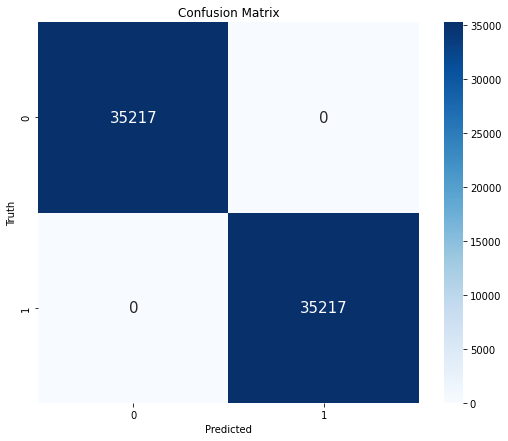

In [126]:
plt.figure(figsize = (9, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, square = True, cbar = True, annot_kws = {'size' : 15}, fmt = 'd',
           cmap = 'Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()